# Loading Libraries

In [1]:
#Importing Neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel('custom-import_data.xlsx')

# Loading dataset

In [2]:
dataset

Unnamed: 0 Custom Office Reg Number  Importer   HS Code  FOB Value (N)  \
0               0       UA PORT      C1195     29143  12900000        1046575   
1               1       UA PORT      C1195     29143  36700000         216957   
2               2       UA PORT      C1195     29143  39390000         172037   
3               3       UA PORT      C1277     62056  40890000         776007   
4               4       UA PORT      C1292     93763  37100000         234651   
...           ...           ...        ...       ...       ...            ...   
77784       77784       RW PORT       S161     75010  37200000         257035   
77785       77785       RW PORT       S176     75010  47900000         250271   
77786       77786       RW PORT       S177     75010  47900000          26317   
77787       77787       RW PORT       S168     75010  28590000          40072   
77788       77788       RW PORT       S169     75010  28590000        1443975   

       CIF Value (N)  Total Tax(N) Receipt Number Receipt Date  Mass(KG)  \
0            1119220        137105           R599   03/07/1866       126   
1             232002         68365           R599   03/07/1866        26   
2             183858         54415           R599   03/07/1866        21   
3             915286        162868           R621   03/08/1866        71   
4             301040         37415           R614   03/08/1866        45   
...              ...           ...            ...          ...       ...   
77784         364576          1600            NaN          NaN     24020   
77785         357950          1600            NaN          NaN       434   
77786         133996          1600            NaN          NaN        20   
77787         147751          1600            NaN          NaN         8   
77788        1661481          1600            NaN          NaN       268   

           Country  of Origin Country  of Supply  Nbr Of Containers  \
0                     Germany                NaN                  0   
1                     Germany                NaN                  0   
2                     Germany                NaN                  0   
3                     Belgium            Belgium                  0   
4                      Turkey             Turkey                  0   
...                       ...                ...                ...   
77784  British Virgin Islands                NaN                  0   
77785  British Virgin Islands                NaN                  0   
77786  British Virgin Islands                NaN                  0   
77787  British Virgin Islands                NaN                  0   
77788  British Virgin Islands                NaN                  0   

      Container Nbr Container Size  
0               NaN            NaN  
1               NaN            NaN  
2               NaN            NaN  
3               NaN            NaN  
4               NaN            NaN  
...             ...            ...  
77784           NaN            NaN  
77785           NaN            NaN  
77786           NaN            NaN  
77787           NaN            NaN  
77788           NaN            NaN  

[77789 rows x 16 columns]

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          77789 non-null  int64 
 1   Custom Office       77789 non-null  object
 2   Reg Number          77789 non-null  object
 3   Importer            77789 non-null  int64 
 4   HS Code             77789 non-null  int64 
 5   FOB Value (N)       77789 non-null  int64 
 6   CIF Value (N)       77789 non-null  int64 
 7   Total Tax(N)        77789 non-null  int64 
 8   Receipt Number      76493 non-null  object
 9   Receipt Date        76493 non-null  object
 10  Mass(KG)            77789 non-null  int64 
 11  Country  of Origin  77789 non-null  object
 12  Country  of Supply  76826 non-null  object
 13  Nbr Of Containers   77789 non-null  int64 
 14  Container Nbr       45436 non-null  object
 15  Container Size      45436 non-null  object
dtypes: int64(8), object(8)

In [4]:
dataset.isna().sum()

Unnamed: 0                0
Custom Office             0
Reg Number                0
Importer                  0
HS Code                   0
FOB Value (N)             0
CIF Value (N)             0
Total Tax(N)              0
Receipt Number         1296
Receipt Date           1296
Mass(KG)                  0
Country  of Origin        0
Country  of Supply      963
Nbr Of Containers         0
Container Nbr         32353
Container Size        32353
dtype: int64

# Data Preprocessing

## Data Cleaning

### Step 1 - Filling missing values

In [5]:
# Receipt Number -- Fill with 'Unknown receipt number'
dataset['Receipt Number'].fillna("Unknown receipt number", inplace=True)

# Receipt Date -- Fill with mode
dataset['Receipt Date'].fillna(dataset['Receipt Date'].mode()[0], inplace=True)

# Country of supply -- Fill with 'No country'
dataset['Country  of Supply'].fillna("No Country", inplace=True)

# Container Nbr -- Fill with 'Unknown container number'
dataset['Container Nbr'].fillna("Unknown container number", inplace=True)

# Container Size -- Fill with 'Unknown container size'
dataset['Container Size'].fillna("Unknown container size", inplace=True)

In [6]:
dataset.isna().sum()

Unnamed: 0            0
Custom Office         0
Reg Number            0
Importer              0
HS Code               0
FOB Value (N)         0
CIF Value (N)         0
Total Tax(N)          0
Receipt Number        0
Receipt Date          0
Mass(KG)              0
Country  of Origin    0
Country  of Supply    0
Nbr Of Containers     0
Container Nbr         0
Container Size        0
dtype: int64

### Step 2 - Data type validation

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          77789 non-null  int64 
 1   Custom Office       77789 non-null  object
 2   Reg Number          77789 non-null  object
 3   Importer            77789 non-null  int64 
 4   HS Code             77789 non-null  int64 
 5   FOB Value (N)       77789 non-null  int64 
 6   CIF Value (N)       77789 non-null  int64 
 7   Total Tax(N)        77789 non-null  int64 
 8   Receipt Number      77789 non-null  object
 9   Receipt Date        77789 non-null  object
 10  Mass(KG)            77789 non-null  int64 
 11  Country  of Origin  77789 non-null  object
 12  Country  of Supply  77789 non-null  object
 13  Nbr Of Containers   77789 non-null  int64 
 14  Container Nbr       77789 non-null  object
 15  Container Size      77789 non-null  object
dtypes: int64(8), object(8)

In [8]:
# Dropping the Unnamed column
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Converting dataypes according to the data dictionary and standard

# Importer to object type
dataset['Importer'] = dataset['Importer'].astype('object')

# Importer to object type
dataset['HS Code'] = dataset['HS Code'].astype('object')

# FOB Value (N) to Float value
dataset['FOB Value (N)'] = dataset['FOB Value (N)'].astype('float64')

# CIF Value (N) to float type
dataset['CIF Value (N)'] = dataset['CIF Value (N)'].astype('float64')

# Total Tax(N) tp float type
dataset['Total Tax(N)'] = dataset['Total Tax(N)'].astype('float64')

# Receipt Date to date type in the right format
dataset['Receipt Date'] = pd.to_datetime(dataset['Receipt Date'], dayfirst=True, format="mixed").dt.strftime('%m-%d-%Y')
dataset['Receipt Date'] = pd.to_datetime(dataset['Receipt Date'])

# Mass(KG) to data type integer
dataset['Mass(KG)'] = dataset['Mass(KG)'].astype('int64')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Custom Office       77789 non-null  object        
 1   Reg Number          77789 non-null  object        
 2   Importer            77789 non-null  object        
 3   HS Code             77789 non-null  object        
 4   FOB Value (N)       77789 non-null  float64       
 5   CIF Value (N)       77789 non-null  float64       
 6   Total Tax(N)        77789 non-null  float64       
 7   Receipt Number      77789 non-null  object        
 8   Receipt Date        77789 non-null  datetime64[ns]
 9   Mass(KG)            77789 non-null  int64         
 10  Country  of Origin  77789 non-null  object        
 11  Country  of Supply  77789 non-null  object        
 12  Nbr Of Containers   77789 non-null  int64         
 13  Container Nbr       77789 non-null  object    

## Feature Engineering

In [11]:
# Here we attempt to create new necessary features

In [12]:
dataset['CIF - FOB'] = dataset['CIF Value (N)'] - dataset['FOB Value (N)']

dataset['(CIF - FOB)/FOB'] = (dataset['CIF Value (N)'] - dataset['FOB Value (N)'])/dataset['FOB Value (N)']

dataset['FOB/KG'] = dataset['FOB Value (N)']/dataset['Mass(KG)']

dataset['CIF/KG'] = dataset['CIF Value (N)']/dataset['Mass(KG)']

dataset['Tax/CIF'] = dataset['Total Tax(N)']/dataset['CIF Value (N)']

dataset['Tax/FOB'] = dataset['Total Tax(N)']/dataset['FOB Value (N)']

dataset['Tax/KG'] = dataset['Total Tax(N)']/dataset['Mass(KG)']

# Exploratory Data Analysis

In [13]:
dataset

Custom Office Reg Number Importer   HS Code  FOB Value (N)  \
0           UA PORT      C1195    29143  12900000      1046575.0   
1           UA PORT      C1195    29143  36700000       216957.0   
2           UA PORT      C1195    29143  39390000       172037.0   
3           UA PORT      C1277    62056  40890000       776007.0   
4           UA PORT      C1292    93763  37100000       234651.0   
...             ...        ...      ...       ...            ...   
77784       RW PORT       S161    75010  37200000       257035.0   
77785       RW PORT       S176    75010  47900000       250271.0   
77786       RW PORT       S177    75010  47900000        26317.0   
77787       RW PORT       S168    75010  28590000        40072.0   
77788       RW PORT       S169    75010  28590000      1443975.0   

       CIF Value (N)  Total Tax(N)          Receipt Number Receipt Date  \
0          1119220.0      137105.0                    R599   1866-07-03   
1           232002.0       68365.0                    R599   1866-07-03   
2           183858.0       54415.0                    R599   1866-07-03   
3           915286.0      162868.0                    R621   1866-08-03   
4           301040.0       37415.0                    R614   1866-08-03   
...              ...           ...                     ...          ...   
77784       364576.0        1600.0  Unknown receipt number   1866-01-19   
77785       357950.0        1600.0  Unknown receipt number   1866-01-19   
77786       133996.0        1600.0  Unknown receipt number   1866-01-19   
77787       147751.0        1600.0  Unknown receipt number   1866-01-19   
77788      1661481.0        1600.0  Unknown receipt number   1866-01-19   

       Mass(KG)  ... Nbr Of Containers             Container Nbr  \
0           126  ...                 0  Unknown container number   
1            26  ...                 0  Unknown container number   
2            21  ...                 0  Unknown container number   
3            71  ...                 0  Unknown container number   
4            45  ...                 0  Unknown container number   
...         ...  ...               ...                       ...   
77784     24020  ...                 0  Unknown container number   
77785       434  ...                 0  Unknown container number   
77786        20  ...                 0  Unknown container number   
77787         8  ...                 0  Unknown container number   
77788       268  ...                 0  Unknown container number   

               Container Size CIF - FOB (CIF - FOB)/FOB        FOB/KG  \
0      Unknown container size   72645.0        0.069412   8306.150794   
1      Unknown container size   15045.0        0.069346   8344.500000   
2      Unknown container size   11821.0        0.068712   8192.238095   
3      Unknown container size  139279.0        0.179482  10929.676056   
4      Unknown container size   66389.0        0.282927   5214.466667   
...                       ...       ...             ...           ...   
77784  Unknown container size  107541.0        0.418390     10.700874   
77785  Unknown container size  107679.0        0.430250    576.661290   
77786  Unknown container size  107679.0        4.091614   1315.850000   
77787  Unknown container size  107679.0        2.687138   5009.000000   
77788  Unknown container size  217506.0        0.150630   5387.966418   

             CIF/KG   Tax/CIF   Tax/FOB       Tax/KG  
0       8882.698413  0.122500  0.131004  1088.134921  
1       8923.153846  0.294674  0.315109  2629.423077  
2       8755.142857  0.295962  0.316298  2591.190476  
3      12891.352113  0.177942  0.209880  2293.915493  
4       6689.777778  0.124286  0.159450   831.444444  
...             ...       ...       ...          ...  
77784     15.178018  0.004389  0.006225     0.066611  
77785    824.769585  0.004470  0.006393     3.686636  
77786   6699.800000  0.011941  0.060797    80.000000  
77787  18468.875000  0.010829  0.039928   20

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77789 entries, 0 to 77788
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Custom Office       77789 non-null  object        
 1   Reg Number          77789 non-null  object        
 2   Importer            77789 non-null  object        
 3   HS Code             77789 non-null  object        
 4   FOB Value (N)       77789 non-null  float64       
 5   CIF Value (N)       77789 non-null  float64       
 6   Total Tax(N)        77789 non-null  float64       
 7   Receipt Number      77789 non-null  object        
 8   Receipt Date        77789 non-null  datetime64[ns]
 9   Mass(KG)            77789 non-null  int64         
 10  Country  of Origin  77789 non-null  object        
 11  Country  of Supply  77789 non-null  object        
 12  Nbr Of Containers   77789 non-null  int64         
 13  Container Nbr       77789 non-null  object    

#### Statistics and Correlation

In [15]:
dataset.describe()

FOB Value (N)  CIF Value (N)  Total Tax(N)  \
count   7.778900e+04   7.778900e+04  7.778900e+04   
mean    2.319237e+07   2.478246e+07  3.246356e+06   
min     1.797000e+03   1.797000e+03  1.600000e+03   
25%     1.640910e+05   2.017520e+05  3.193900e+04   
50%     1.193191e+06   1.447186e+06  2.002030e+05   
75%     6.794800e+06   8.077959e+06  9.758730e+05   
max     3.522309e+09   3.690341e+09  3.581539e+08   
std     9.485749e+07   9.873086e+07  1.305554e+07   

                        Receipt Date      Mass(KG)  Nbr Of Containers  \
count                          77789  7.778900e+04       7.778900e+04   
mean   1866-07-08 13:23:06.473665536  1.748563e+04       4.381915e+01   
min              1866-01-02 00:00:00  0.000000e+00       0.000000e+00   
25%              1866-04-03 00:00:00  5.000000e+01       0.000000e+00   
50%              1866-07-11 00:00:00  1.300000e+03       1.000000e+00   
75%              1866-10-05 00:00:00  1.000000e+04       1.000000e+00   
max              1869-10-18 00:00:00  8.504219e+06       3.248477e+06   
std                              NaN  9.817176e+04       1.164717e+04   

          CIF - FOB  (CIF - FOB)/FOB        FOB/KG        CIF/KG  \
count  7.778900e+04     77789.000000  7.778900e+04  7.778900e+04   
mean   1.590088e+06         0.228784           inf           inf   
min   -4.414296e+06        -0.390936  3.372398e-02  3.372398e-02   
25%    8.235000e+03         0.030346  2.822645e+02  3.383519e+02   
50%    1.625430e+05         0.095687  1.051155e+03  1.267328e+03   
75%    9.578140e+05         0.202701  9.683198e+03  1.183825e+04   
max    1.731265e+08       182.526915           inf           inf   
std    5.368875e+06         1.503658           NaN           NaN   

            Tax/CIF       Tax/FOB        Tax/KG  
count  7.778900e+04  7.778900e+04  7.778900e+04  
mean   1.916455e-01  2.304306e-01           inf  
min    7.829186e-07  8.092813e-07  6.819538e-03  
25%    1.207508e-01  1.269108e-01  4.656242e+01  
50%    1.755092e-01  1.953840e-01  1.984695e+02  
75%    2.903675e-01  3.017035e-01  1.814114e+03  
max    7.445186e+00  2.964666e+01           inf  
std    1.197112e-01  2.198161e-01           NaN

In [16]:
dataset.select_dtypes(exclude=['object']).corr()

FOB Value (N)  CIF Value (N)  Total Tax(N)  Receipt Date  \
FOB Value (N)           1.000000       0.999262      0.714473     -0.007677   
CIF Value (N)           0.999262       1.000000      0.721517     -0.007106   
Total Tax(N)            0.714473       0.721517      1.000000      0.011687   
Receipt Date           -0.007677      -0.007106      0.011687      1.000000   
Mass(KG)                0.200850       0.203414      0.166087     -0.003412   
Nbr Of Containers      -0.000623      -0.000572     -0.000651     -0.002489   
CIF - FOB               0.707879       0.734487      0.644979      0.004974   
(CIF - FOB)/FOB        -0.026053      -0.022636     -0.021140     -0.013661   
FOB/KG                  0.085328       0.084326      0.105457      0.006202   
CIF/KG                  0.085945       0.084973      0.105417      0.006199   
Tax/CIF                -0.126977      -0.127175      0.035242     -0.000249   
Tax/FOB                -0.100613      -0.098448      0.000813     -0.002519   
Tax/KG                  0.063333       0.062064      0.122466      0.009209   

                   Mass(KG)  Nbr Of Containers  CIF - FOB  (CIF - FOB)/FOB  \
FOB Value (N)      0.200850          -0.000623   0.707879        -0.026053   
CIF Value (N)      0.203414          -0.000572   0.734487        -0.022636   
Total Tax(N)       0.166087          -0.000651   0.644979        -0.021140   
Receipt Date      -0.003412          -0.002489   0.004974        -0.013661   
Mass(KG)           1.000000           0.000183   0.192048        -0.008192   
Nbr Of Containers  0.000183           1.000000   0.000485         0.001297   
CIF - FOB          0.192048           0.000485   1.000000         0.044048   
(CIF - FOB)/FOB   -0.008192           0.001297   0.044048         1.000000   
FOB/KG            -0.007516          -0.000158   0.043095        -0.005082   
CIF/KG            -0.007701          -0.000161   0.044086        -0.004647   
Tax/CIF           -0.051292          -0.003816  -0.095262        -0.028112   
Tax/FOB           -0.040142          -0.001904  -0.032775         0.589877   
Tax/KG            -0.005949          -0.000125   0.022321        -0.003593   

                     FOB/KG    CIF/KG   Tax/CIF   Tax/FOB    Tax/KG  
FOB Value (N)      0.085328  0.085945 -0.126977 -0.100613  0.063333  
CIF Value (N)      0.084326  0.084973 -0.127175 -0.098448  0.062064  
Total Tax(N)       0.105457  0.105417  0.035242  0.000813  0.122466  
Receipt Date       0.006202  0.006199 -0.000249 -0.002519  0.009209  
Mass(KG)          -0.007516 -0.007701 -0.051292 -0.040142 -0.005949  
Nbr Of Containers -0.000158 -0.000161 -0.003816 -0.001904 -0.000125  
CIF - FOB          0.043095  0.044086 -0.095262 -0.032775  0.022321  
(CIF - FOB)/FOB   -0.005082 -0.004647 -0.028112  0.589877 -0.003593  
FOB/KG             1.000000  0.999861 -0.008068 -0.010313  0.902642  
CIF/KG             0.999861  1.000000 -0.008383 -0.009950  0.900323  
Tax/CIF           -0.008068 -0.008383  1.000000  0.609234  0.009843  
Tax/FOB           -0.010313 -0.009950  0.609234  1.000000  0.001726  
Tax/KG             0.902642  0.900323  0.009843  0.001726  1.000000

#### Research and Visualization

#### Q1 -- Port Infrastructure and ranking

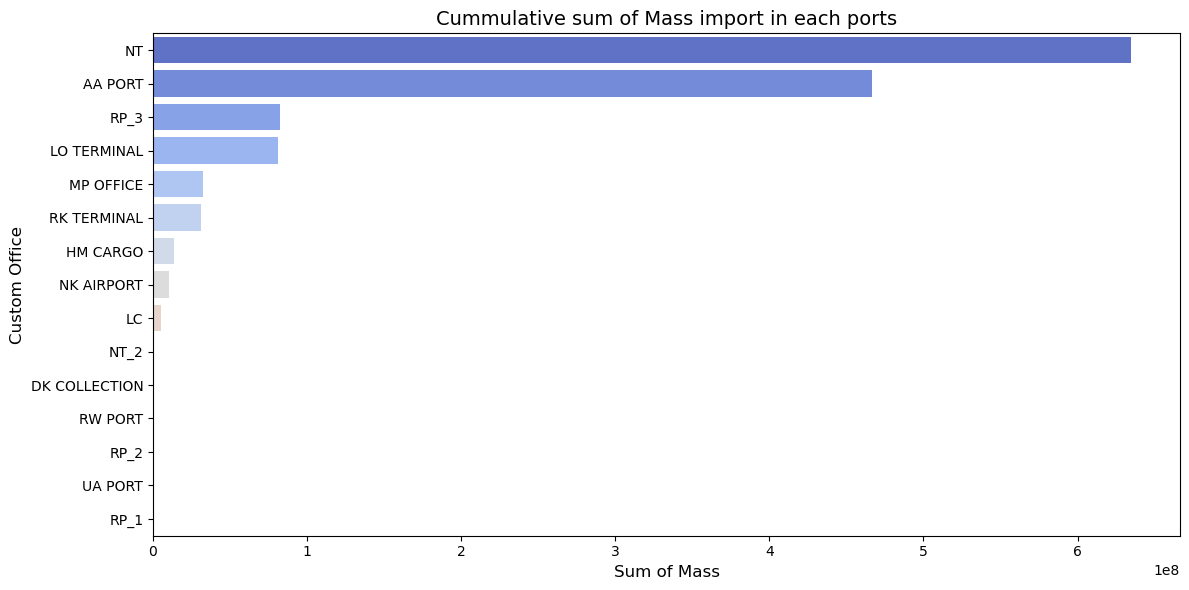

In [17]:
pivot1 = dataset.pivot_table(index='Custom Office',
                            values='Mass(KG)',
                            aggfunc='sum').reset_index().sort_values(by='Mass(KG)',ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=pivot1['Custom Office'], x=pivot1['Mass(KG)'], palette="coolwarm")
plt.xlabel("Sum of Mass", fontsize=12)
plt.ylabel("Custom Office", fontsize=12)
plt.title('Cummulative sum of Mass import in each ports', fontsize=14)
plt.tight_layout()

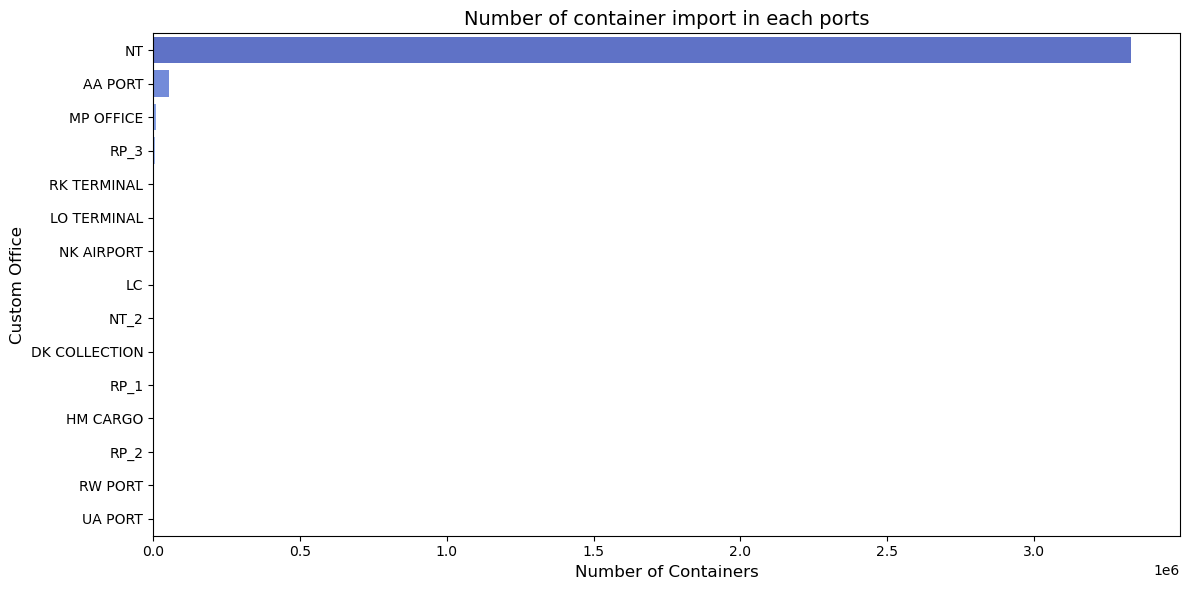

In [18]:
pivot1a = dataset.pivot_table(index='Custom Office',
                            values='Nbr Of Containers',
                            aggfunc='sum').reset_index().sort_values(by='Nbr Of Containers',ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(y=pivot1a['Custom Office'], x=pivot1a['Nbr Of Containers'], palette="coolwarm")
plt.xlabel("Number of Containers", fontsize=12)
plt.ylabel("Custom Office", fontsize=12)
plt.title('Number of container import in each ports', fontsize=14)
plt.tight_layout()

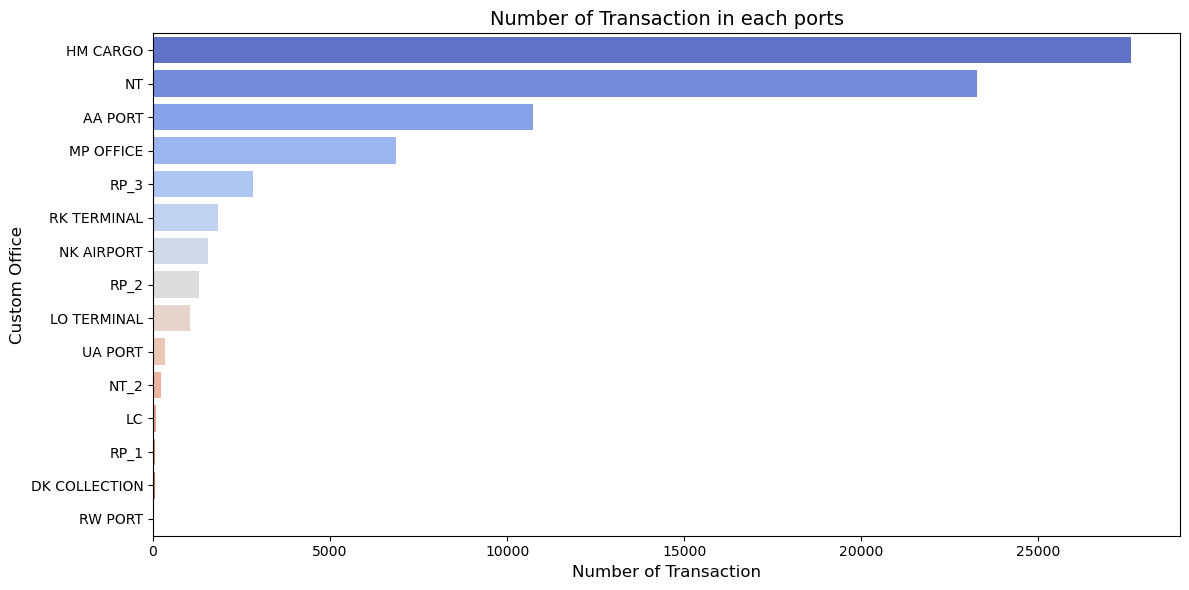

In [19]:
pivot1b = dataset.pivot_table(index='Custom Office',
                            values='Reg Number',
                            aggfunc='count').reset_index().sort_values(by='Reg Number',ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(y=pivot1b['Custom Office'], x=pivot1b['Reg Number'], palette="coolwarm")
plt.xlabel("Number of Transaction", fontsize=12)
plt.ylabel("Custom Office", fontsize=12)
plt.title('Number of Transaction in each ports', fontsize=14)
plt.tight_layout()

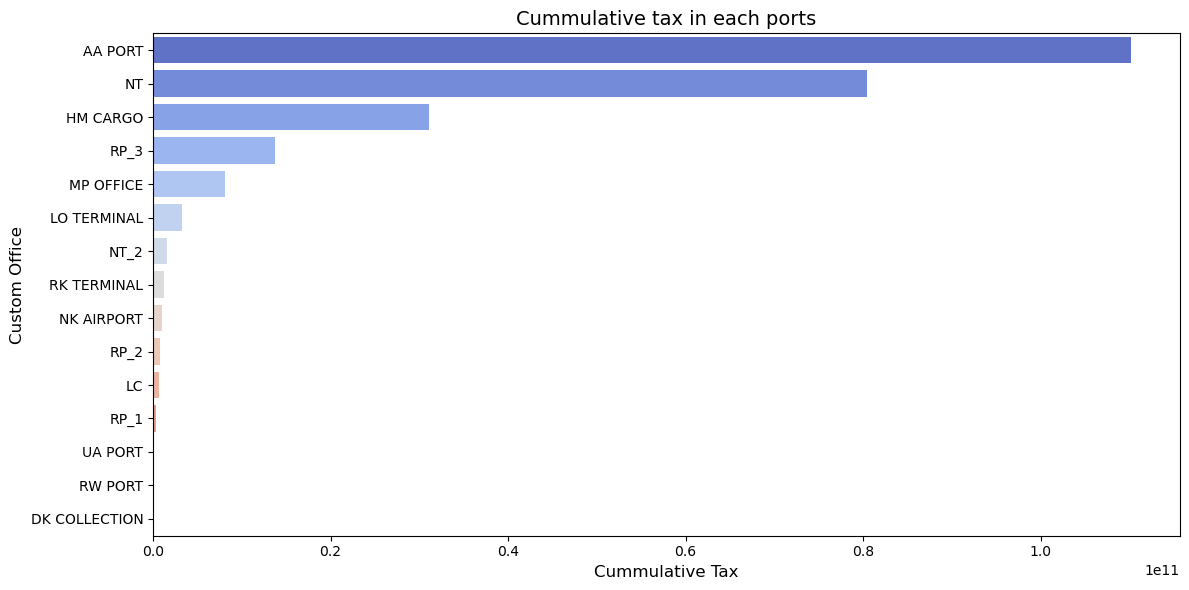

In [20]:
pivot1c = dataset.pivot_table(index='Custom Office',
                            values='Total Tax(N)',
                            aggfunc='sum').reset_index().sort_values(by='Total Tax(N)',ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(y=pivot1c['Custom Office'], x=pivot1c['Total Tax(N)'], palette="coolwarm")
plt.xlabel("Cummulative Tax", fontsize=12)
plt.ylabel("Custom Office", fontsize=12)
plt.title('Cummulative tax in each ports', fontsize=14)
plt.tight_layout()

In [21]:
pivot1c1 = dataset.pivot_table(index='Custom Office',
                            values='Total Tax(N)',
                            aggfunc='sum').reset_index().sort_values(by='Total Tax(N)',ascending=False)
pivot1c1['Percentage'] = (pivot1c1['Total Tax(N)']/pivot1c1['Total Tax(N)'].sum())*100

pivot1c1

Custom Office  Total Tax(N)  Percentage
0         AA PORT  1.101776e+11   43.629383
7              NT  8.039036e+10   31.833890
2        HM CARGO  3.108019e+10   12.307486
12           RP_3  1.368642e+10    5.419702
5       MP OFFICE  8.059131e+09    3.191346
4     LO TERMINAL  3.317416e+09    1.313668
8            NT_2  1.571962e+09    0.622483
9     RK TERMINAL  1.263797e+09    0.500453
6      NK AIRPORT  1.011084e+09    0.400381
11           RP_2  7.793867e+08    0.308630
3              LC  6.692392e+08    0.265013
10           RP_1  3.021980e+08    0.119668
14        UA PORT  1.540707e+08    0.061011
13        RW PORT  4.204076e+07    0.016648
1   DK COLLECTION  2.585577e+07    0.010239

In [22]:
dataset['Receipt Date'].max() - dataset['Receipt Date'].min()

Timedelta('1385 days 00:00:00')

#### Q2 -- Importer Churning

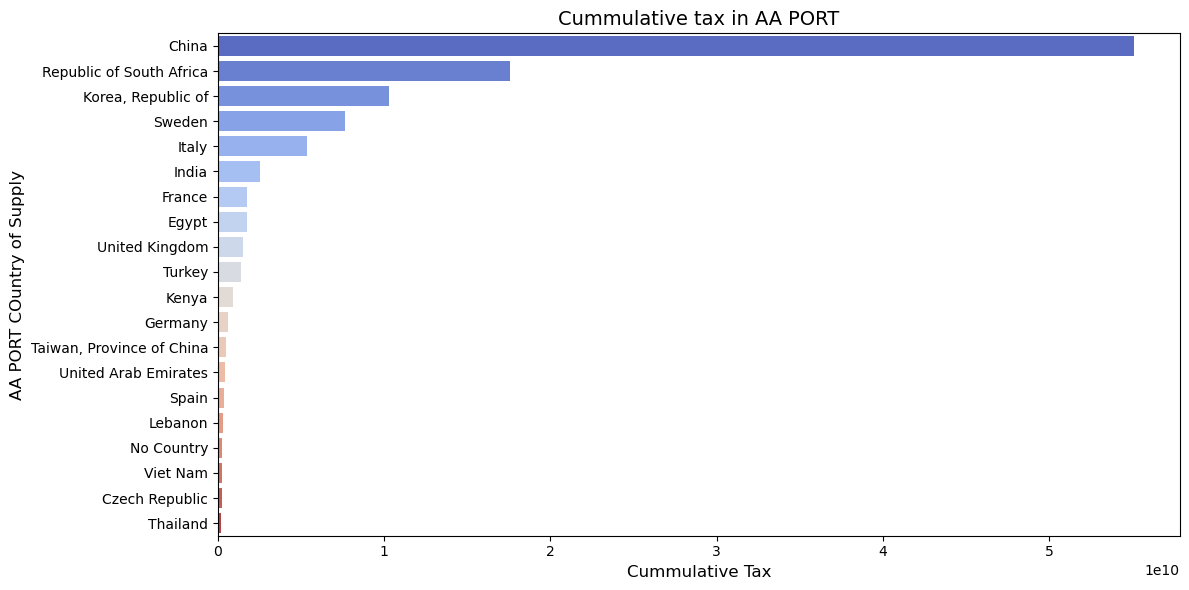

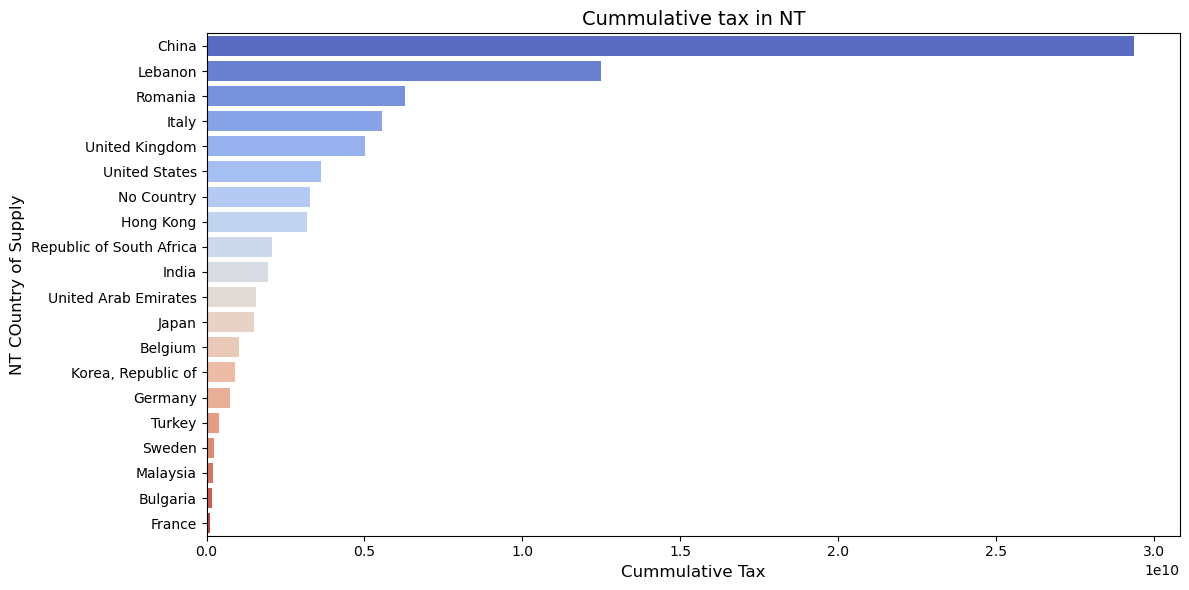

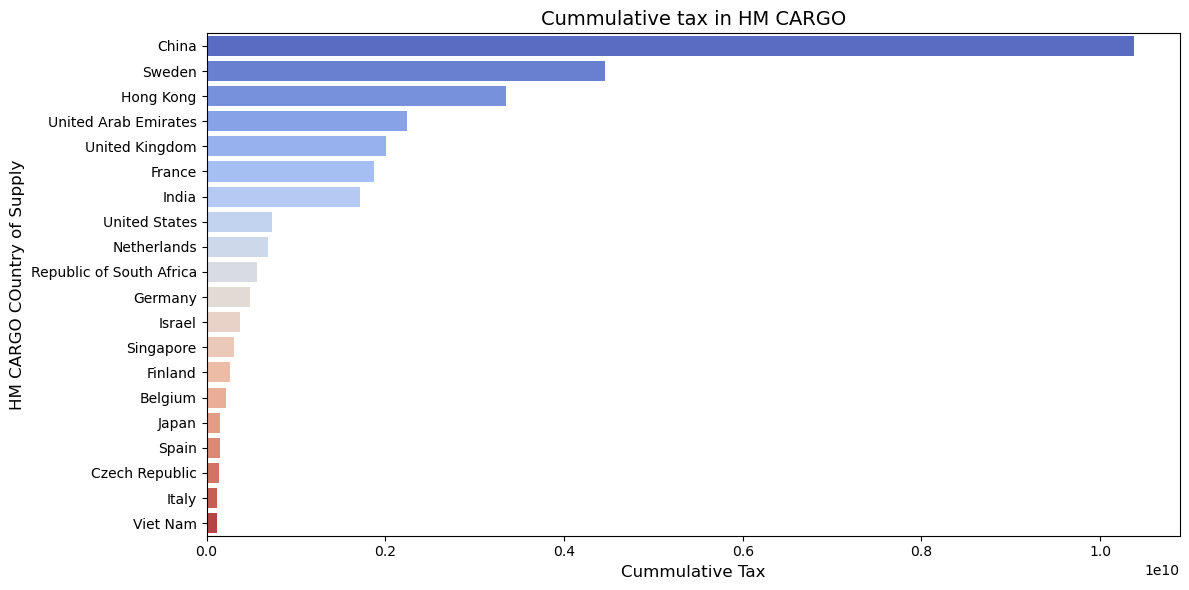

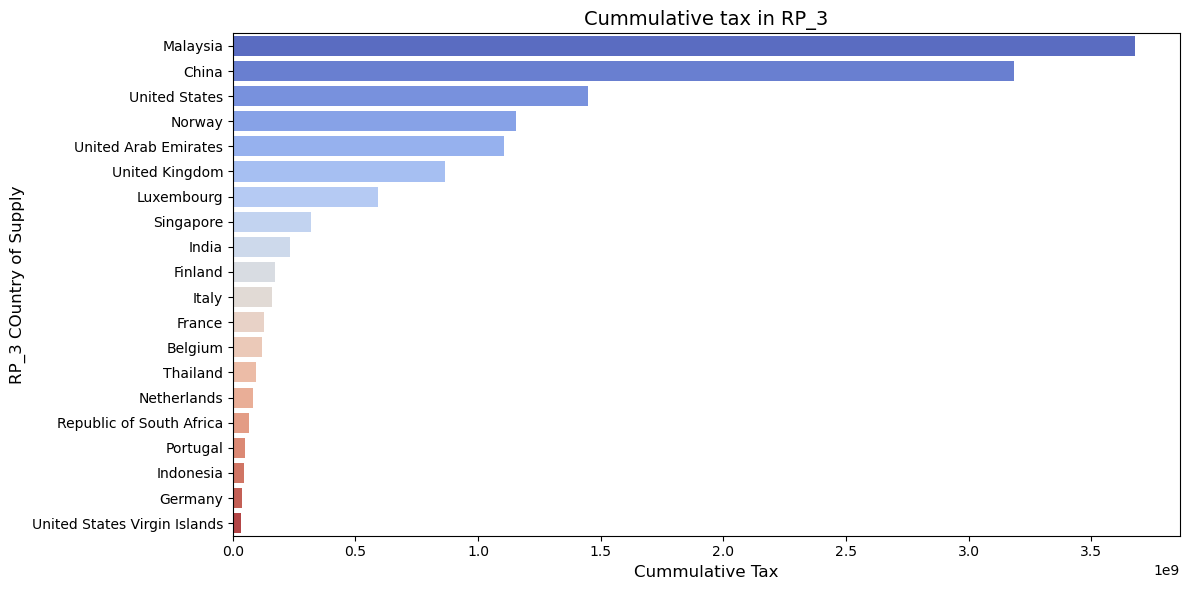

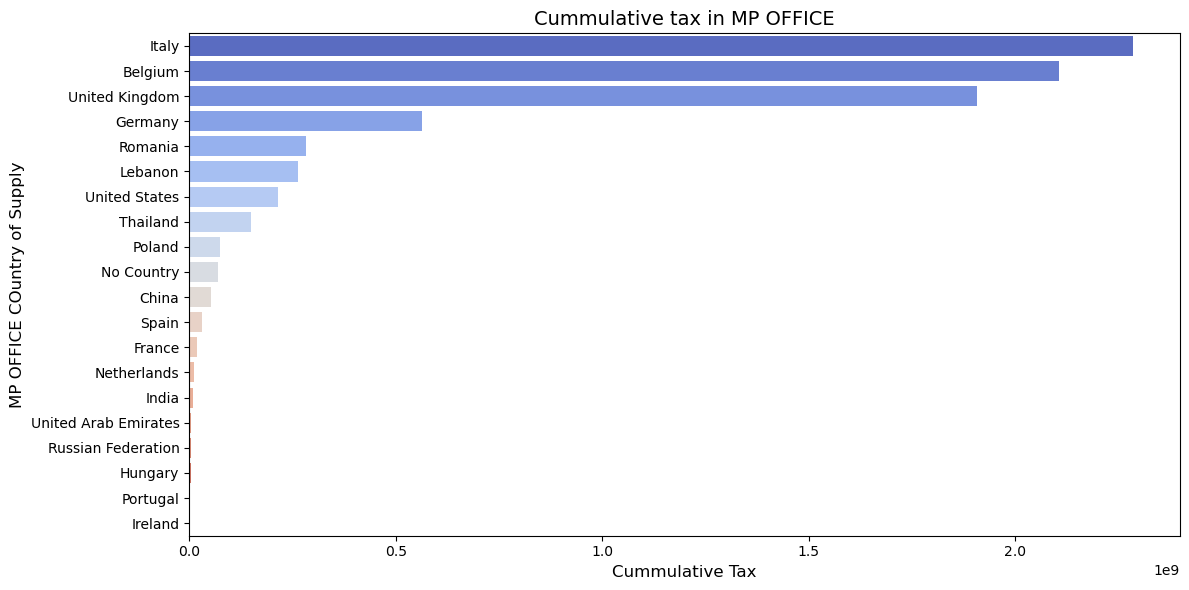

In [23]:
ports = ['AA PORT','NT','HM CARGO','RP_3','MP OFFICE']
for port in ports:
    pivot1d = pd.pivot_table(dataset[dataset['Custom Office']==port], 
                           values='Total Tax(N)', 
                           index='Country  of Supply',
                           columns='Custom Office',
                           aggfunc='sum').sort_values(by=port,ascending=False)

    #ploting of firsst 20 of pivot table
    plt.figure(figsize=(12, 6))
    sns.barplot(y=pivot1d.head(20).index, x=pivot1d[port][:20], palette="coolwarm")
    plt.xlabel("Cummulative Tax", fontsize=12)
    plt.ylabel(port+ " COuntry of Supply", fontsize=12)
    plt.title('Cummulative tax in ' + port, fontsize=14)
    plt.tight_layout()

In [24]:
pivot1d1 = pd.pivot_table(dataset, 
                       values='Total Tax(N)', 
                       index='Country  of Supply',
                       columns='Custom Office',
                       aggfunc='sum').sum(axis=1).reset_index().sort_values(by=0,ascending=False)

pivot1d1['Percentage'] = (pivot1d1[0]/pivot1d1[0].sum())*100

pivot1d1

Country  of Supply             0    Percentage
22                      China  1.020096e+11  4.039494e+01
97   Republic of South Africa  2.029453e+10  8.036458e+00
56                      Italy  1.363306e+10  5.398573e+00
66                    Lebanon  1.304304e+10  5.164932e+00
110                    Sweden  1.231234e+10  4.875582e+00
..                        ...           ...           ...
15              Bouvet Island  6.614000e+03  2.619087e-06
69              Liechtenstein  3.615000e+03  1.431509e-06
59                     Jordan  3.200000e+03  1.267172e-06
80                      Nepal  1.714000e+03  6.787292e-07
3                    Anguilla  1.600000e+03  6.335862e-07

[131 rows x 3 columns]

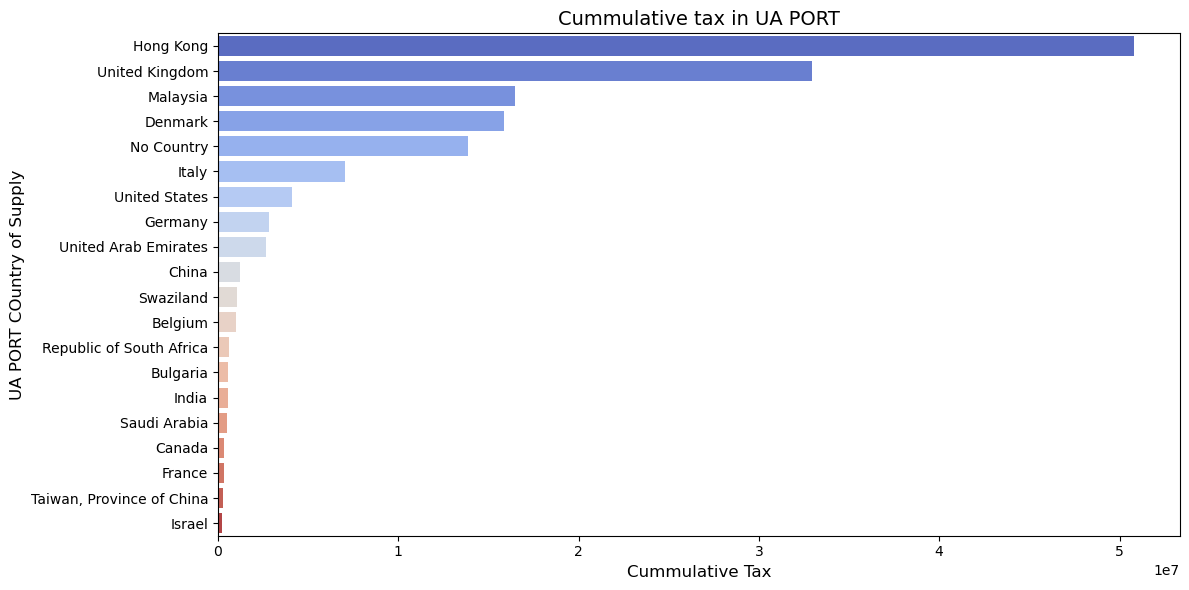

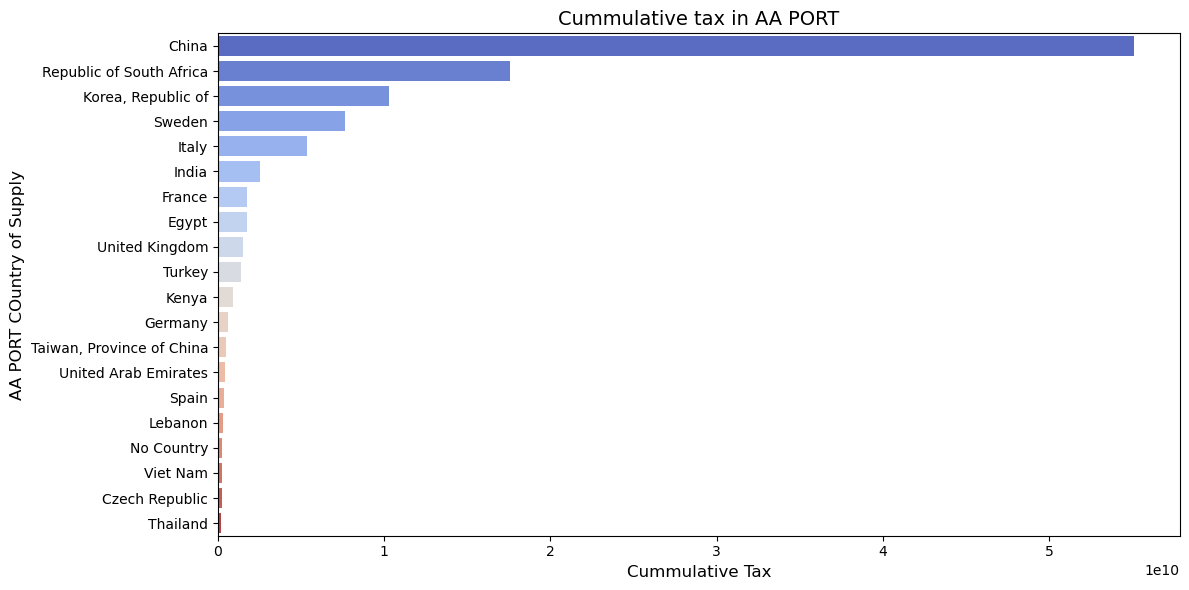

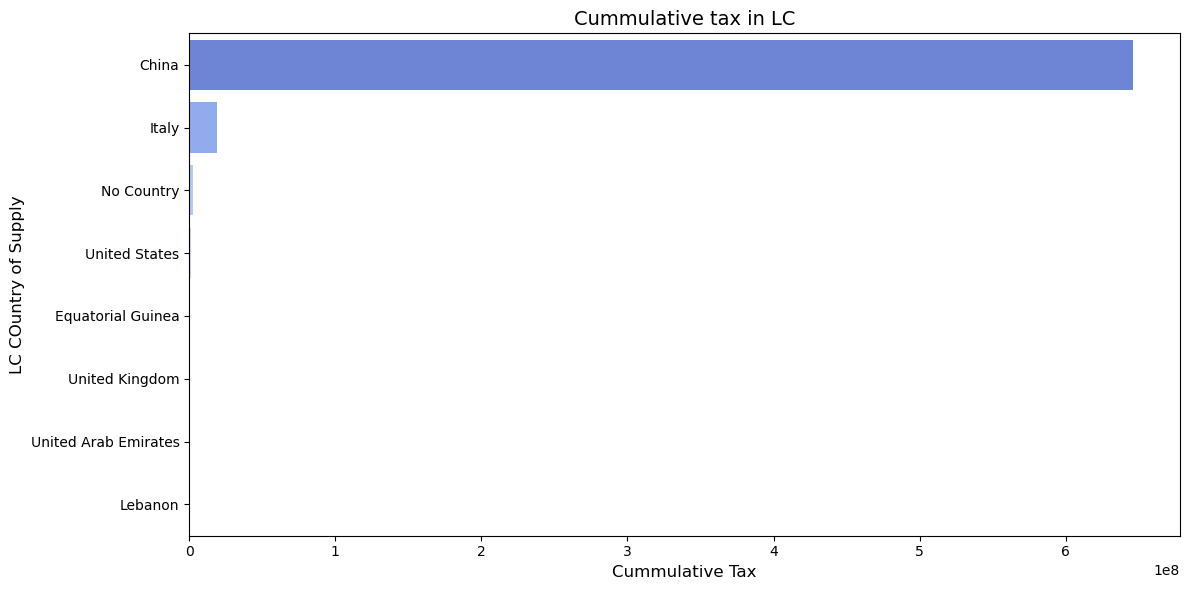

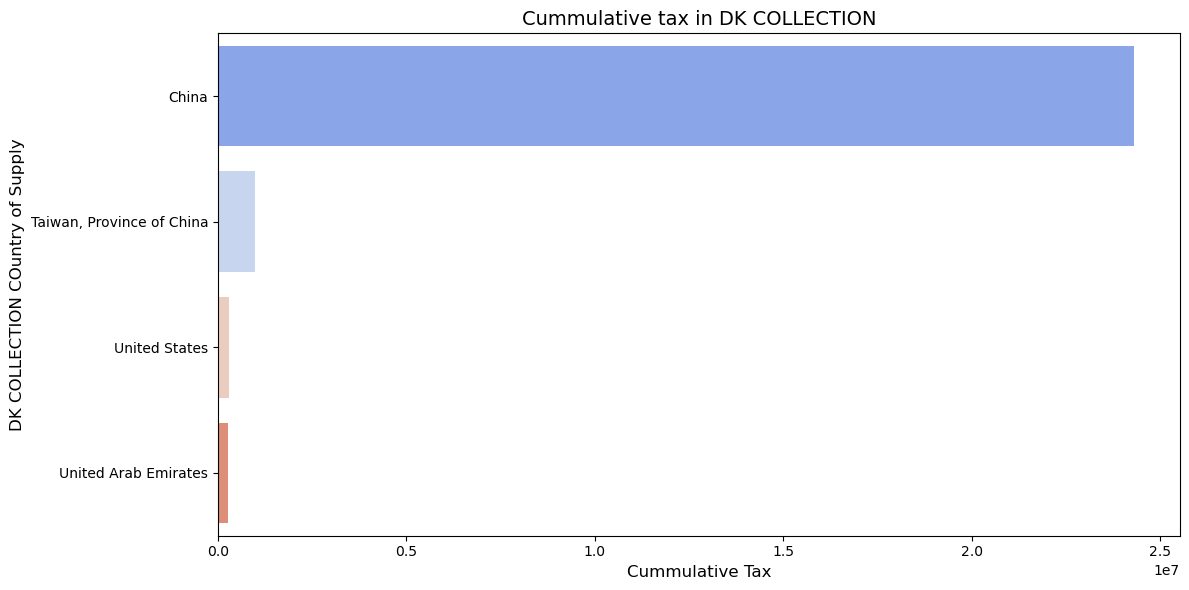

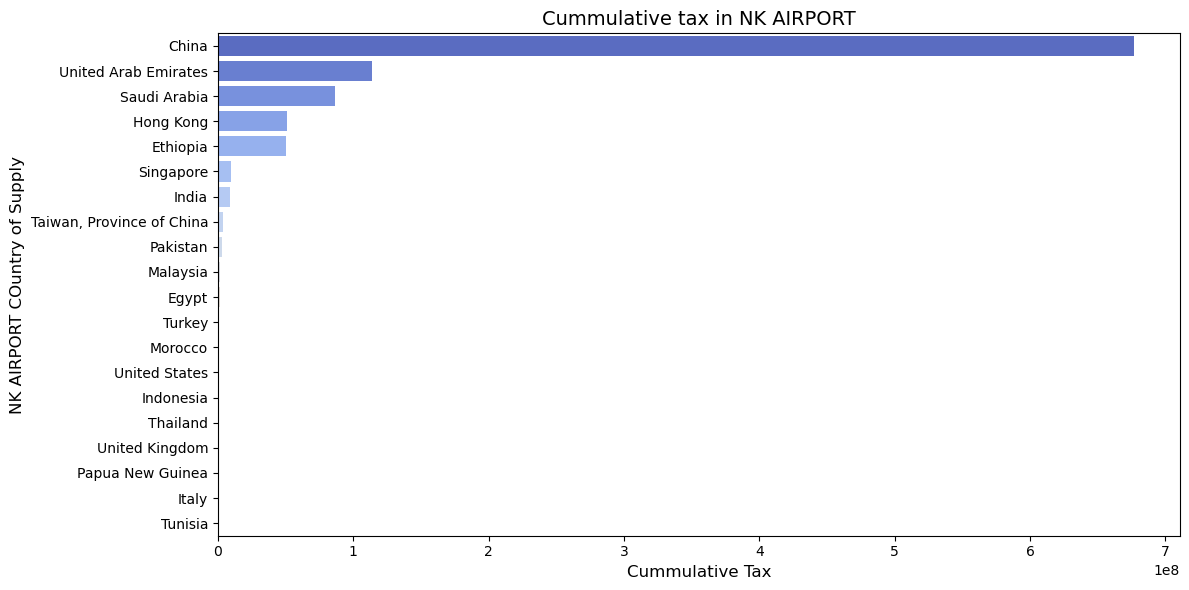

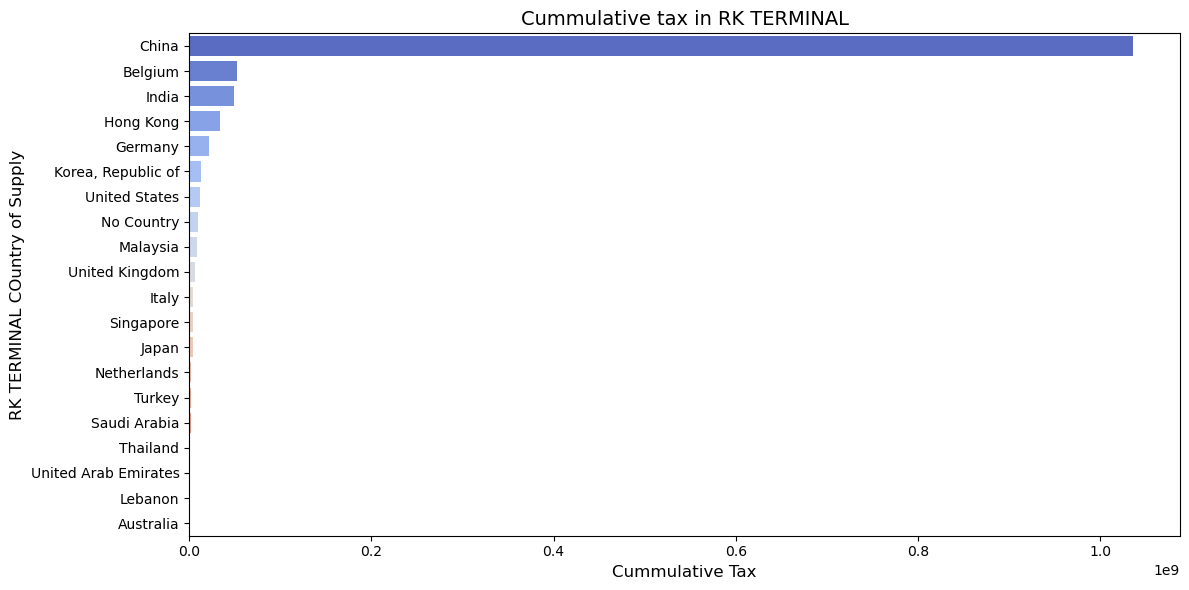

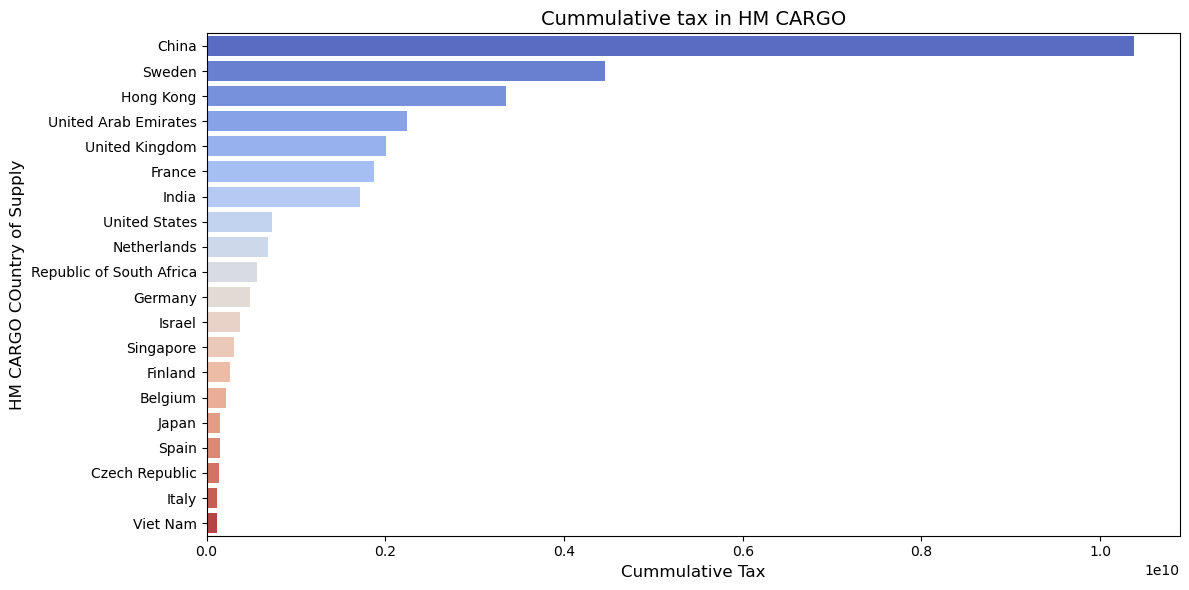

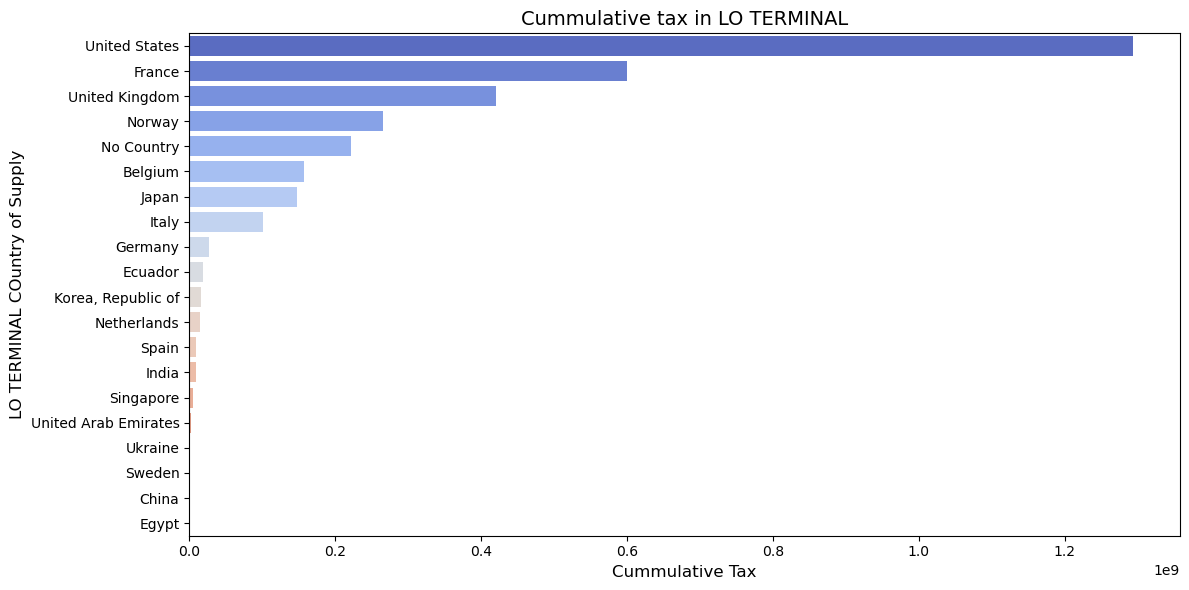

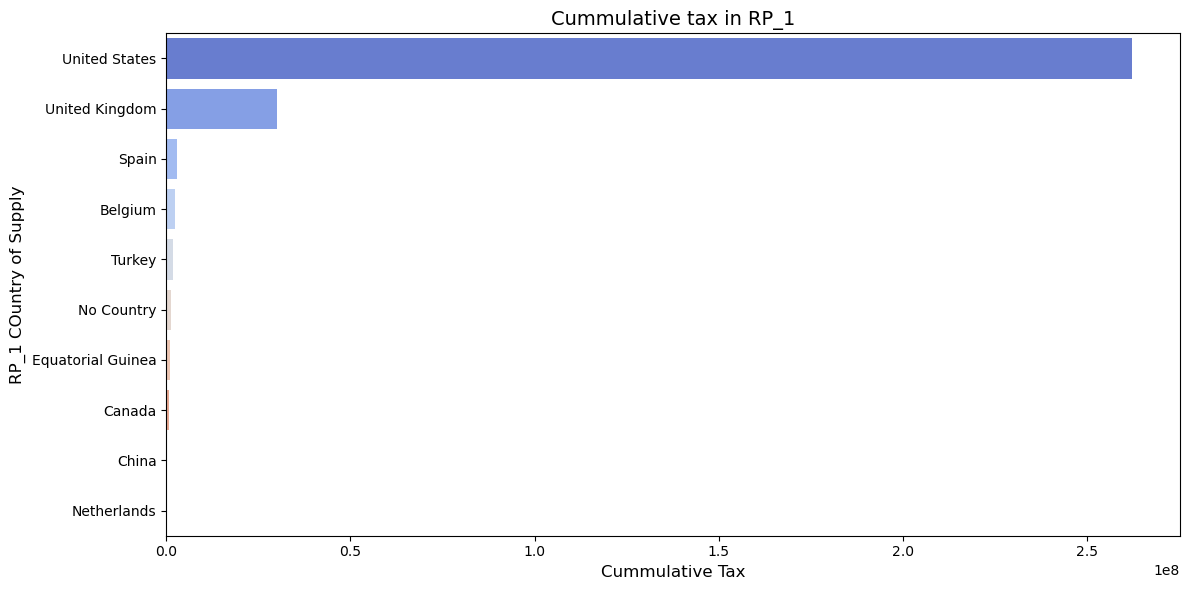

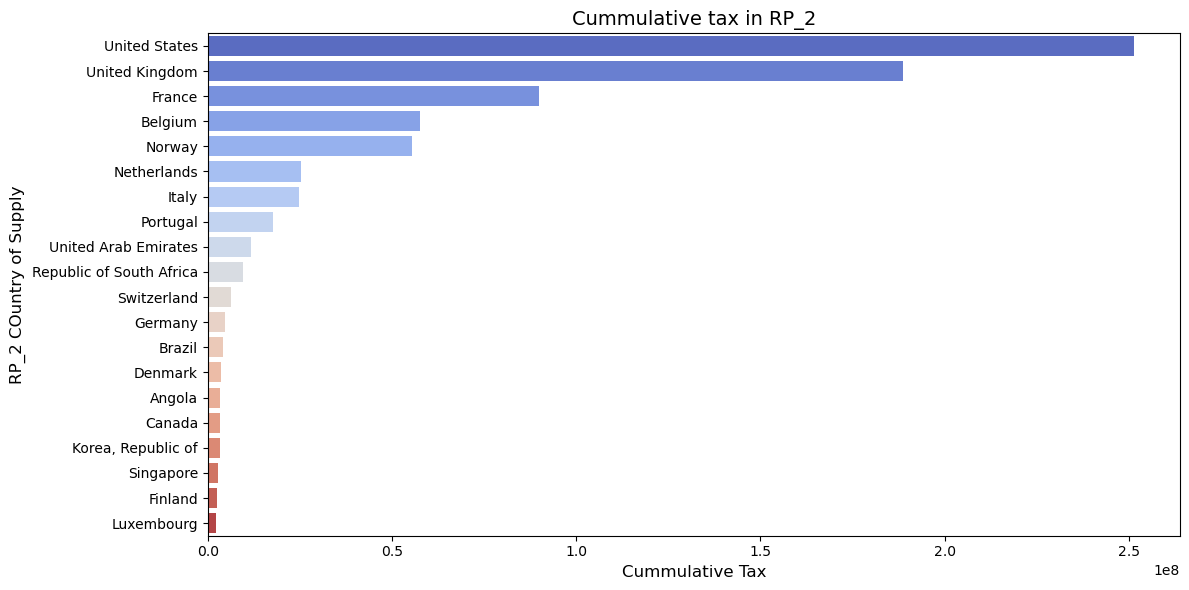

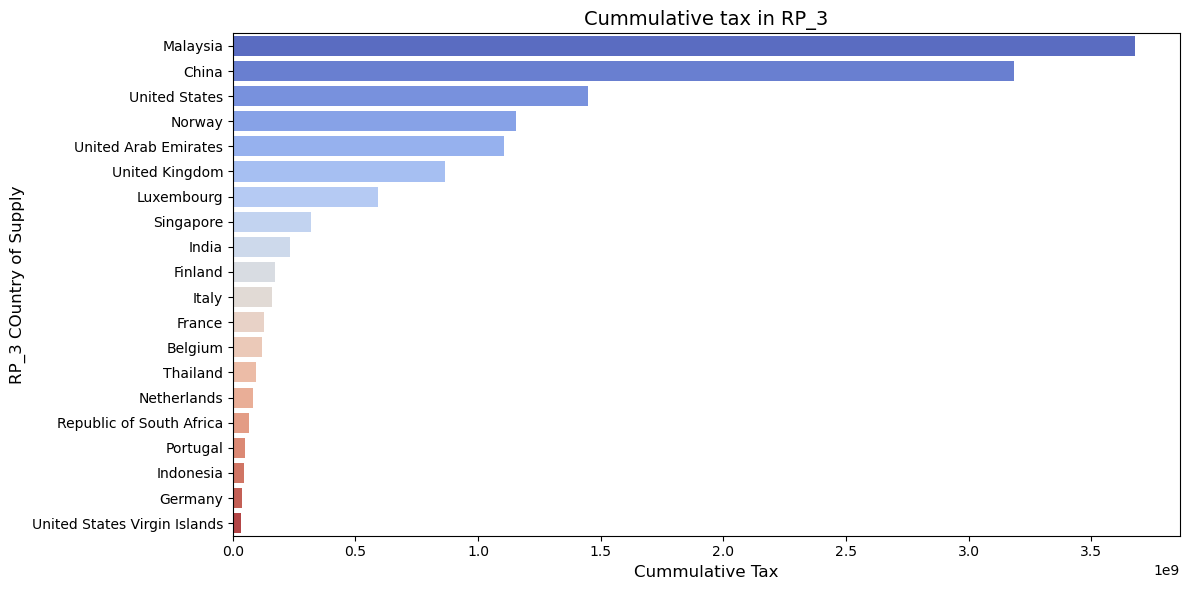

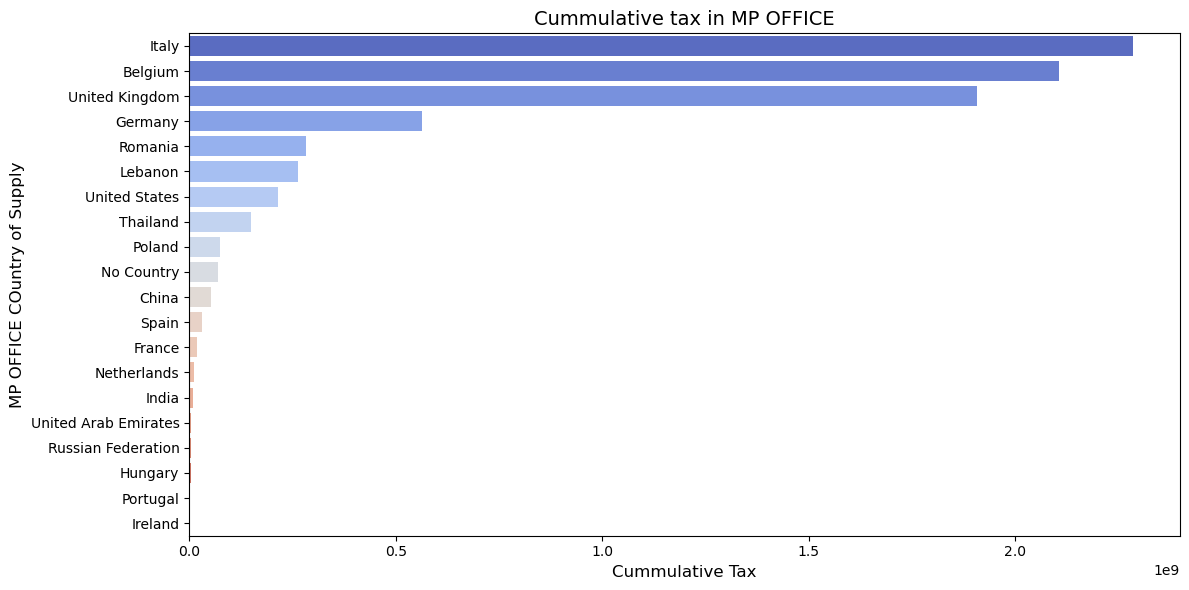

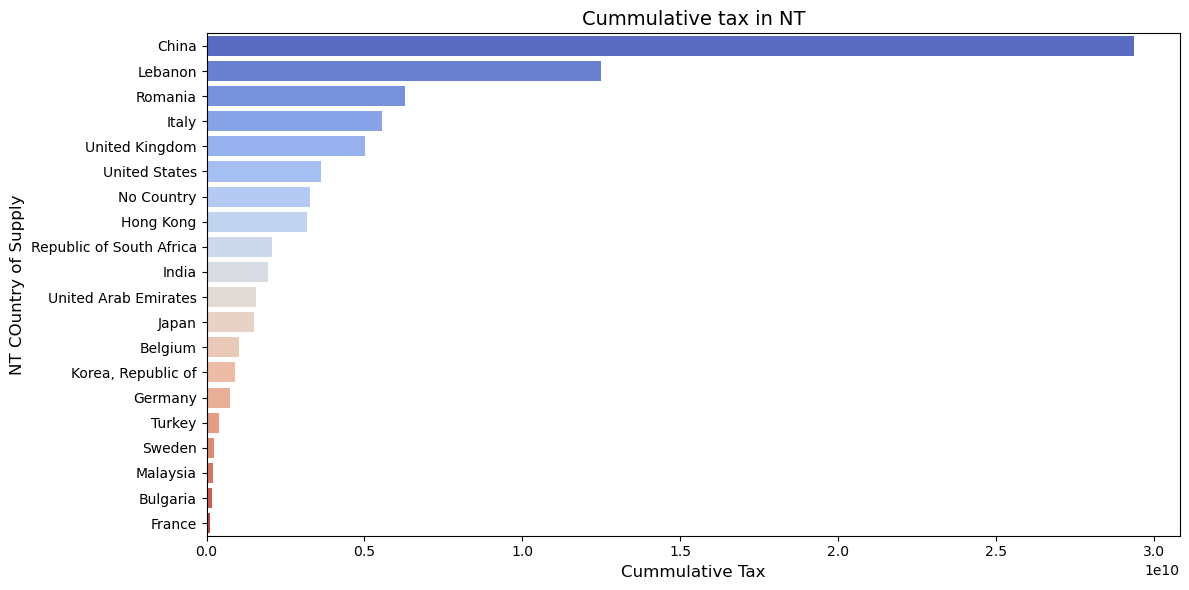

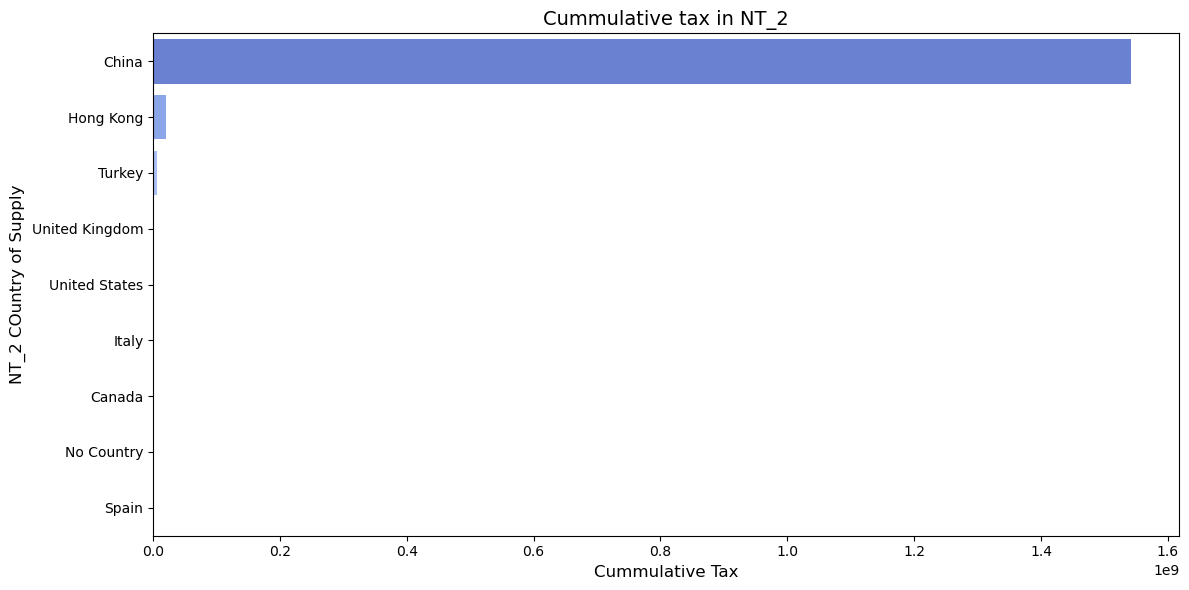

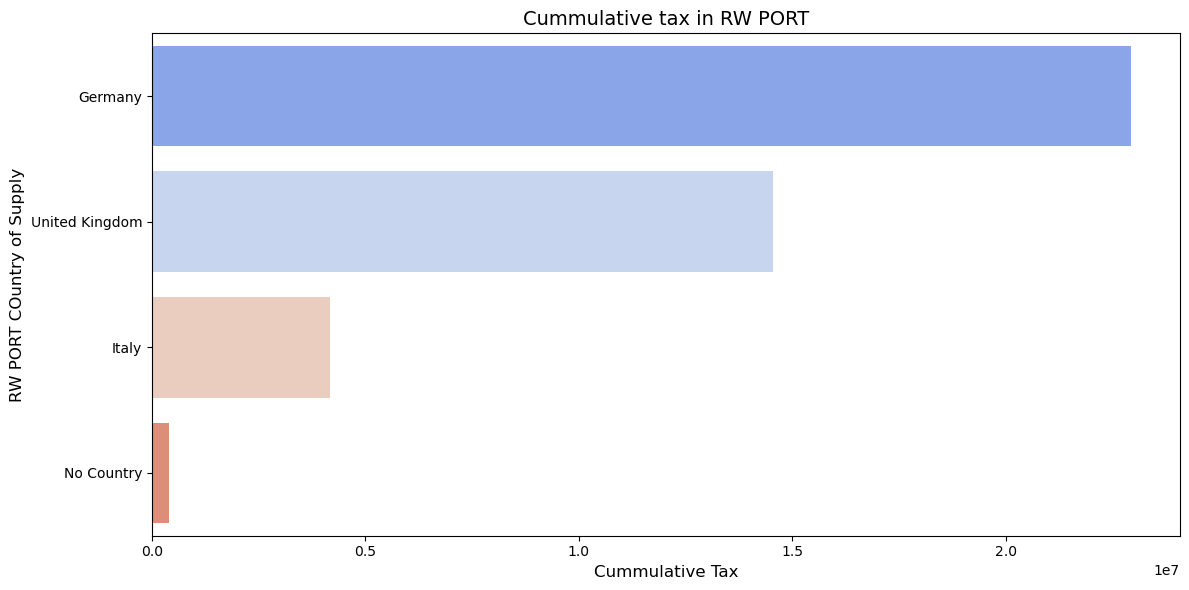

In [25]:
ports = ['UA PORT', 'AA PORT', 'LC', 'DK COLLECTION', 'NK AIRPORT',
       'RK TERMINAL', 'HM CARGO', 'LO TERMINAL', 'RP_1', 'RP_2', 'RP_3',
       'MP OFFICE', 'NT', 'NT_2', 'RW PORT']
for port in ports:
    pivot1d2 = pd.pivot_table(dataset[dataset['Custom Office']==port], 
                           values='Total Tax(N)', 
                           index='Country  of Supply',
                           columns='Custom Office',
                           aggfunc='sum').sort_values(by=port,ascending=False)

    #ploting of firsst 20 of pivot table
    plt.figure(figsize=(12, 6))
    sns.barplot(y=pivot1d2.head(20).index, x=pivot1d2[port][:20], palette="coolwarm")
    plt.xlabel("Cummulative Tax", fontsize=12)
    plt.ylabel(port+ " COuntry of Supply", fontsize=12)
    plt.title('Cummulative tax in ' + port, fontsize=14)
    plt.tight_layout()

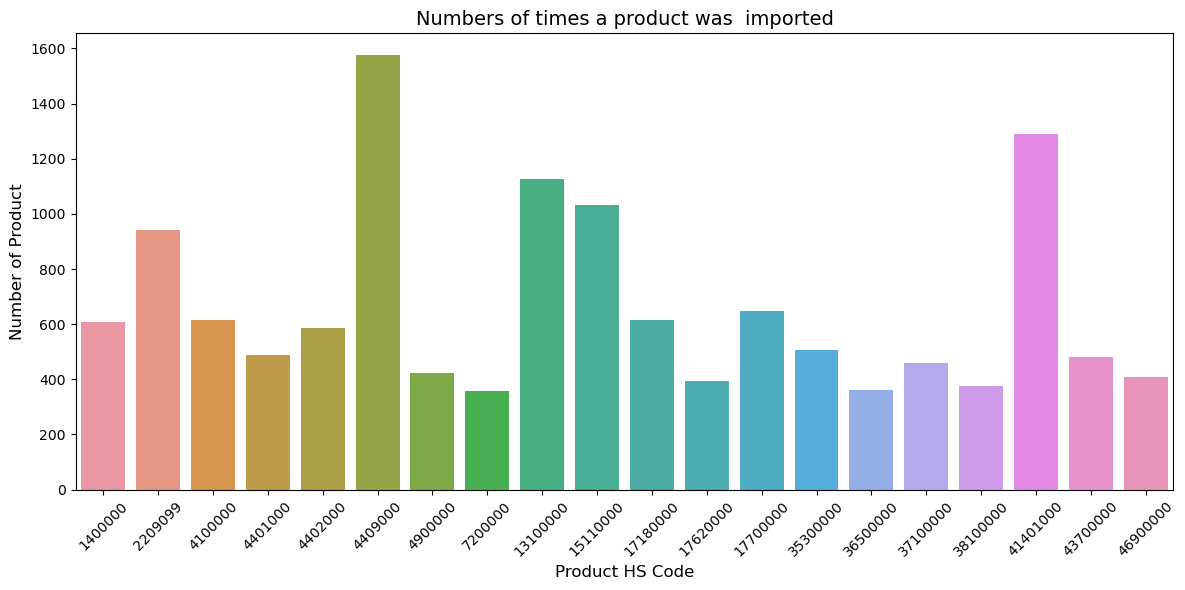

In [26]:
#What product is imported most from Chine

pivot1e = dataset[dataset['Country  of Supply']=='China'].pivot_table(index='HS Code',
                            values='Reg Number',
                            aggfunc='count').reset_index().sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y=pivot1e['Reg Number'][:20], x=pivot1e['HS Code'][:20])
plt.xlabel("Product HS Code", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Number of Product", fontsize=12)
plt.title('Numbers of times a product was  imported',fontsize=14)
plt.tight_layout()

In [27]:
pivot1e1 = dataset[dataset['Country  of Supply']=='China'].pivot_table(index='HS Code',
                            values='Mass(KG)',
                            aggfunc='sum').reset_index().sort_values(by='Mass(KG)',ascending=False)

pivot1e1.head(10)

HS Code  Mass(KG)
25    2209099  83365395
41    4409000  50219912
6     1400000  39037956
59    7200000  31795077
39    4401000  26991405
85   13100000  23761336
238  41401000  20767569
99   15900000  19990074
266  45909000  18637073
92   15110000  16537871

In [28]:
pivot1e2 = dataset[dataset['Country  of Supply']=='China'].pivot_table(index='HS Code',
                            values='Total Tax(N)',
                            aggfunc='sum').reset_index().sort_values(by='Total Tax(N)',ascending=False)

pivot1e2['Percentage'] = (pivot1e2['Total Tax(N)']/pivot1e2['Total Tax(N)'].sum())*100
pivot1e2['Percentage in overall tax'] = (pivot1e2['Total Tax(N)']/dataset['Total Tax(N)'].sum())*100

pivot1e2.head(10)

HS Code  Total Tax(N)  Percentage  Percentage in overall tax
59    7200000  1.179439e+10   11.562034                   4.670476
172  28721000  7.882811e+09    7.727515                   3.121525
255  44200000  7.781233e+09    7.627938                   3.081301
25    2209099  7.455276e+09    7.308403                   2.952225
119  17610000  6.097587e+09    5.977461                   2.414592
171  28719000  5.160202e+09    5.058543                   2.043395
176  29100000  4.458647e+09    4.370809                   1.765586
120  17620000  3.813438e+09    3.738312                   1.510089
12    2111000  3.535923e+09    3.466263                   1.400195
133  19890000  3.329883e+09    3.264283                   1.318605

In [29]:
pivot1e2.sort_values(by='Total Tax(N)',ascending=False).head(10)

HS Code  Total Tax(N)  Percentage  Percentage in overall tax
59    7200000  1.179439e+10   11.562034                   4.670476
172  28721000  7.882811e+09    7.727515                   3.121525
255  44200000  7.781233e+09    7.627938                   3.081301
25    2209099  7.455276e+09    7.308403                   2.952225
119  17610000  6.097587e+09    5.977461                   2.414592
171  28719000  5.160202e+09    5.058543                   2.043395
176  29100000  4.458647e+09    4.370809                   1.765586
120  17620000  3.813438e+09    3.738312                   1.510089
12    2111000  3.535923e+09    3.466263                   1.400195
133  19890000  3.329883e+09    3.264283                   1.318605

In [30]:
pivot1e2.reset_index().sort_values(by='Percentage in overall tax',ascending=False).head(10)

index   HS Code  Total Tax(N)  Percentage  Percentage in overall tax
0     59   7200000  1.179439e+10   11.562034                   4.670476
1    172  28721000  7.882811e+09    7.727515                   3.121525
2    255  44200000  7.781233e+09    7.627938                   3.081301
3     25   2209099  7.455276e+09    7.308403                   2.952225
4    119  17610000  6.097587e+09    5.977461                   2.414592
5    171  28719000  5.160202e+09    5.058543                   2.043395
6    176  29100000  4.458647e+09    4.370809                   1.765586
7    120  17620000  3.813438e+09    3.738312                   1.510089
8     12   2111000  3.535923e+09    3.466263                   1.400195
9    133  19890000  3.329883e+09    3.264283                   1.318605

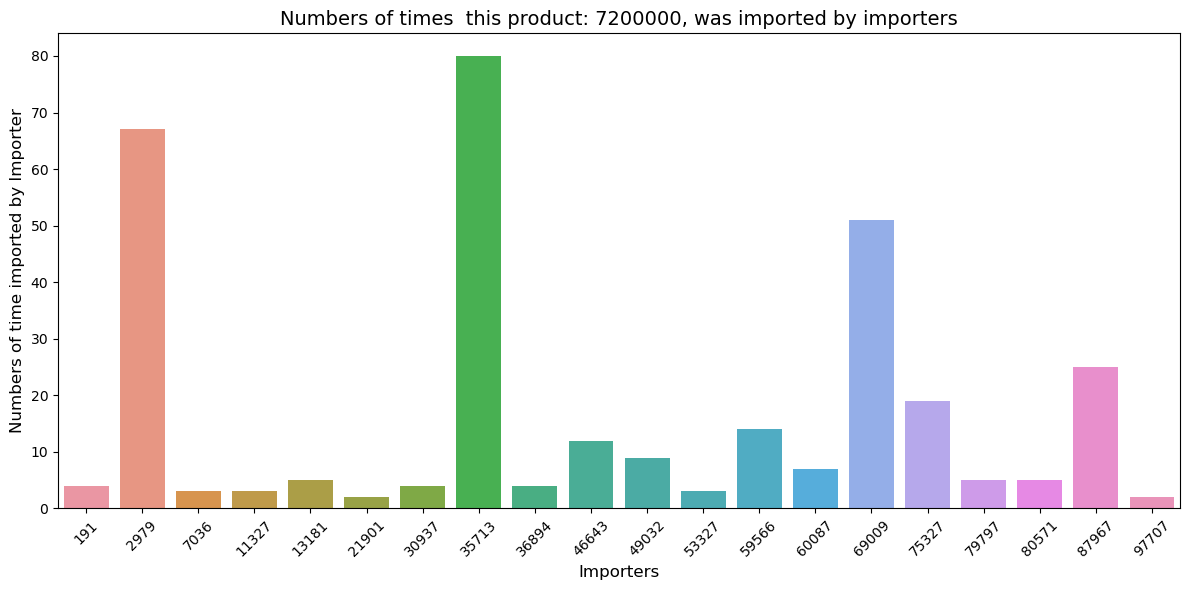

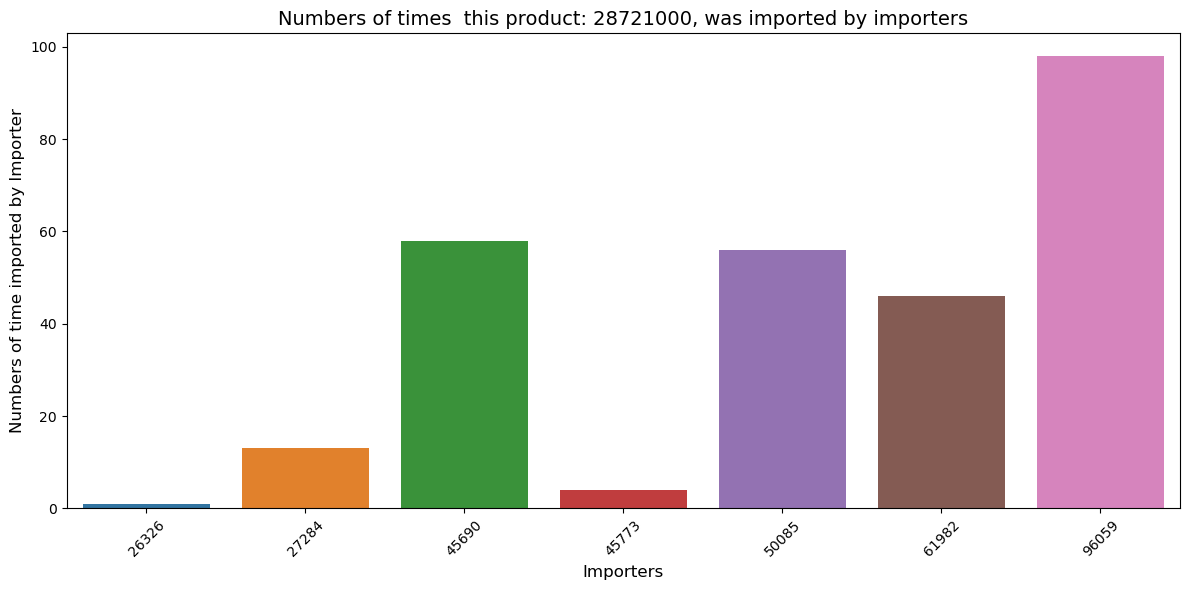

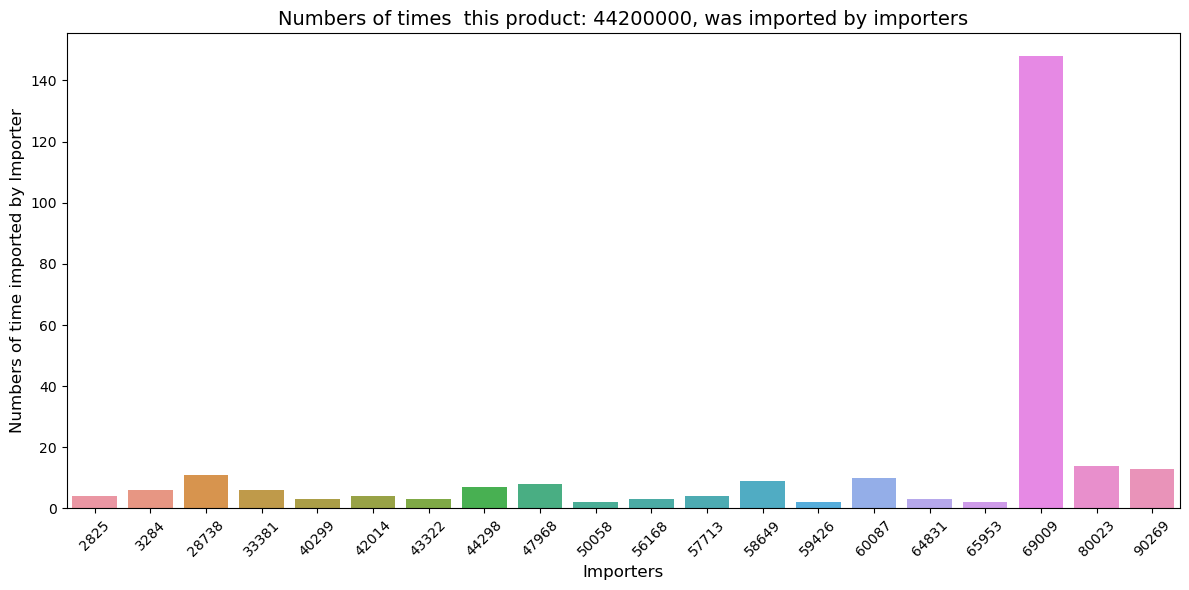

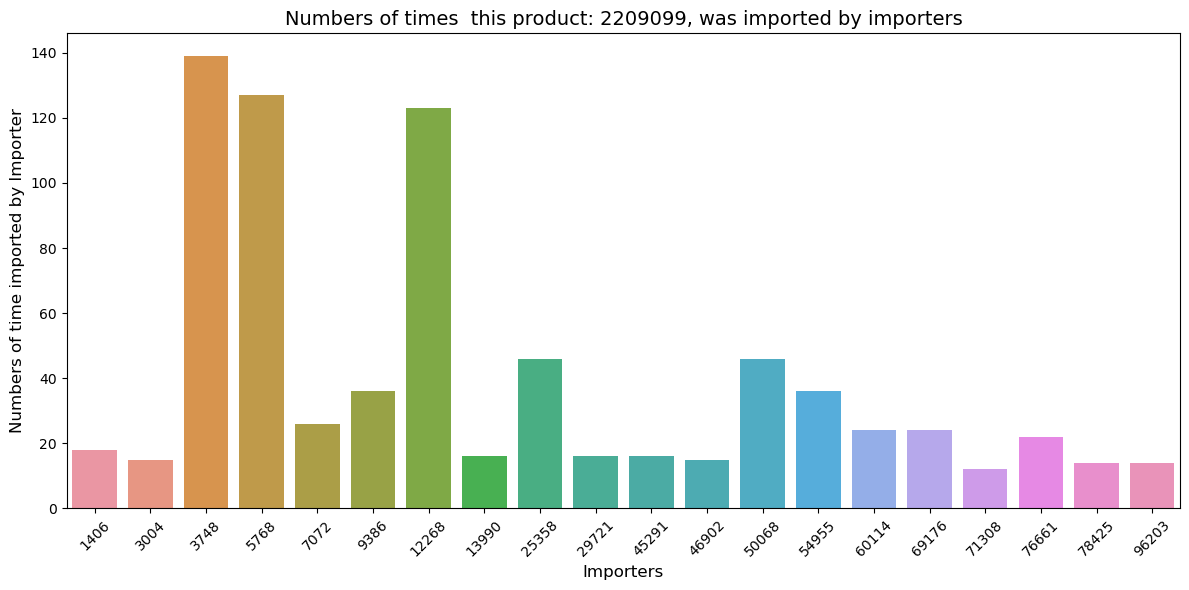

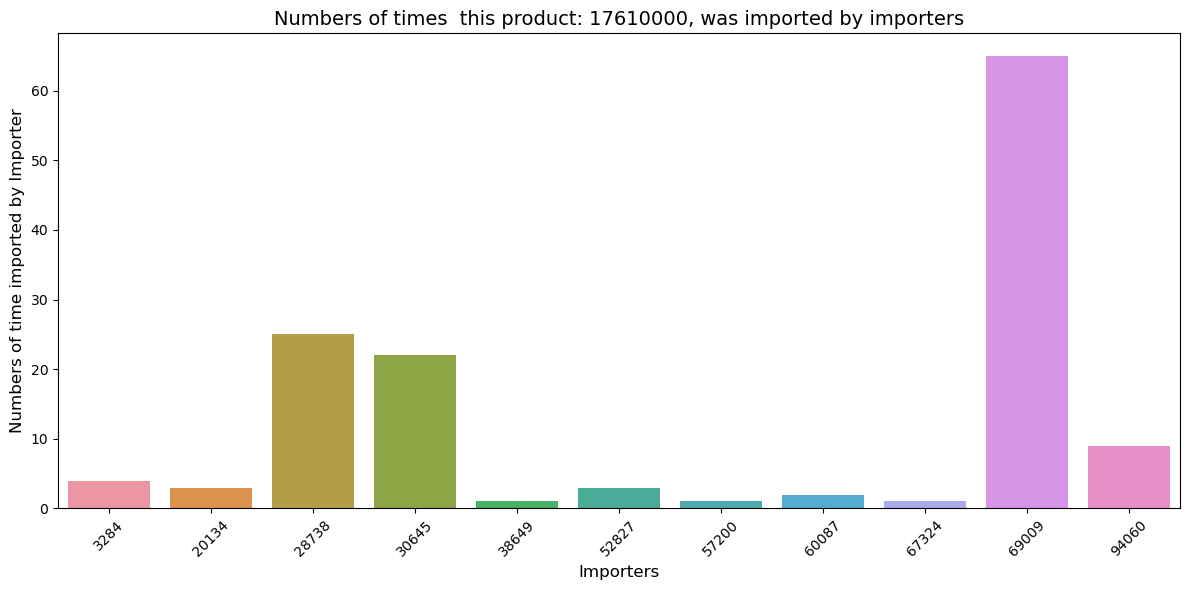

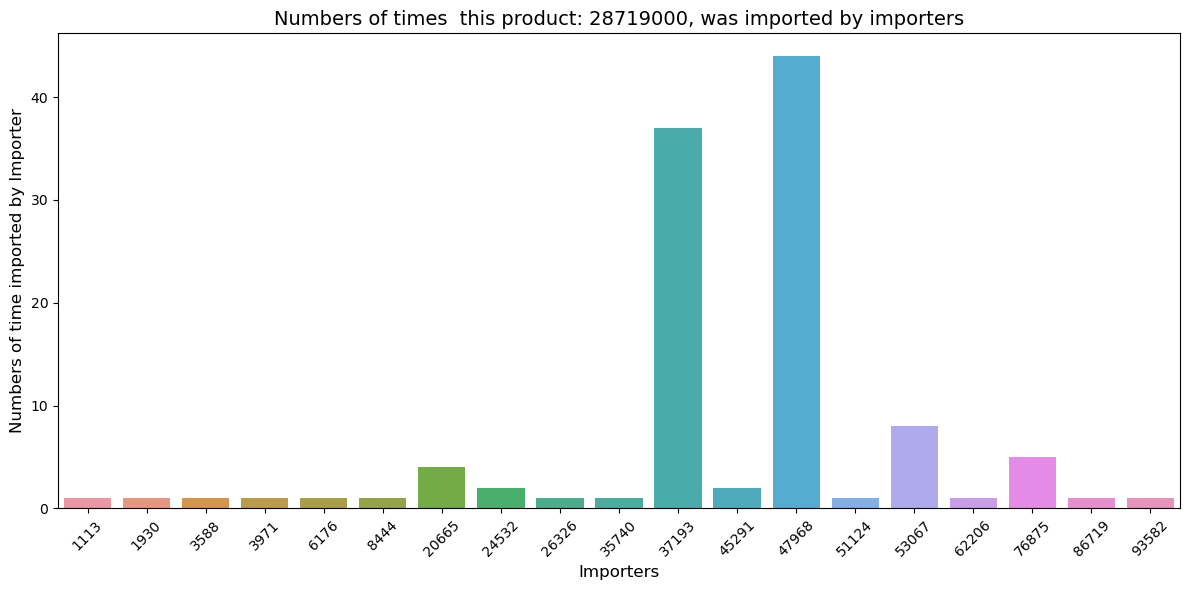

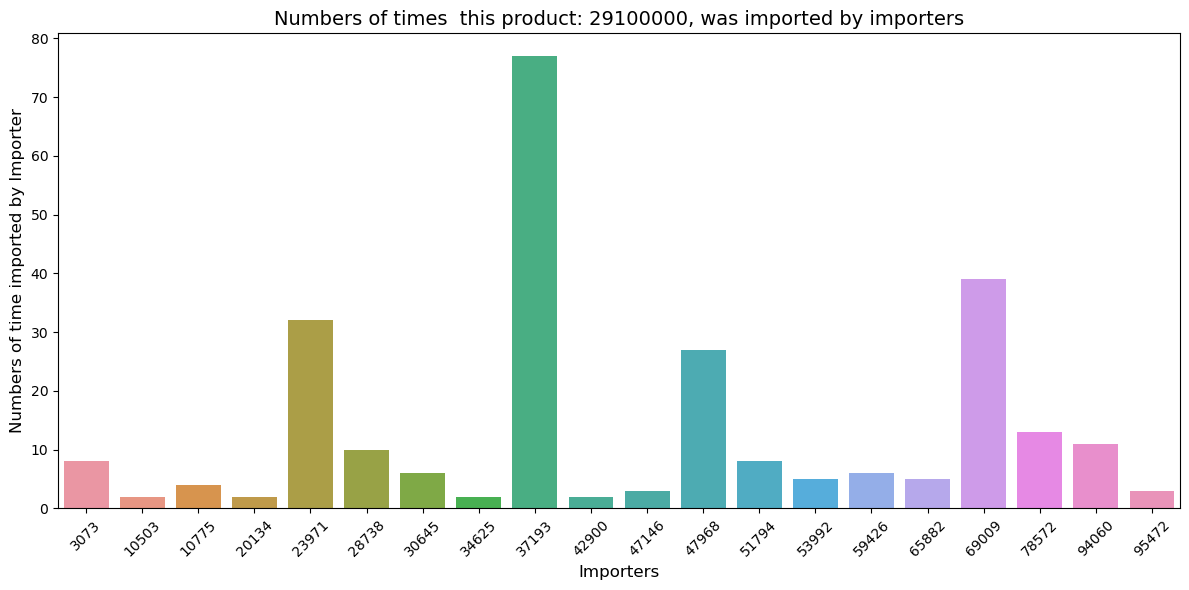

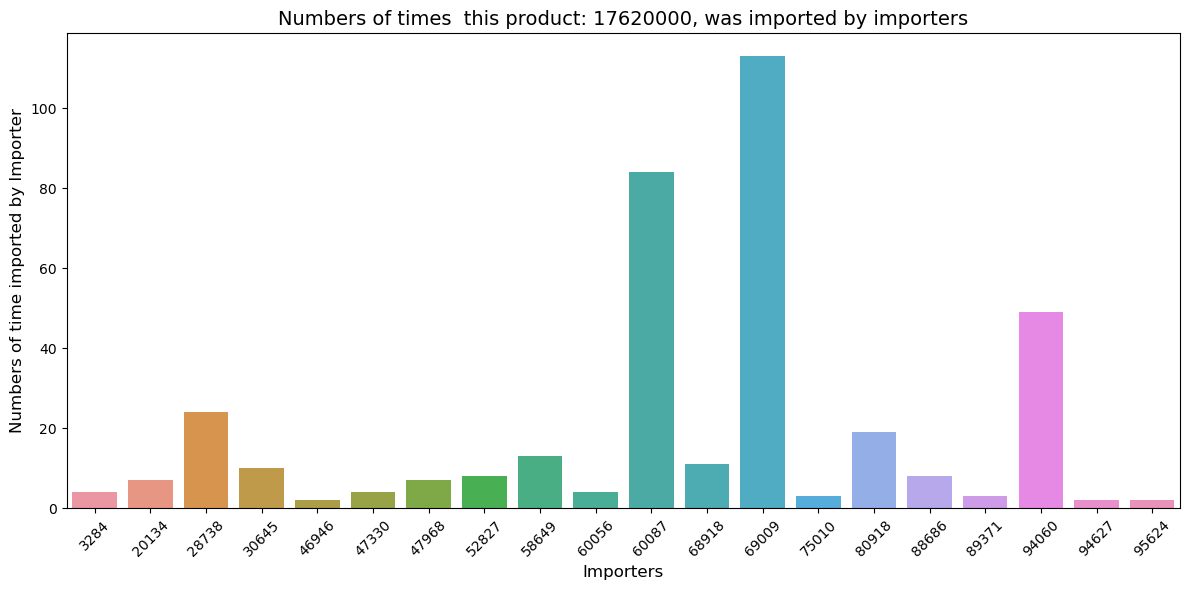

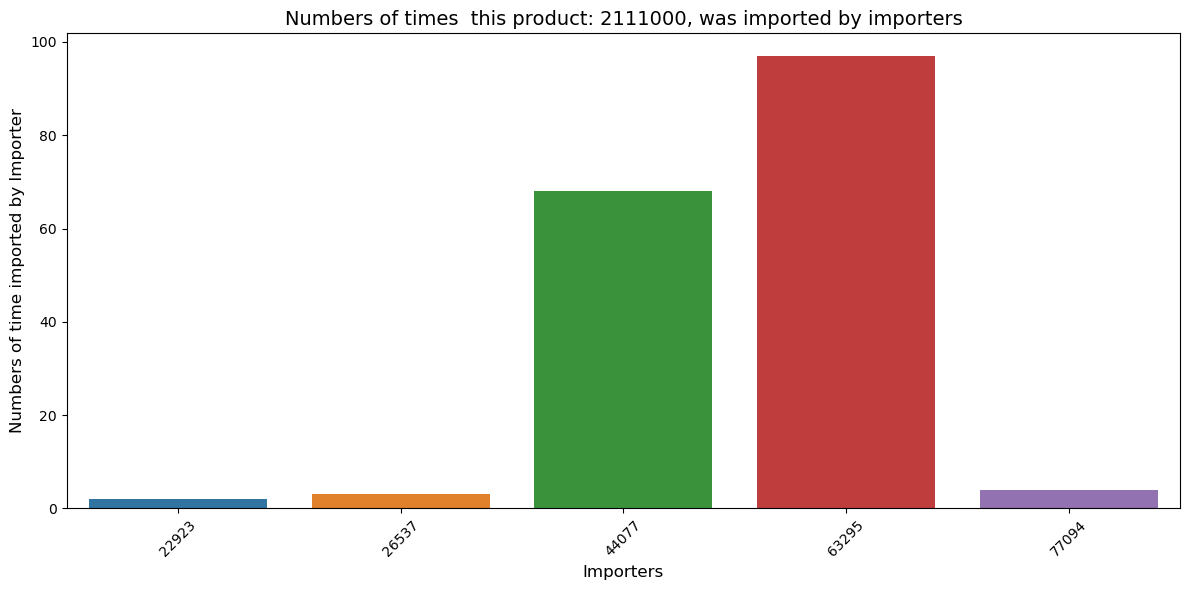

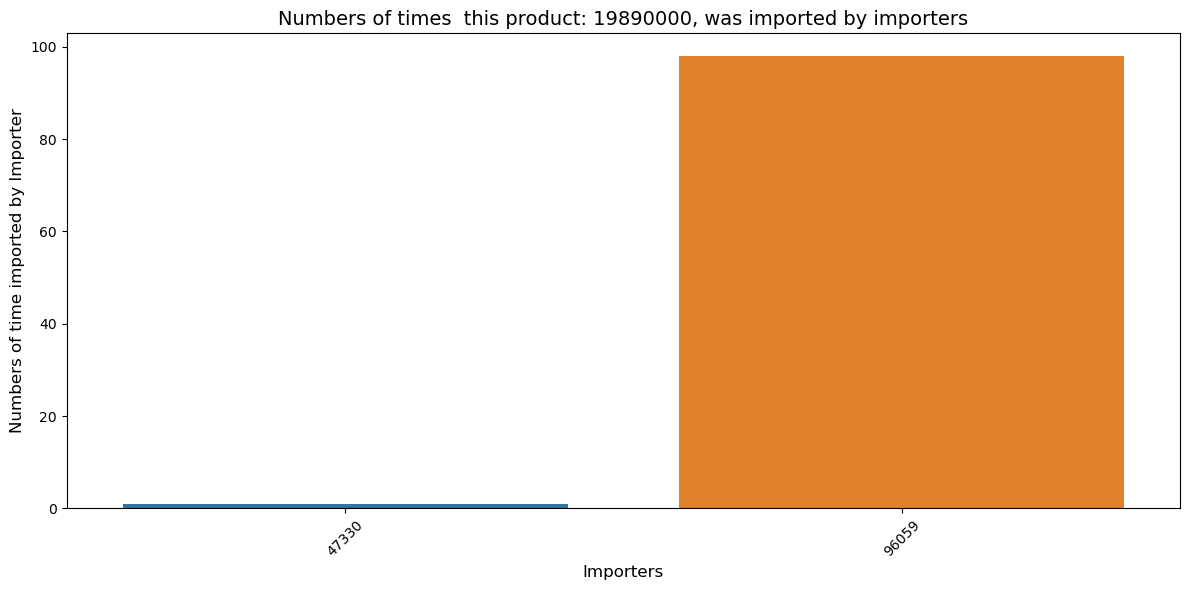

In [31]:
products = [7200000,28721000,44200000,2209099,17610000,28719000,29100000,17620000,2111000,19890000]

for product in products:

    pivot1e3 = dataset[(dataset['Country  of Supply']=='China')&(dataset['HS Code'] == product)].pivot_table(index='Importer',
                                values='Reg Number',
                                aggfunc='count').reset_index().sort_values(by='Reg Number',ascending=False)
    
    #pivot1e3
    
    plt.figure(figsize=(12, 6))
    sns.barplot(y=pivot1e3['Reg Number'][:20], x=pivot1e3['Importer'][:20])
    plt.xlabel("Importers", fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel("Numbers of time imported by Importer", fontsize=12)
    plt.title('Numbers of times  this product: '+ str(product)+ ', was imported by importers',fontsize=14)
    plt.tight_layout()

In [32]:
#What is the perd=centage of the taxes paided by these people on the general ground

a_list_customers =[35713,  2979, 69009, 87967, 96059, 45690, 50085, 61982,  3748,5768, 12268, 28738, 30645, 47968, 37193, 23971, 60087, 94060,63295, 44077]

In [33]:
pd.Series(a_list_customers).nunique()

20

In [34]:
pivot1e4 = dataset.pivot_table(index='Importer',
                            values='Total Tax(N)',
                            aggfunc='sum').reset_index().sort_values(by='Total Tax(N)',ascending=False)

pivot1e4.head(20)

taxes = []
for importer in a_list_customers:
    taxes.append(pivot1e4[pivot1e4['Importer']==importer]['Total Tax(N)'].values[0])

In [35]:
total_tax = pd.DataFrame({'Importer':a_list_customers,
             
             'Total Tax':taxes}).sort_values(by='Total Tax', ascending=False)
total_tax['Percentage in overall tax'] = (total_tax['Total Tax']/dataset['Total Tax(N)'].sum())*100

total_tax

Importer     Total Tax  Percentage in overall tax
2      69009  2.952211e+10                  11.690502
14     37193  2.464488e+10                   9.759158
4      96059  1.605282e+10                   6.356779
17     94060  1.112812e+10                   4.406639
19     44077  9.211461e+09                   3.647659
5      45690  4.681999e+09                   1.854031
11     28738  3.900627e+09                   1.544615
3      87967  2.995972e+09                   1.186379
12     30645  2.560389e+09                   1.013892
18     63295  2.489003e+09                   0.985624
9       5768  2.149404e+09                   0.851146
0      35713  2.044464e+09                   0.809590
8       3748  1.493679e+09                   0.591484
6      50085  1.374917e+09                   0.544455
10     12268  1.147336e+09                   0.454335
16     60087  8.626433e+08                   0.341599
7      61982  7.568224e+08                   0.299695
1       2979  7.118392e+08                   0.281882
13     47968  6.204348e+08                   0.245687
15     23971  1.746332e+08                   0.069153

In [36]:
#Average container per importers
pivot1e5 = dataset.pivot_table(index='Importer',
                            values='Nbr Of Containers',
                            aggfunc='sum').reset_index().sort_values(by='Nbr Of Containers',ascending=False)

pivot1e5['Percentage'] = (pivot1e5['Nbr Of Containers']/pivot1e5['Nbr Of Containers'].sum())*100

In [37]:
pivot1e5.head(20)

Importer  Nbr Of Containers  Percentage
6850      59991            3248517   95.302214
6978      61090              24275    0.712159
7843      69009               6841    0.200695
1339      11327               5715    0.167662
10687     96059               5137    0.150705
4259      37193               4190    0.122923
10459     94060               3664    0.107491
880        7013               3606    0.105790
3280      28895               2765    0.081117
5136      45690               2244    0.065833
4058      35437               2171    0.063691
9560      85263               1945    0.057061
5322      47329               1832    0.053746
6285      55285               1636    0.047996
8126      72101               1578    0.046294
7216      62948               1570    0.046059
2998      26683               1467    0.043038
4955      44077               1407    0.041277
6526      57374               1265    0.037111
2303      20179                983    0.028838

#### Q3 -- Trend and Seasonality of each Ports by Transactions, Taxes

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\978253981.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot3.index, y=pivot3['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


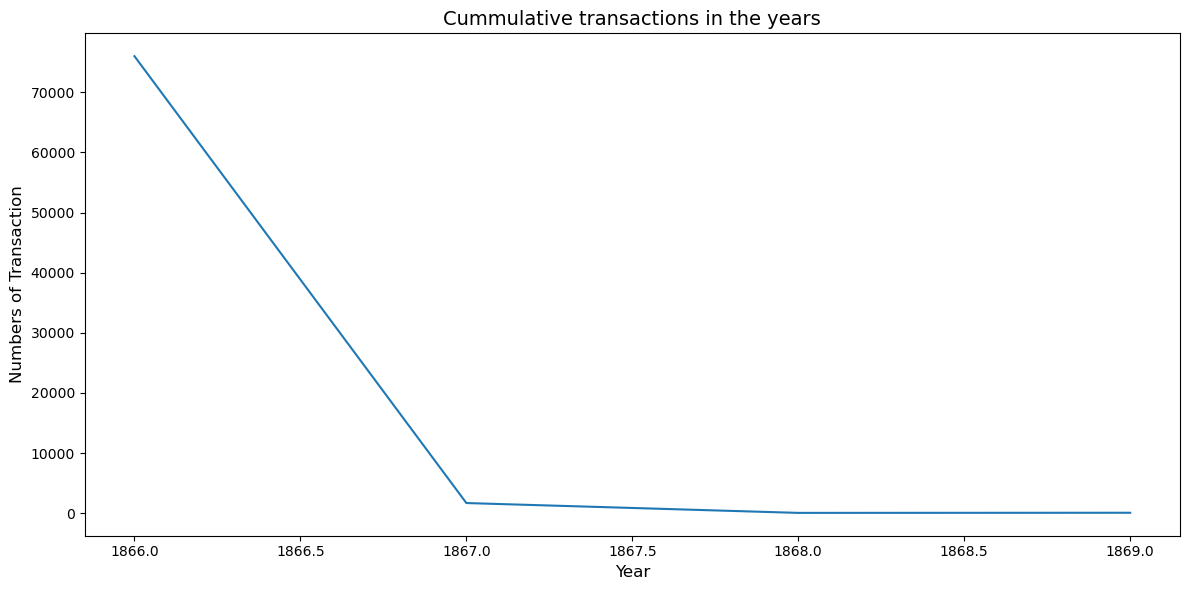

In [38]:
# Numbers of Transactions all the year

pivot3 = pd.pivot_table(dataset, 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.year,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot3.index, y=pivot3['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the years', fontsize=14)
plt.tight_layout()

In [39]:
pivot3

Reg Number
Receipt Date            
1866               76016
1867                1675
1869                  60
1868                  38

In [40]:
# PLot by CUstome Office over the years


C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\2381882657.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot3a.index, y=pivot3a['Total Tax(N)'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


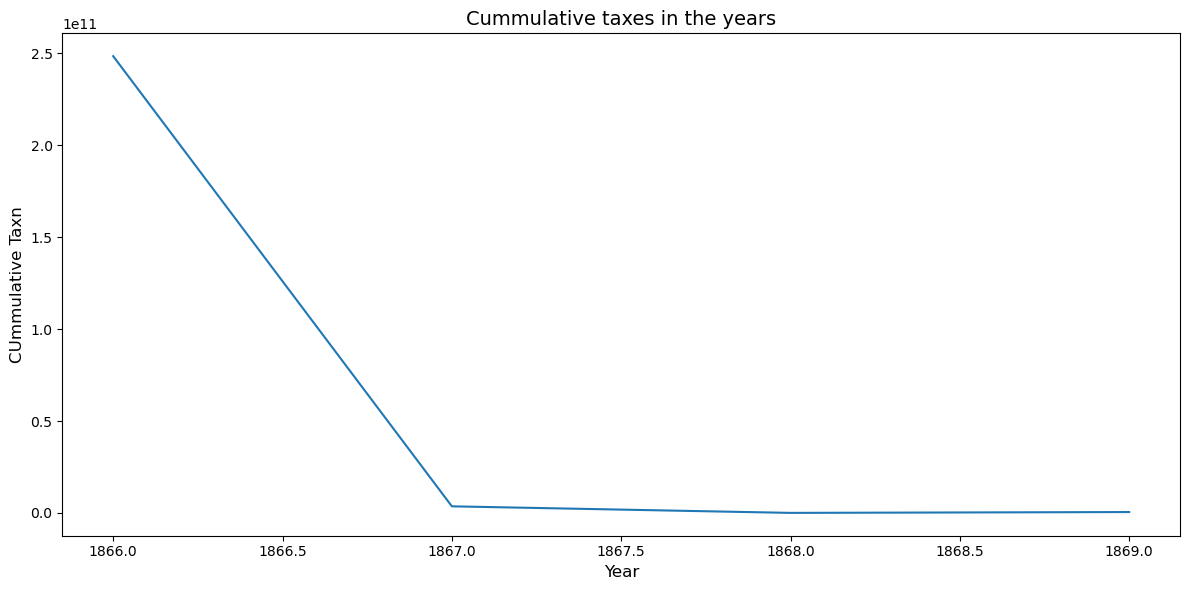

In [41]:
# Numbers of Transactions all the year

pivot3a = pd.pivot_table(dataset, 
                       values='Total Tax(N)', 
                       index=dataset['Receipt Date'].dt.year,
                       aggfunc='sum').sort_values(by='Total Tax(N)',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot3a.index, y=pivot3a['Total Tax(N)'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("CUmmulative Taxn", fontsize=12)
plt.title('Cummulative taxes in the years', fontsize=14)
plt.tight_layout()

In [42]:
pivot3a

Total Tax(N)
Receipt Date              
1866          2.483375e+11
1867          3.622098e+09
1869          5.147731e+08
1868          5.634477e+07

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\1747537758.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset,
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


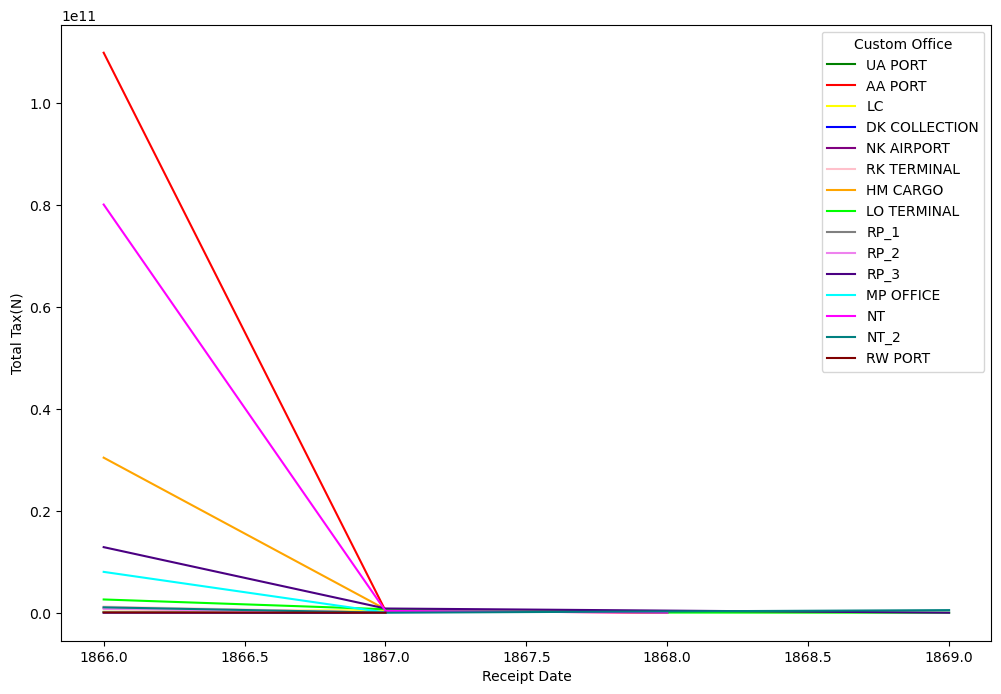

In [43]:
color = ['green','red','yellow','blue','purple','pink','orange','lime','gray','violet','indigo','cyan','magenta','teal','maroon']
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset,
                x=dataset['Receipt Date'].dt.year,
                y='Total Tax(N)',
             hue='Custom Office',
             palette=color,
             estimator='sum',
             ci=None
               )
plt.show()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\4059936645.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1866],
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


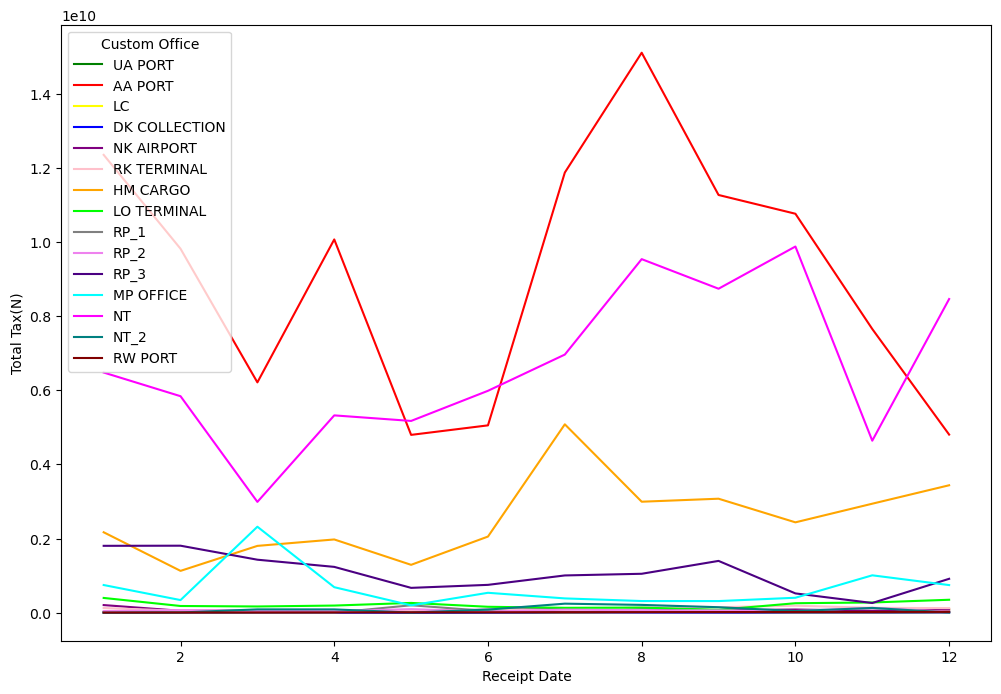

In [44]:
color = ['green','red','yellow','blue','purple','pink','orange','lime','gray','violet','indigo','cyan','magenta','teal','maroon']
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1866],
                x=dataset['Receipt Date'].dt.month,
                y='Total Tax(N)',
             hue='Custom Office',
             palette=color,
             estimator='sum',
             ci=None
               )
plt.show()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3405494532.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1867],
C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3405494532.py:3: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1867],
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  wit

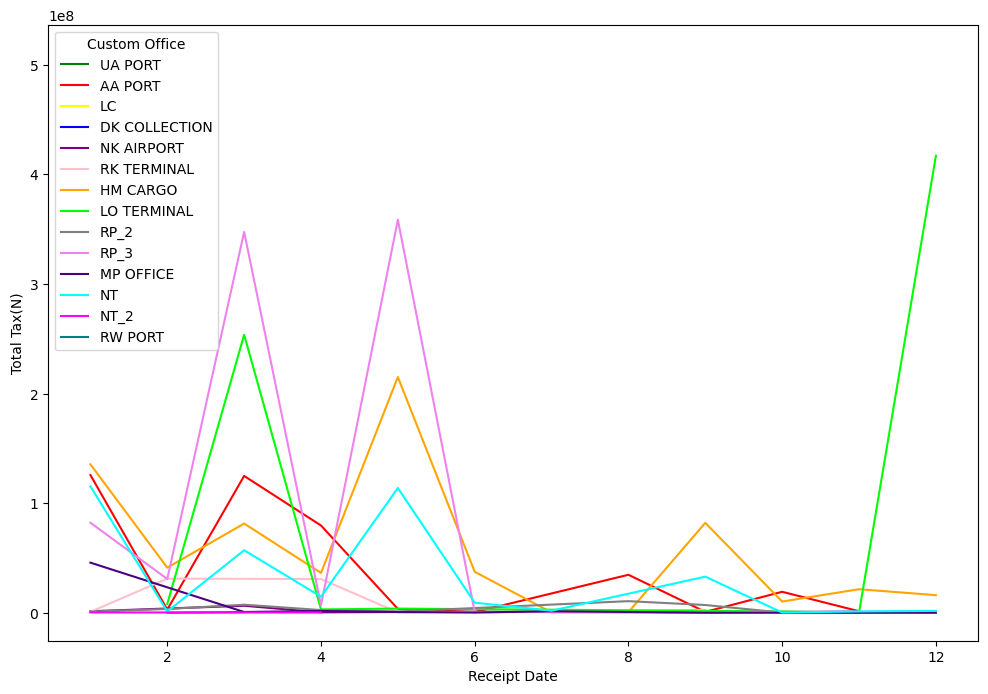

In [45]:
color = ['green','red','yellow','blue','purple','pink','orange','lime','gray','violet','indigo','cyan','magenta','teal','maroon']
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1867],
                x=dataset['Receipt Date'].dt.month,
                y='Total Tax(N)',
             hue='Custom Office',
             palette=color,
             estimator='sum',
             ci=None
               )
plt.show()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3201231631.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1868],
C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3201231631.py:3: UserWarning: The palette list has more values (15) than needed (4), which may not be intended.
  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1868],
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

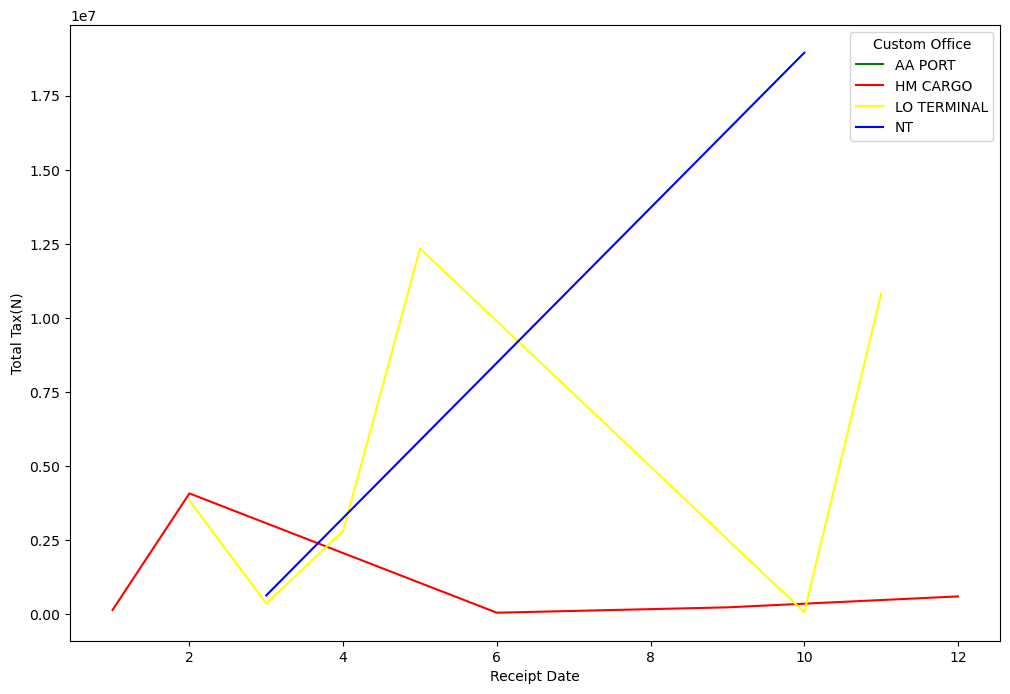

In [46]:
color = ['green','red','yellow','blue','purple','pink','orange','lime','gray','violet','indigo','cyan','magenta','teal','maroon']
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1868],
                x=dataset['Receipt Date'].dt.month,
                y='Total Tax(N)',
             hue='Custom Office',
             palette=color,
             estimator='sum',
             ci=None
               )
plt.show()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3457182665.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1869],
C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3457182665.py:3: UserWarning: The palette list has more values (15) than needed (3), which may not be intended.
  sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1869],
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

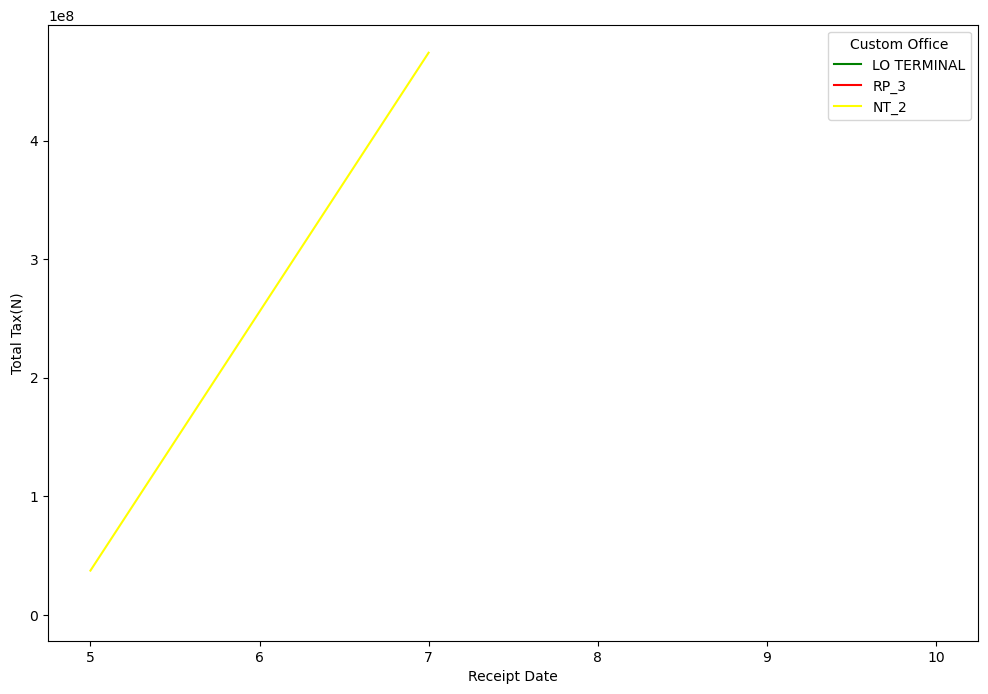

In [47]:
color = ['green','red','yellow','blue','purple','pink','orange','lime','gray','violet','indigo','cyan','magenta','teal','maroon']
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset[dataset['Receipt Date'].dt.year==1869],
                x=dataset['Receipt Date'].dt.month,
                y='Total Tax(N)',
             hue='Custom Office',
             palette=color,
             estimator='sum',
             ci=None
               )
plt.show()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\536990377.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot3b.index, y=pivot3b['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


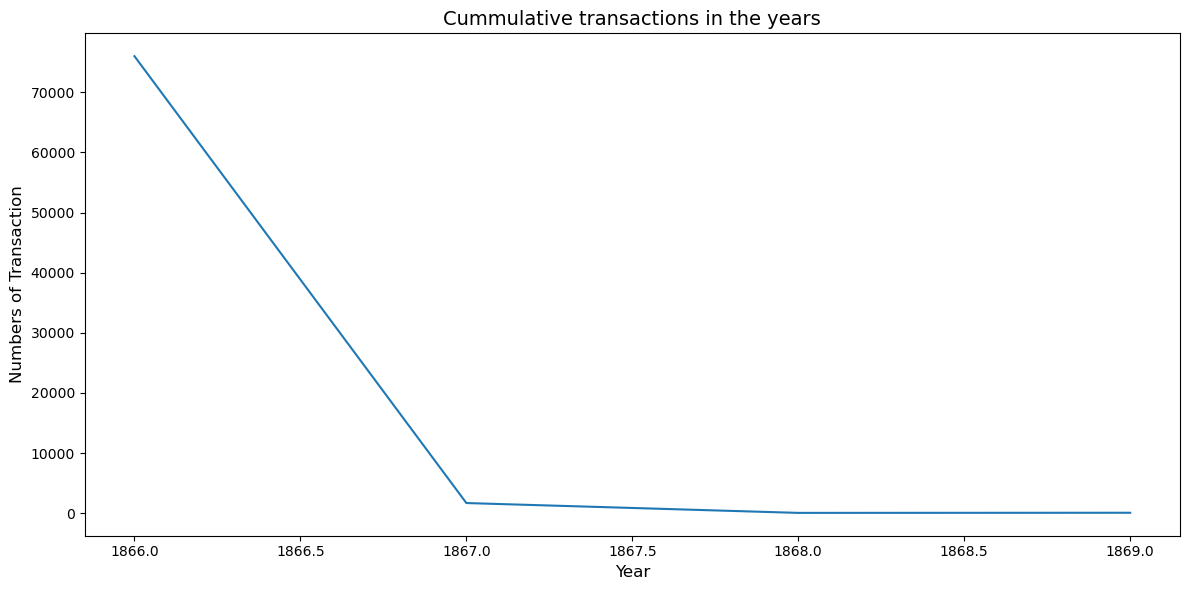

In [48]:
# Numbers of Transactions all the year

pivot3b = pd.pivot_table(dataset, 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.year,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot3b.index, y=pivot3b['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the years', fontsize=14)
plt.tight_layout()

In [49]:
dataset['Custom Office'].unique()

array(['UA PORT', 'AA PORT', 'LC', 'DK COLLECTION', 'NK AIRPORT',
       'RK TERMINAL', 'HM CARGO', 'LO TERMINAL', 'RP_1', 'RP_2', 'RP_3',
       'MP OFFICE', 'NT', 'NT_2', 'RW PORT'], dtype=object)

C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

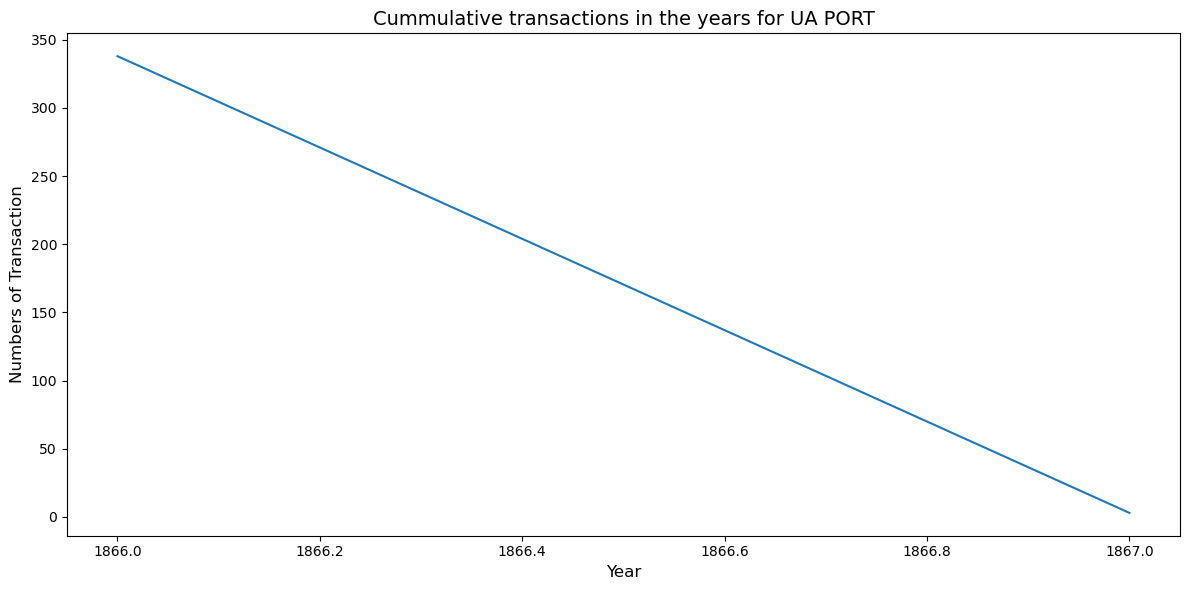

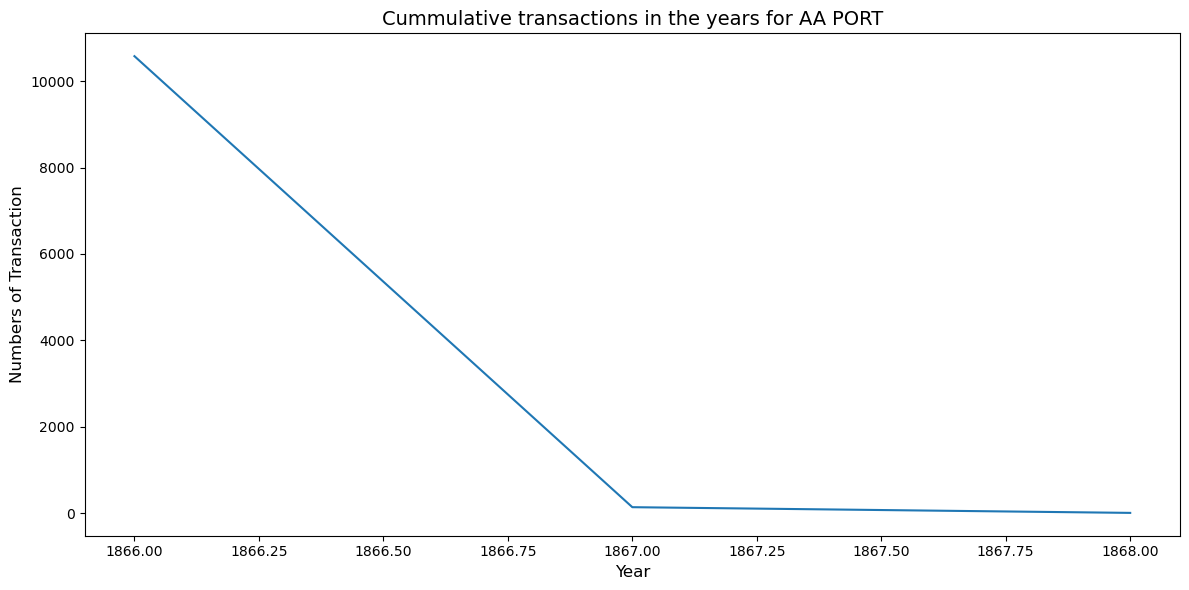

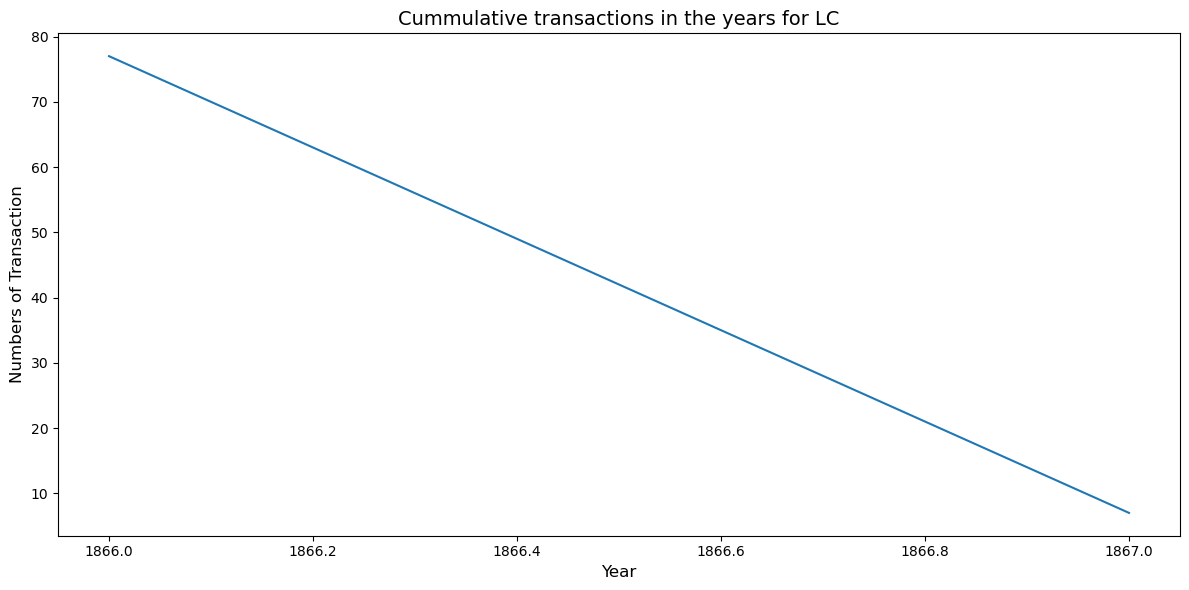

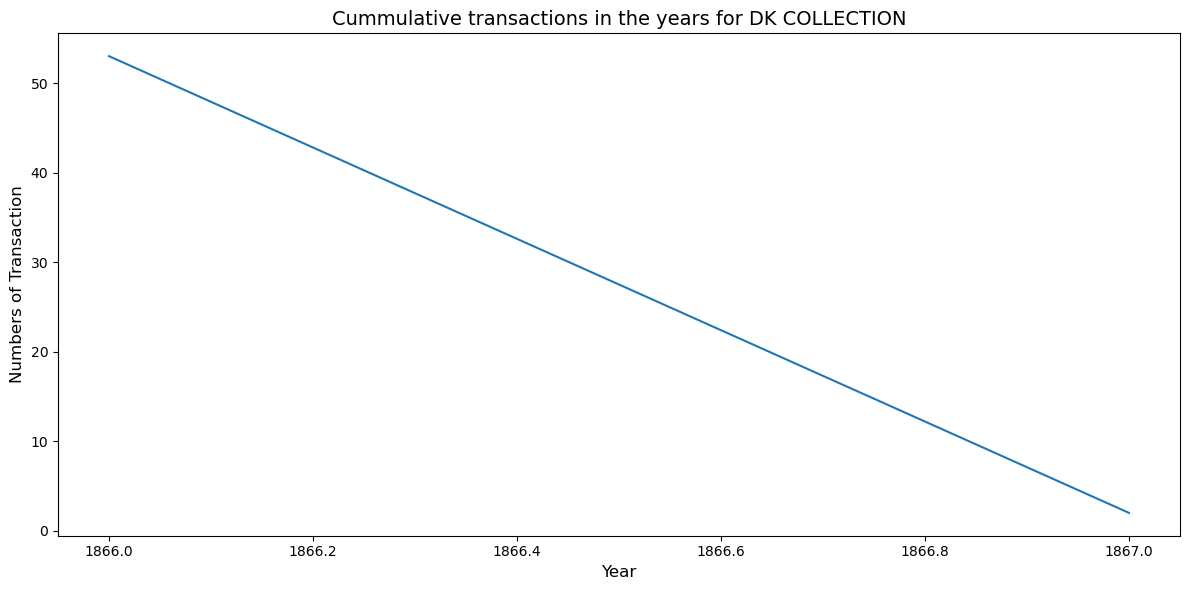

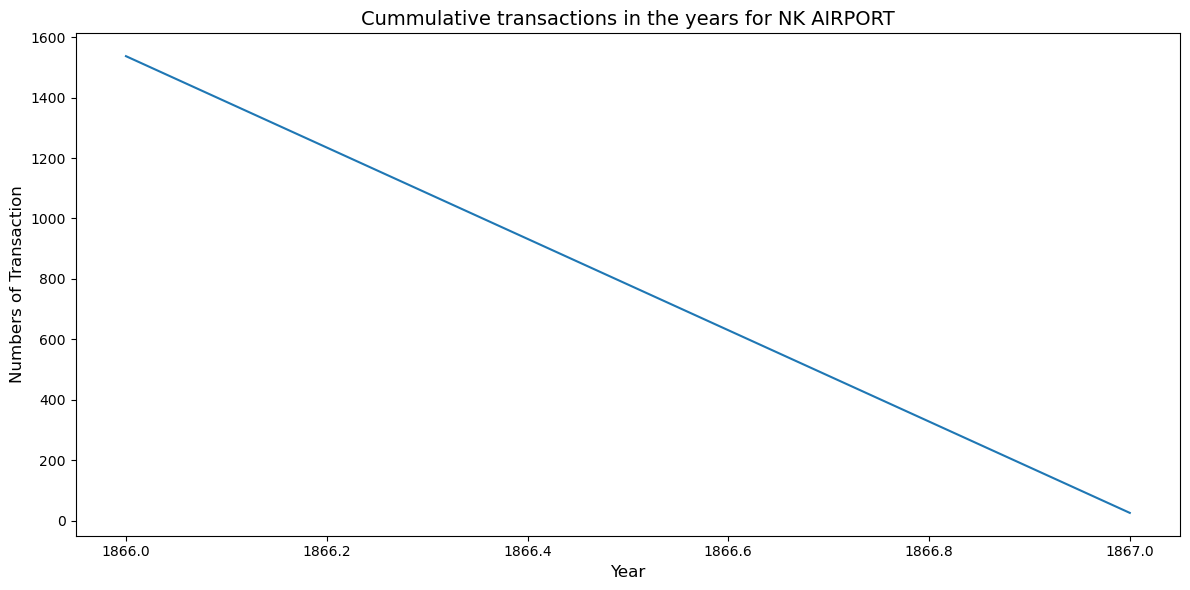

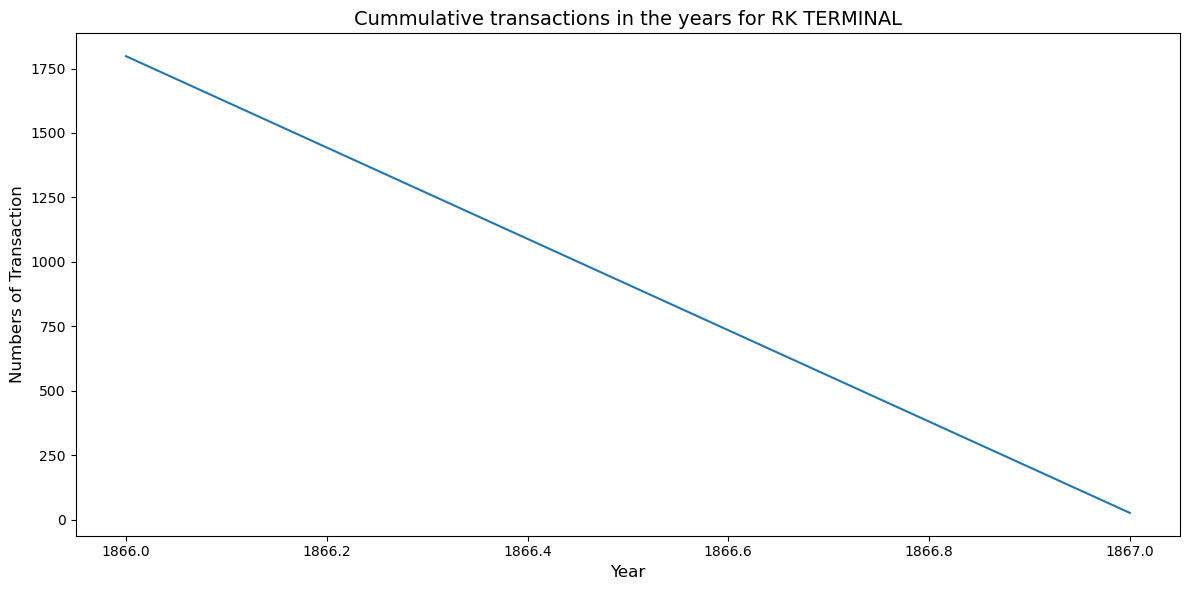

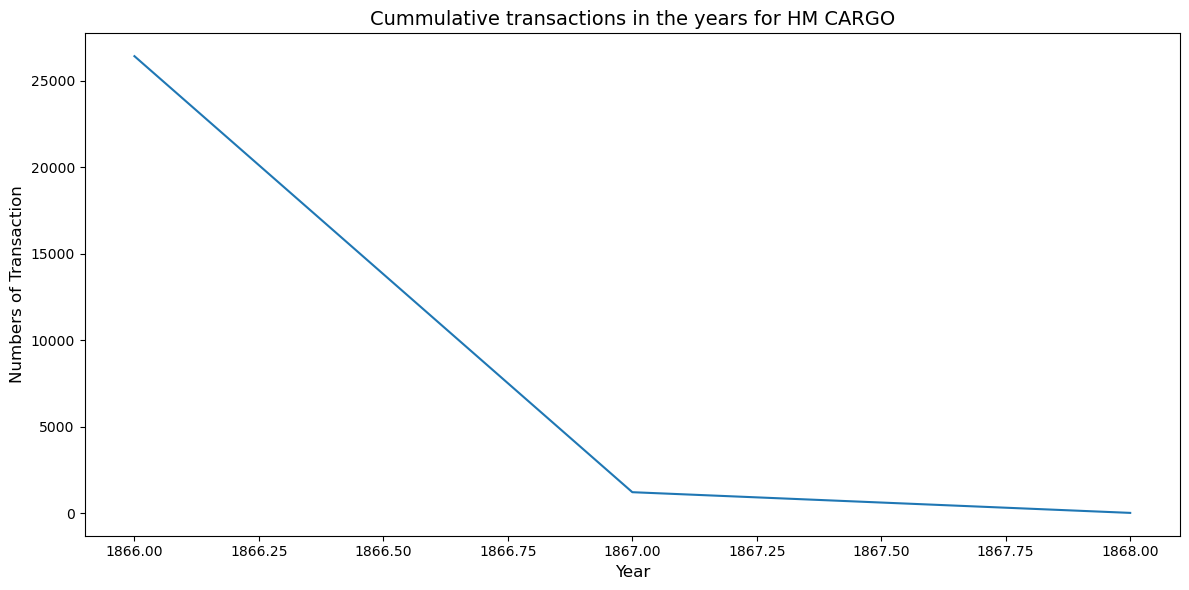

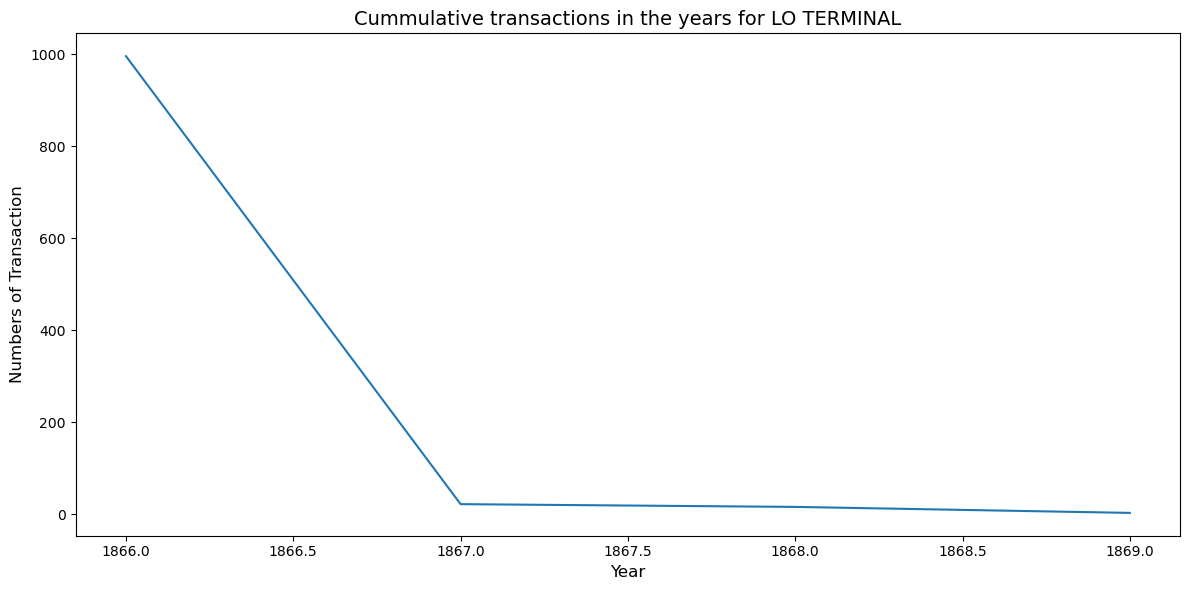

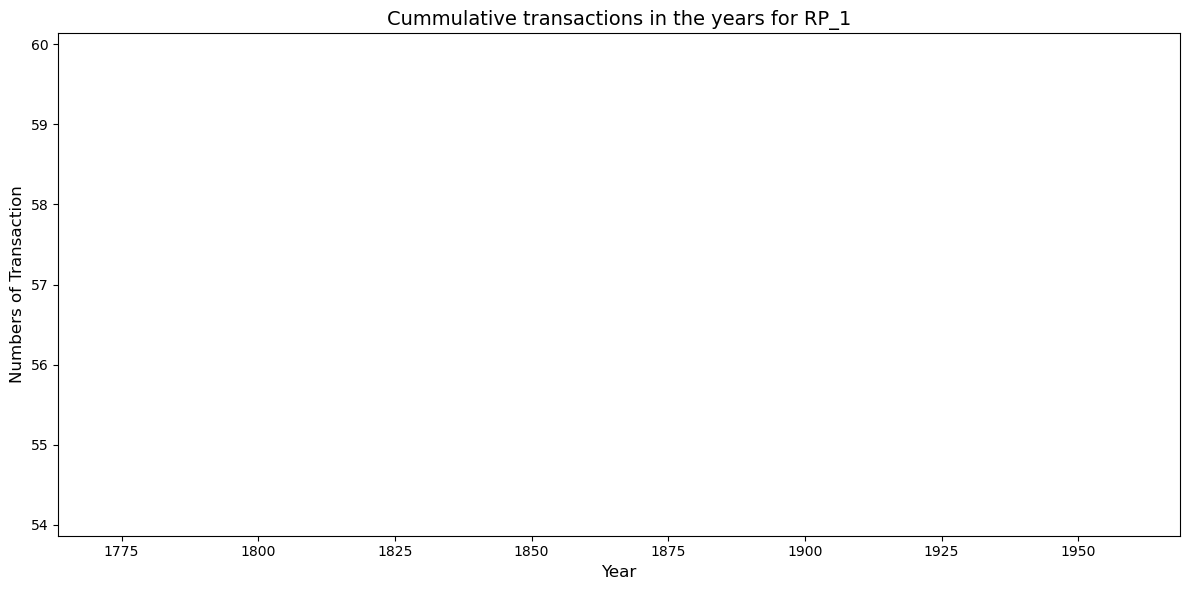

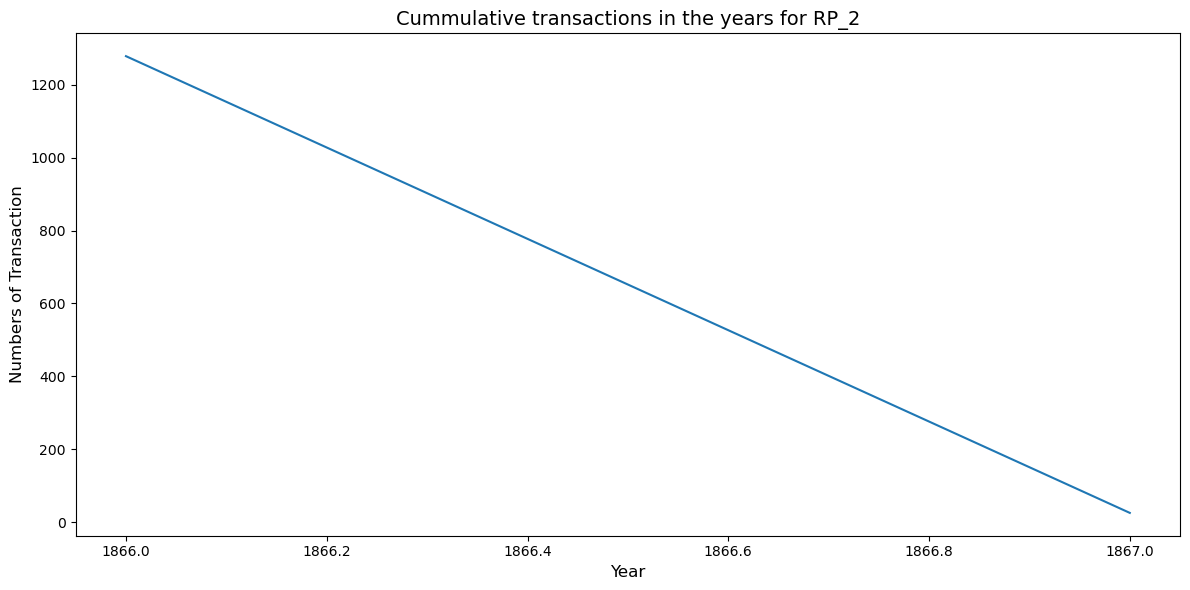

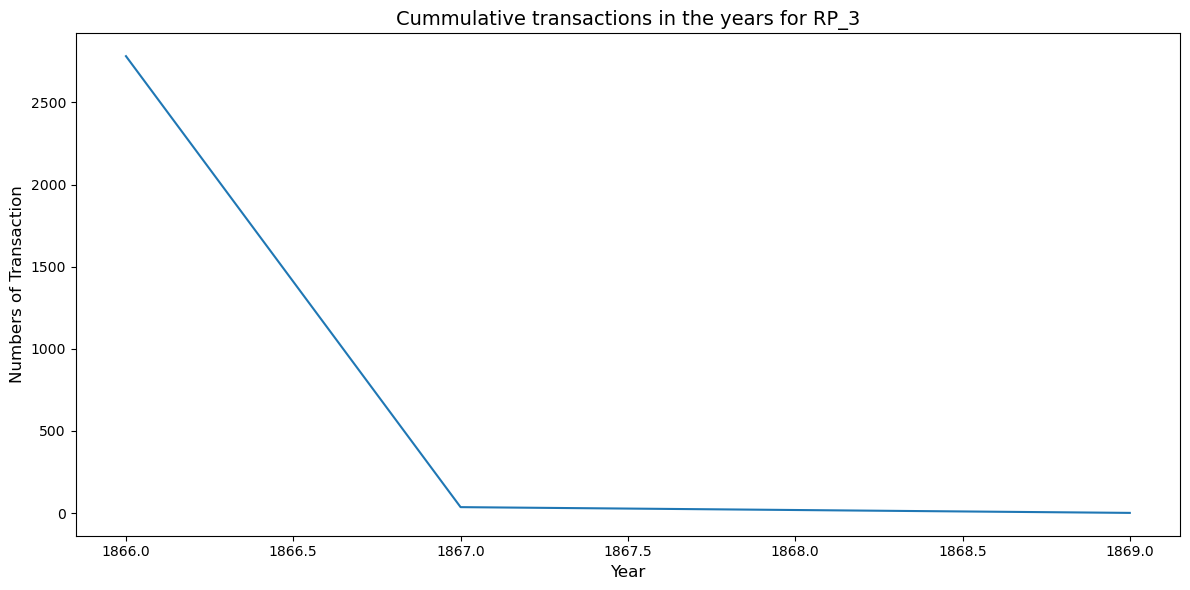

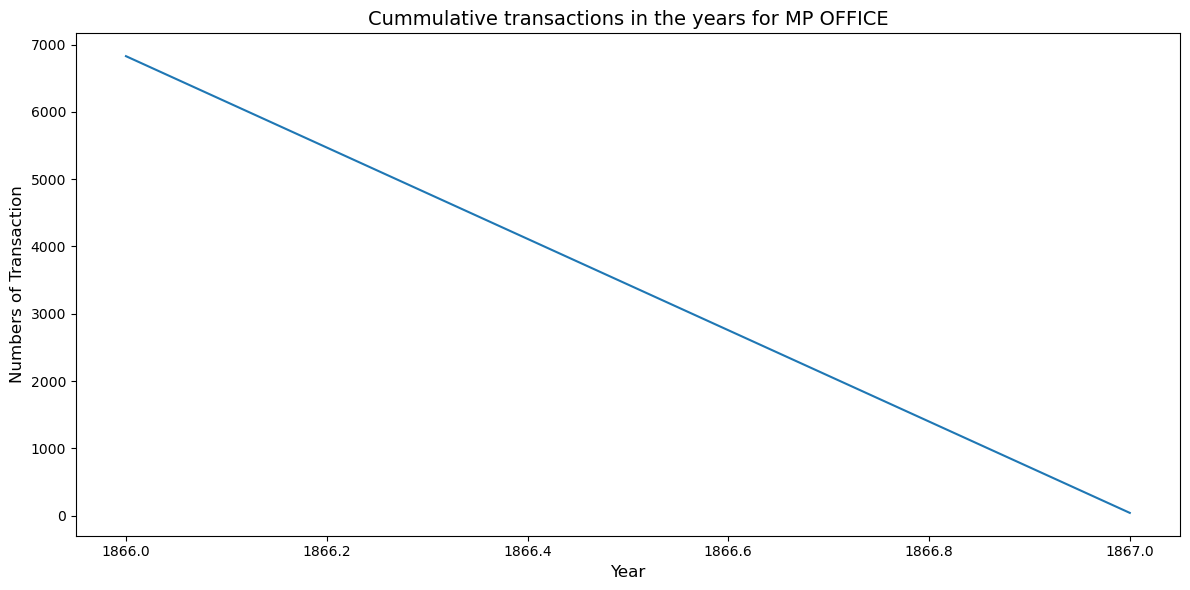

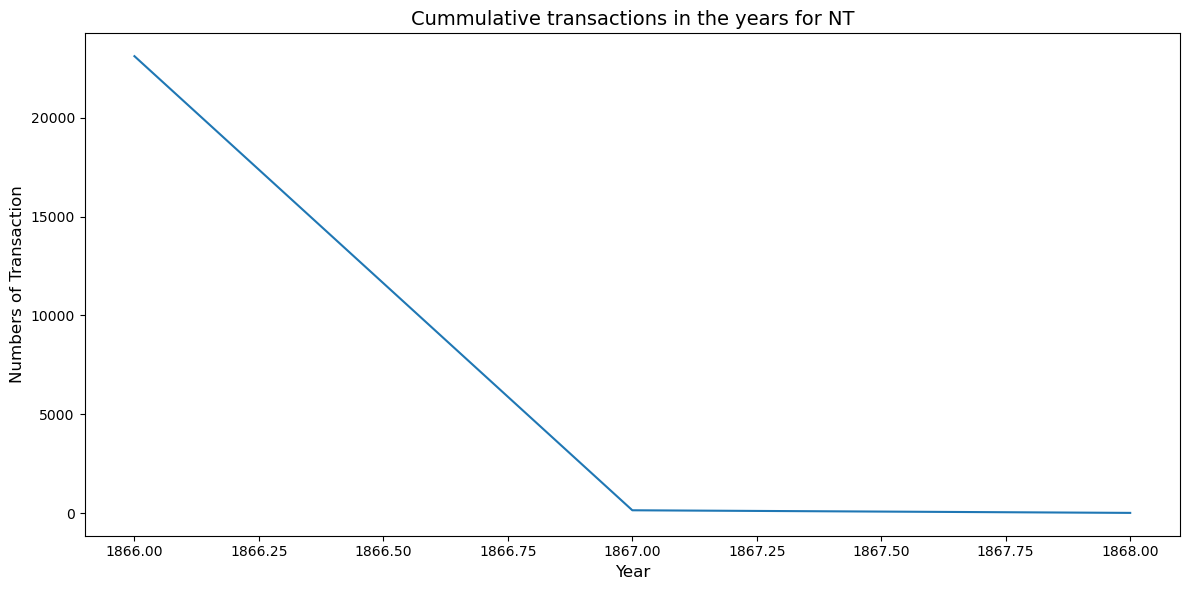

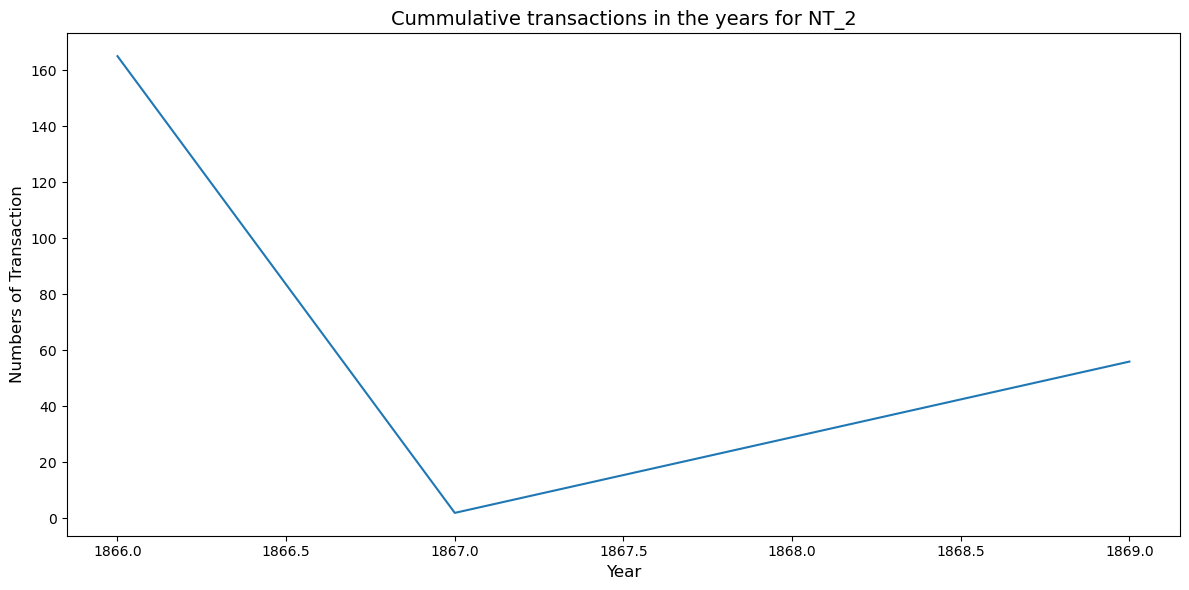

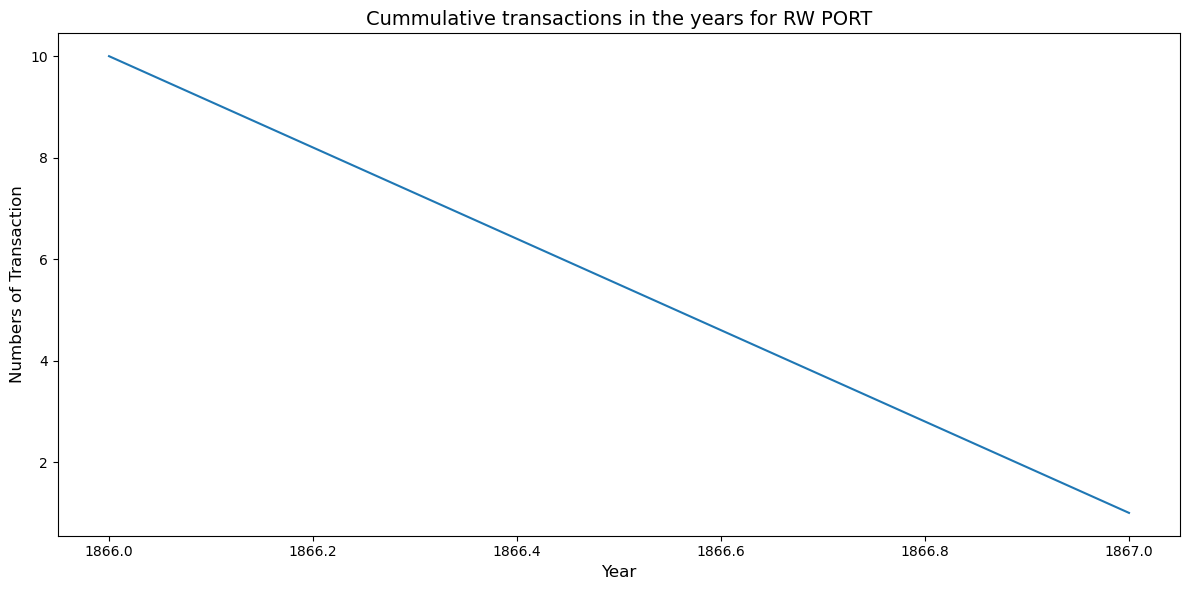

In [50]:
# Numbers of Transactions all the year
ports = ['UA PORT', 'AA PORT', 'LC', 'DK COLLECTION', 'NK AIRPORT','RK TERMINAL', 'HM CARGO', 'LO TERMINAL', 'RP_1', 'RP_2', 'RP_3','MP OFFICE', 'NT', 'NT_2', 'RW PORT']

for port in ports:
    
    pivot3c = pd.pivot_table(dataset[dataset['Custom Office']==port], 
                           values='Reg Number', 
                           index=dataset['Receipt Date'].dt.year,
                           aggfunc='count').sort_values(by='Reg Number',ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=pivot3c.index, y=pivot3c['Reg Number'])
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Numbers of Transaction", fontsize=12)
    plt.title('Cummulative transactions in the years for '+ port, fontsize=14)
    plt.tight_layout()

In [51]:
dataset.select_dtypes(exclude=['object']).corr()['Total Tax(N)']

FOB Value (N)        0.714473
CIF Value (N)        0.721517
Total Tax(N)         1.000000
Receipt Date         0.011687
Mass(KG)             0.166087
Nbr Of Containers   -0.000651
CIF - FOB            0.644979
(CIF - FOB)/FOB     -0.021140
FOB/KG               0.105457
CIF/KG               0.105417
Tax/CIF              0.035242
Tax/FOB              0.000813
Tax/KG               0.122466
Name: Total Tax(N), dtype: float64

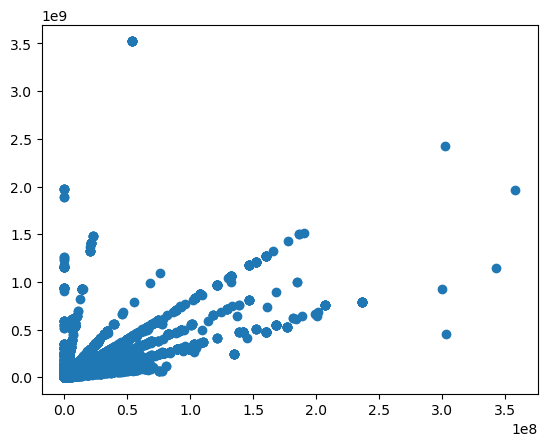

In [52]:
plt.scatter(dataset['Total Tax(N)'],dataset['FOB Value (N)'])

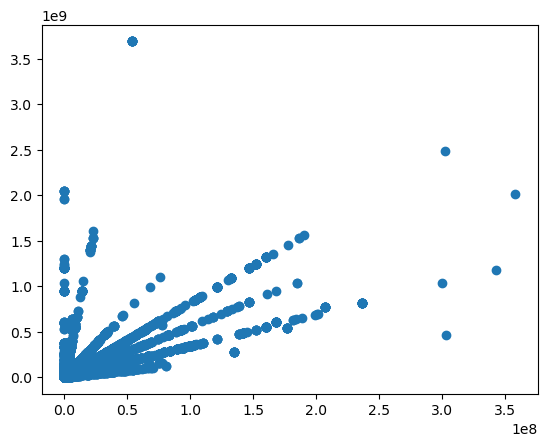

In [53]:
plt.scatter(dataset['Total Tax(N)'],dataset['CIF Value (N)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x290baa0b910>,
 'caps': [<matplotlib.lines.Line2D at 0x290baa0a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x290baa08b90>,
 'medians': [<matplotlib.lines.Line2D at 0x290b9affdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x290ba99b450>,
 'means': []}

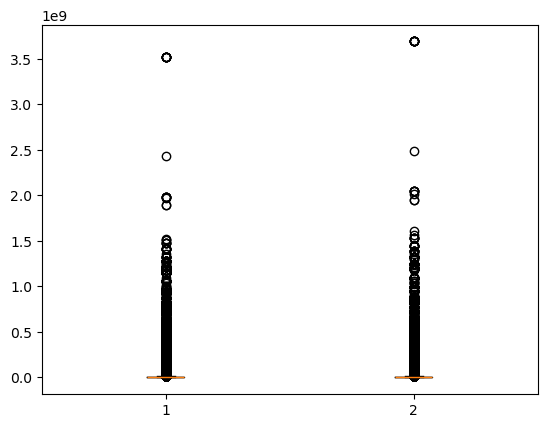

In [54]:
# CHeck for outlier values in order to determine to use mean or median for aggregate
plt.boxplot([dataset['FOB Value (N)'],dataset['CIF Value (N)']])

In [55]:
pivot3d = pd.pivot_table(dataset, 
                       values=['FOB Value (N)','CIF Value (N)'], 
                       index='Country  of Supply',
                       aggfunc='median').sort_values(by='CIF Value (N)',ascending=False)

pivot3d.head(20)

CIF Value (N)  FOB Value (N)
Country  of Supply                                       
Romania                        179341468.0    166534144.0
Thailand                       147308744.0    143566335.0
Lebanon                         91072927.0     80111410.0
Estonia                         57492299.5     55096702.5
British Virgin Islands          41002364.0     35967269.0
Costa Rica                      27796444.0     26846811.0
Bulgaria                        25642377.5     24448765.5
Jordan                          15994275.0     14397295.0
Andorra                          8770250.0      7443600.0
India                            7773497.5      7206310.0
Aruba                            7092812.0      4138600.0
China                            5486278.0      4534960.5
Turkey                           5445301.0      4488664.5
Sweden                           5242472.0      4859360.0
United Republic of Tanzania      4815492.0      3990850.0
Ecuador                          4369325.0      3673989.0
Viet Nam                         4306050.0      2578350.0
Slovakia                         4061376.0      3295440.0
Madagascar                       3625305.0      3261287.5
Czech Republic                   3509128.0      2488875.0

In [56]:
pivot3d[pivot3d.index=='China']

CIF Value (N)  FOB Value (N)
Country  of Supply                              
China                   5486278.0      4534960.5

#### Q4 -- Data Gap

In [57]:
missing_data = pd.DataFrame({'Receipt Number':dataset['Receipt Number'].value_counts(normalize=True)[dataset['Receipt Number'].value_counts(normalize=True).index=='Unknown receipt number'][0],
                               'Country  of Supply':dataset['Country  of Supply'].value_counts(normalize=True)[dataset['Country  of Supply'].value_counts(normalize=True).index=='No Country'][0],
                             'Container Nbr':dataset['Container Nbr'].value_counts(normalize=True)[dataset['Container Nbr'].value_counts(normalize=True).index=='Unknown container number'][0],
                             'Container Size':dataset['Container Size'].value_counts(normalize=True)[dataset['Container Size'].value_counts(normalize=True).index=='Unknown container size'][0]
},index=['1'])
missing_data

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\4261169315.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  missing_data = pd.DataFrame({'Receipt Number':dataset['Receipt Number'].value_counts(normalize=True)[dataset['Receipt Number'].value_counts(normalize=True).index=='Unknown receipt number'][0],
C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\4261169315.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'Country  of Supply':dataset['Country  of Supply'].value_counts(normalize=True)[dataset['Country  of Supply'].value_counts(normalize=True).index=='No Country'][0],
C:\Users\OLAD

Receipt Number  Country  of Supply  Container Nbr  Container Size
1         0.01666             0.01238       0.415907        0.415907

([0, 1, 2, 3],
 [Text(0, 0, 'Receipt Number'),
  Text(1, 0, 'Country  of Supply'),
  Text(2, 0, 'Container Nbr'),
  Text(3, 0, 'Container Size')])

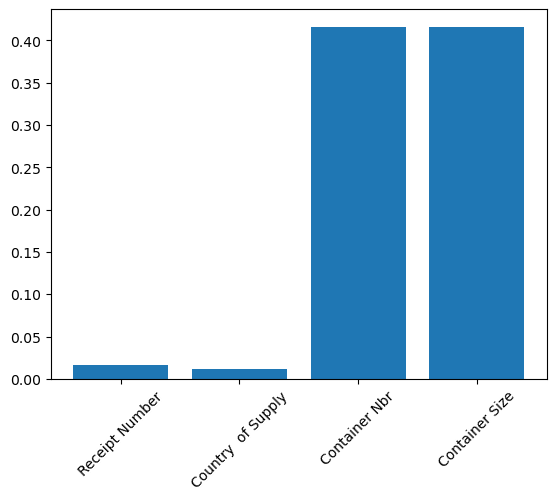

In [58]:
plt.bar(list(missing_data.columns), list(missing_data.iloc[0].values))
plt.xticks(rotation=45)

In [59]:
#What port has missing values


In [60]:
pivot4 = pd.pivot_table(dataset[dataset['Container Nbr']=='Unknown container number'], 
                       values='Reg Number', 
                       index=dataset['Country  of Supply'],
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

pivot4

Reg Number
Country  of Supply            
Netherlands               5032
United States             3477
China                     3144
United Kingdom            2772
Germany                   2510
...                        ...
Senegal                      1
Niger                        1
Pakistan                     1
Panama                       1
Albania                      1

[119 rows x 1 columns]

In [61]:
pivot4.head(20)

Reg Number
Country  of Supply                  
Netherlands                     5032
United States                   3477
China                           3144
United Kingdom                  2772
Germany                         2510
Hong Kong                       2402
United Arab Emirates            2359
Republic of South Africa        1309
Belgium                         1304
France                          1247
Italy                            819
Sweden                           663
Spain                            648
India                            491
Singapore                        315
Hungary                          285
Switzerland                      263
Korea, Republic of               236
Norway                           215
Israel                           187

#### Q5 -- A-list Country of supply

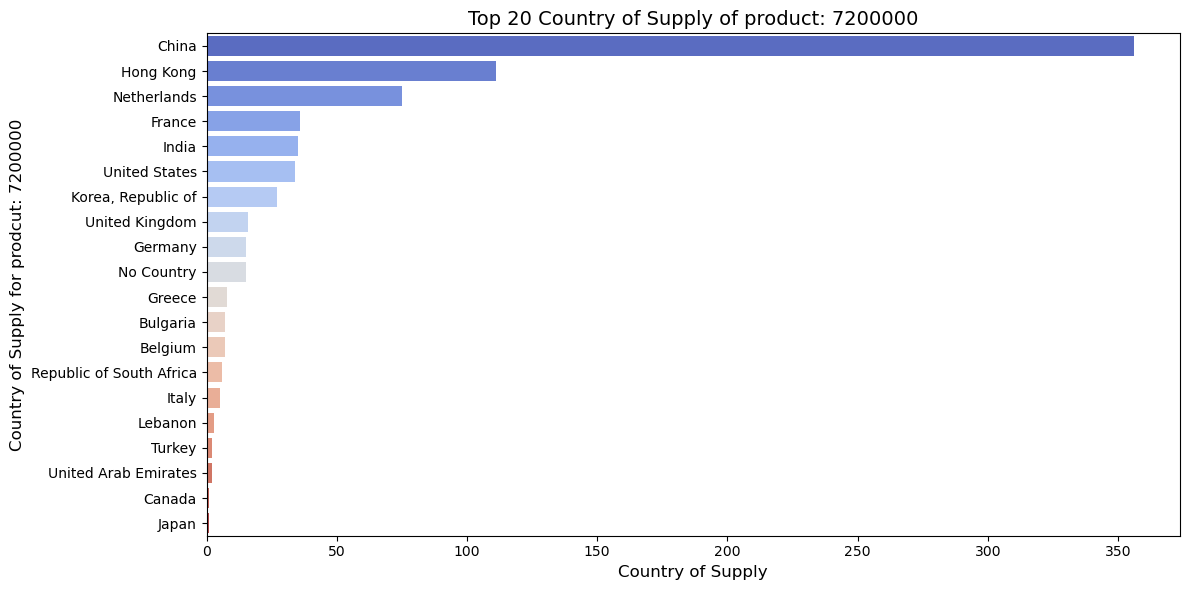

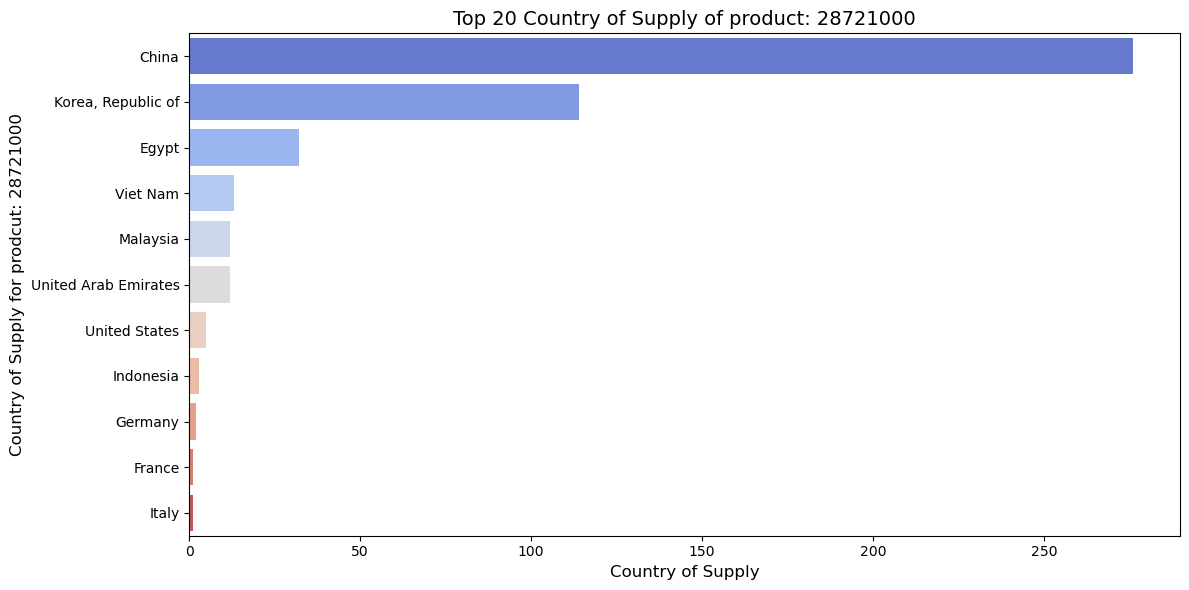

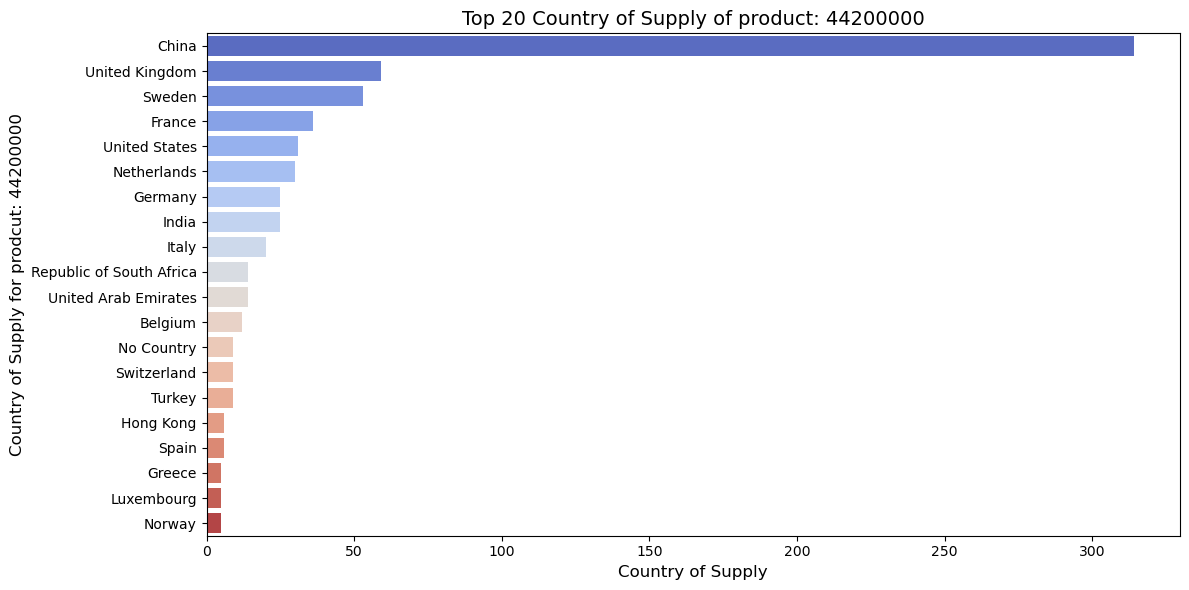

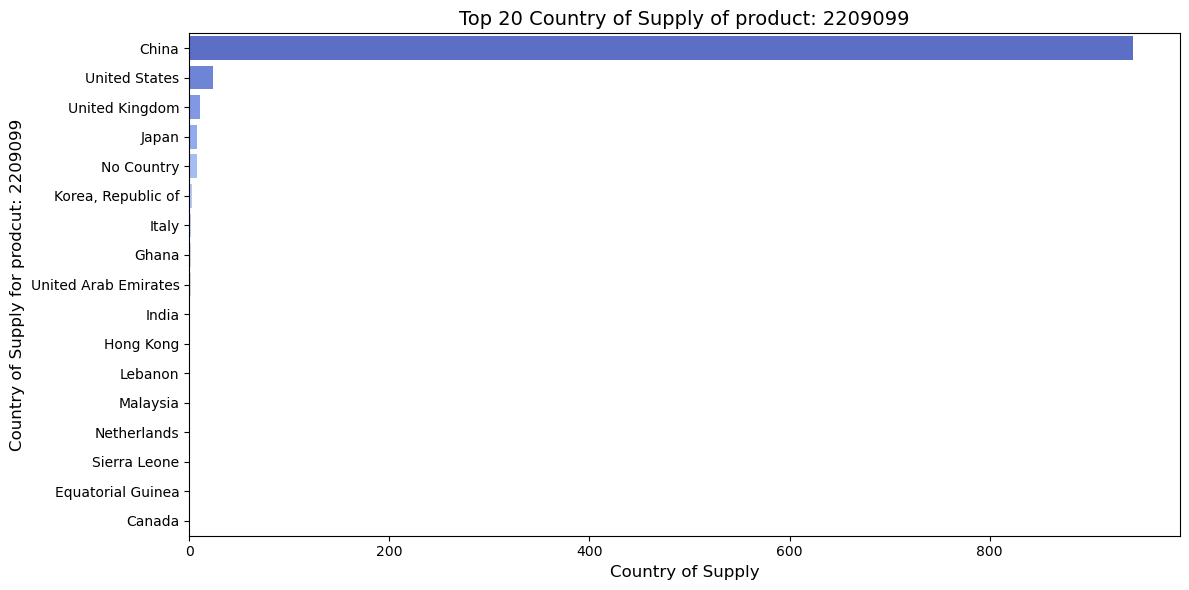

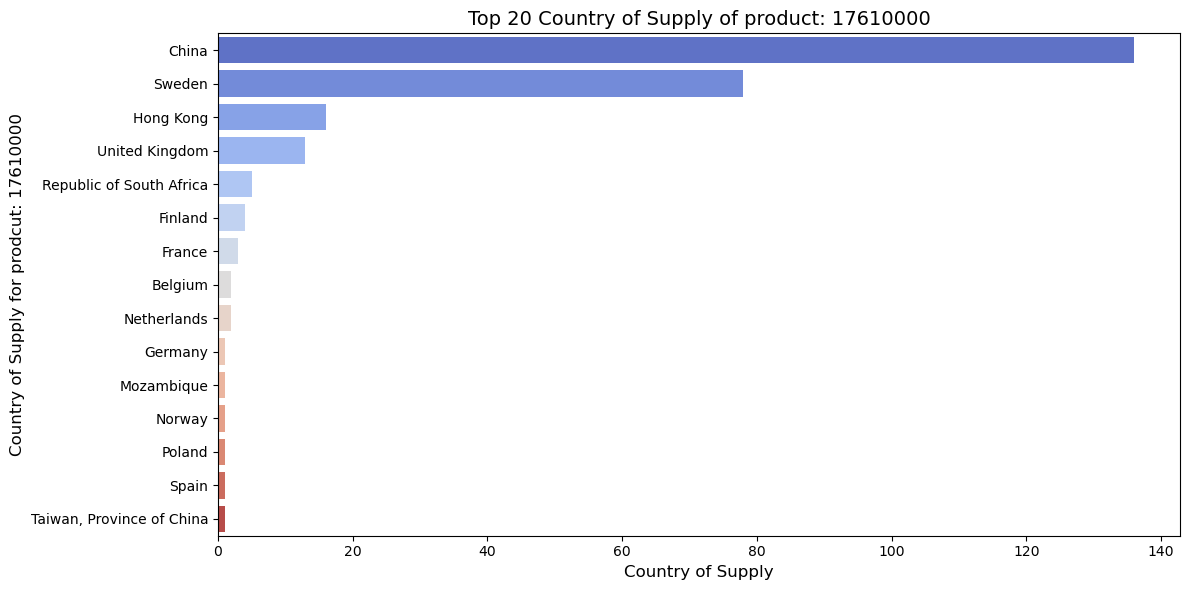

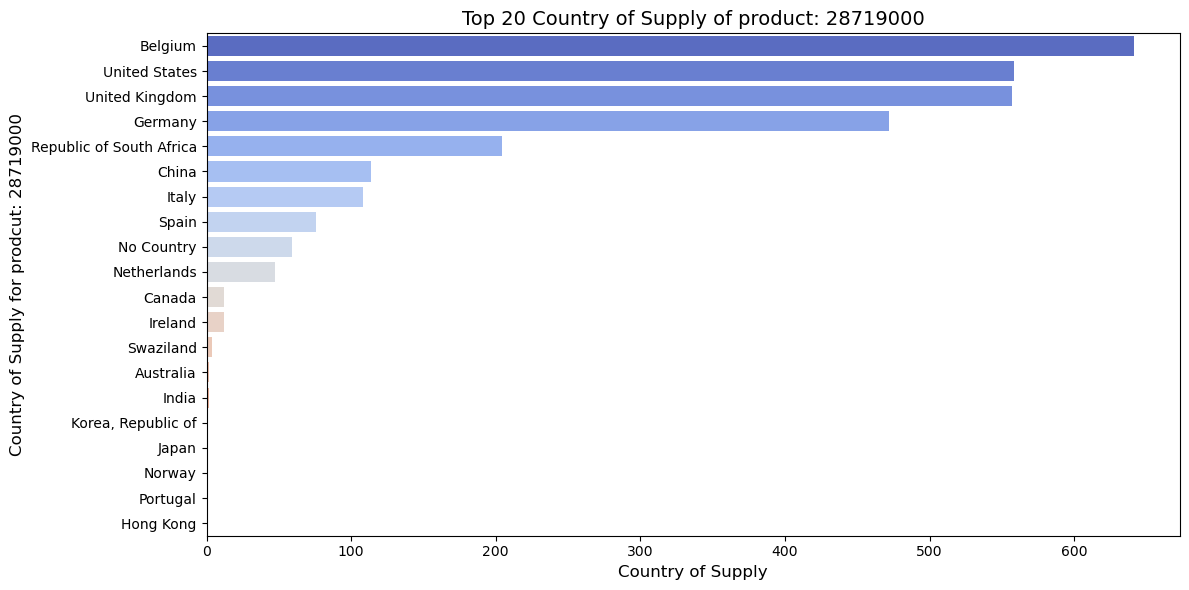

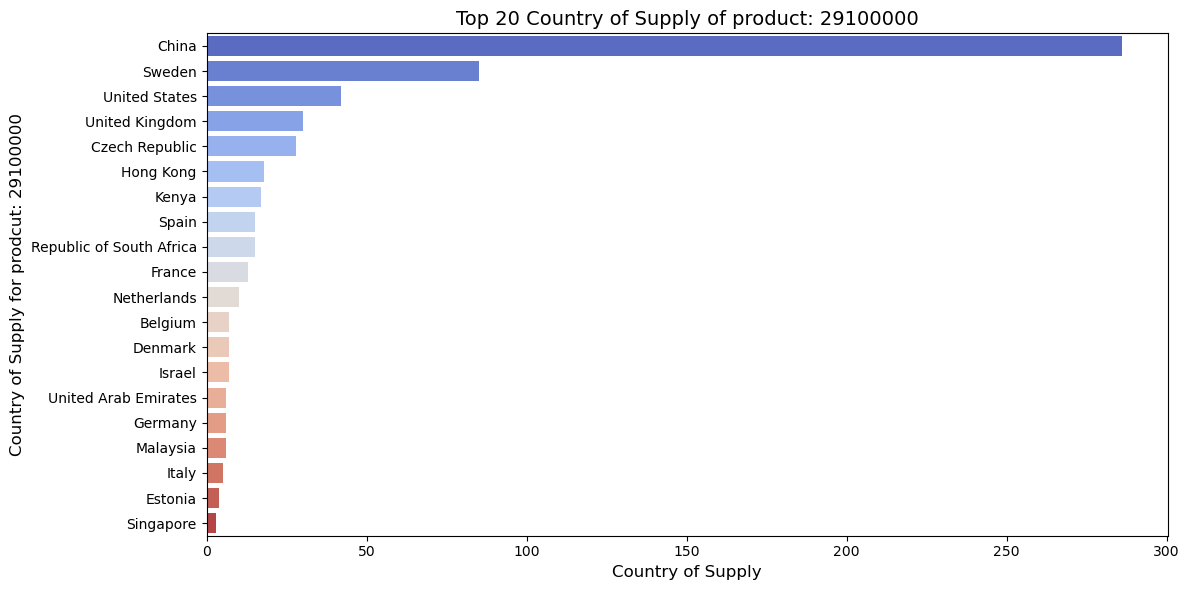

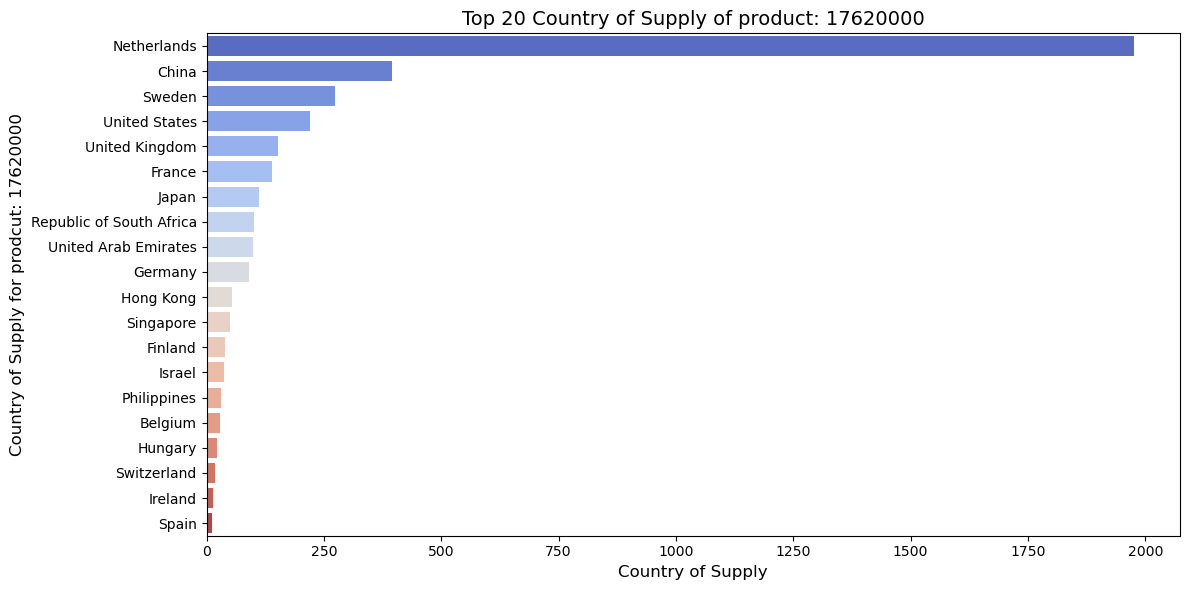

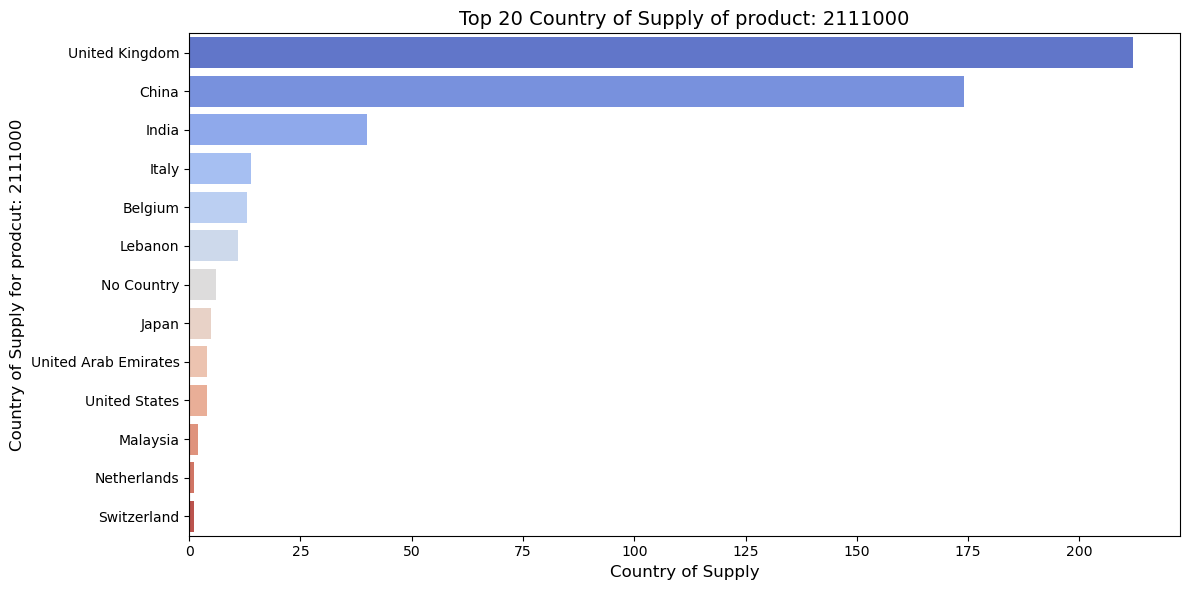

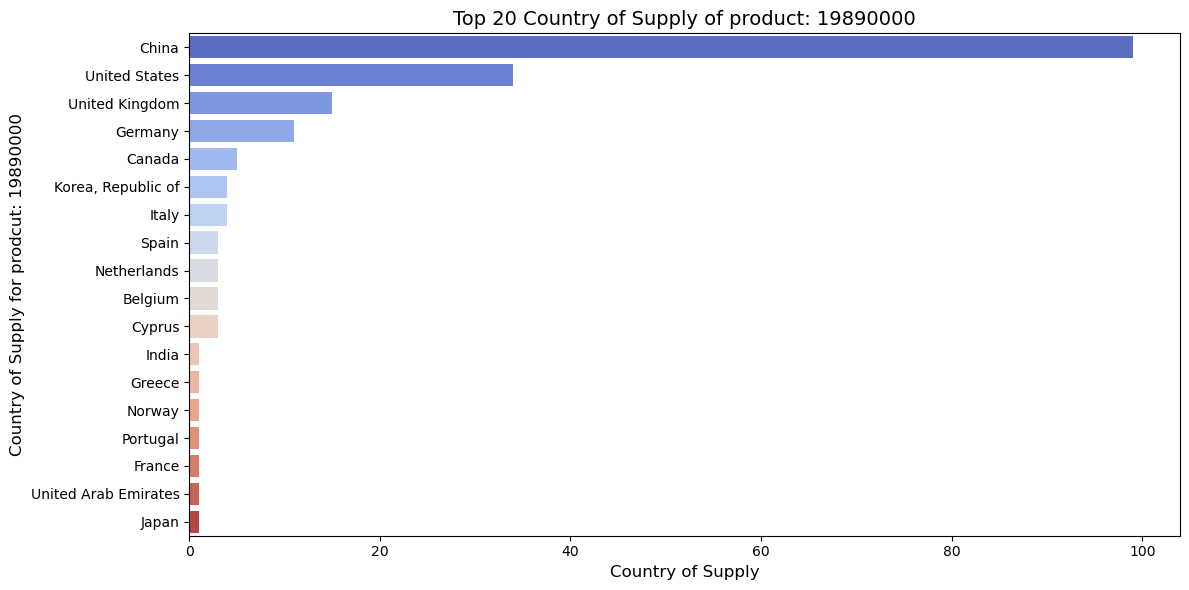

In [62]:
# Our top 10 Products
products = [7200000,28721000,44200000,2209099,17610000,28719000,29100000,17620000,2111000,19890000]


for product in products:
    pivot5a = pd.pivot_table(dataset[dataset['HS Code']==product], 
                           values='HS Code', 
                           index='Country  of Supply',
                           aggfunc='count').sort_values(by='HS Code',ascending=False)

    #ploting of firsst 20 of pivot table
    plt.figure(figsize=(12, 6))
    sns.barplot(y=pivot5a.head(20).index, x=pivot5a['HS Code'][:20], palette="coolwarm")
    plt.xlabel("Country of Supply", fontsize=12)
    plt.ylabel("Country of Supply for prodcut: "+ str(product), fontsize=12)
    plt.title('Top 20 Country of Supply of product: ' + str(product), fontsize=14)
    plt.tight_layout()
    

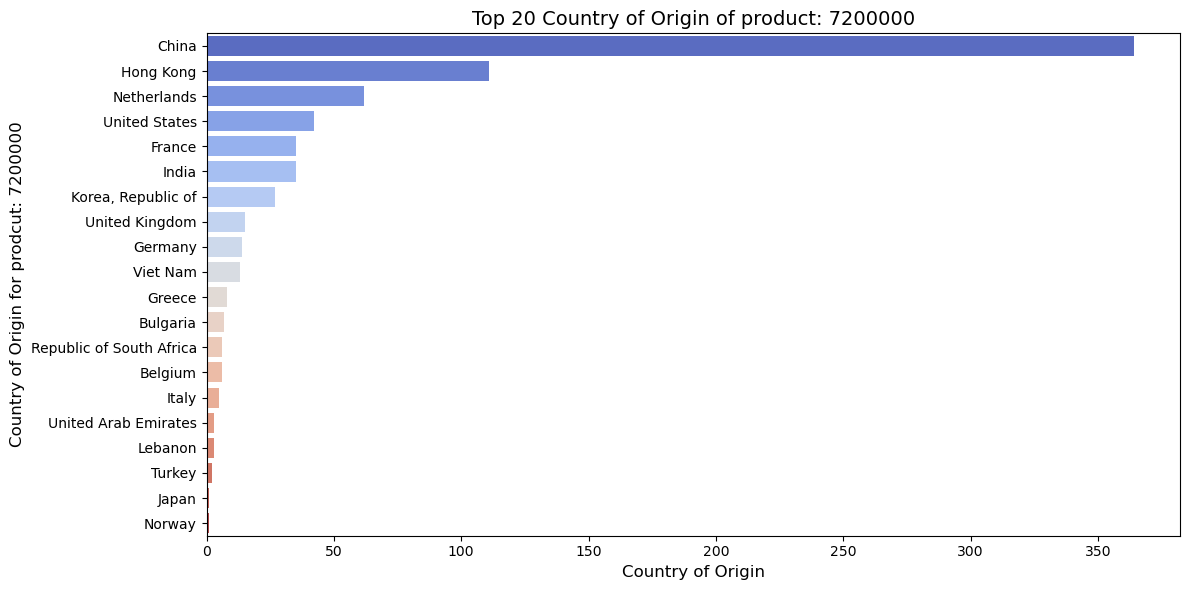

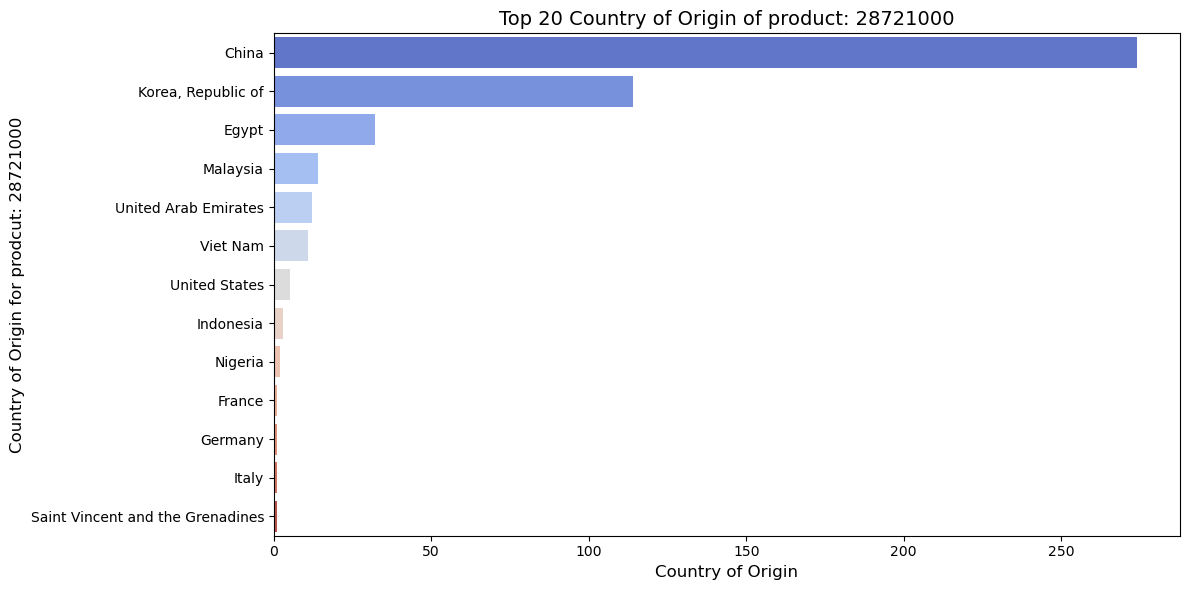

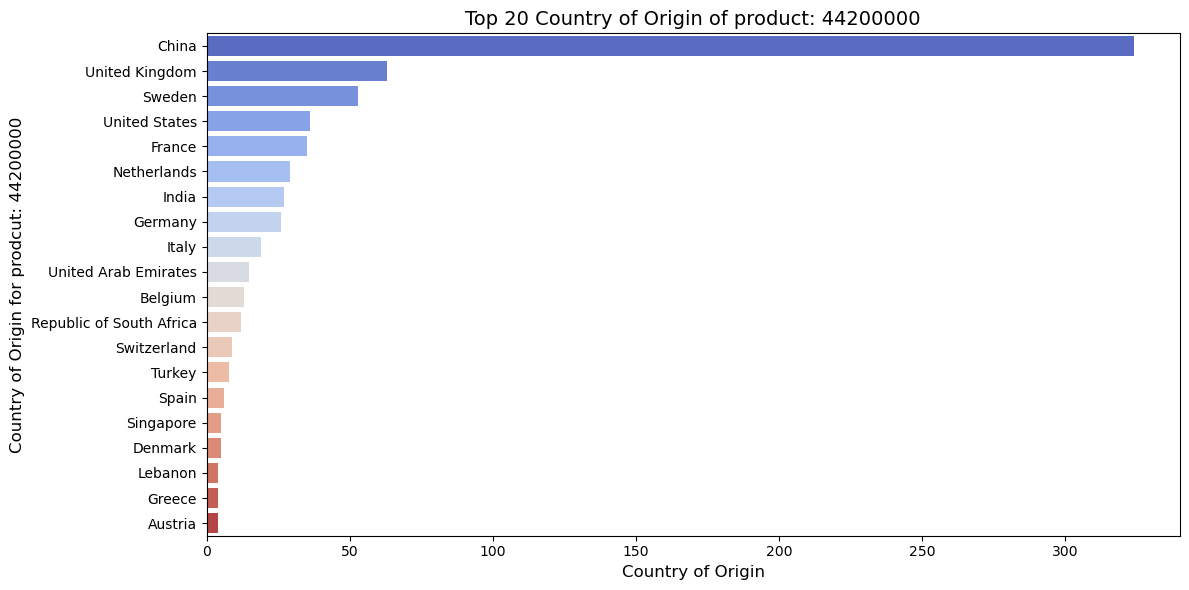

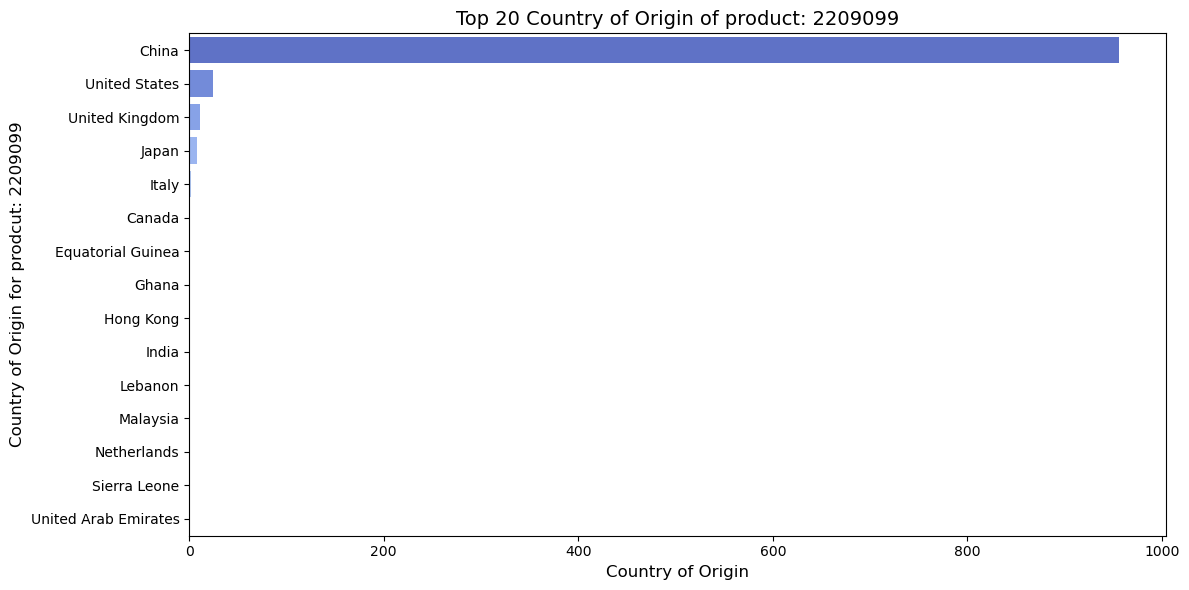

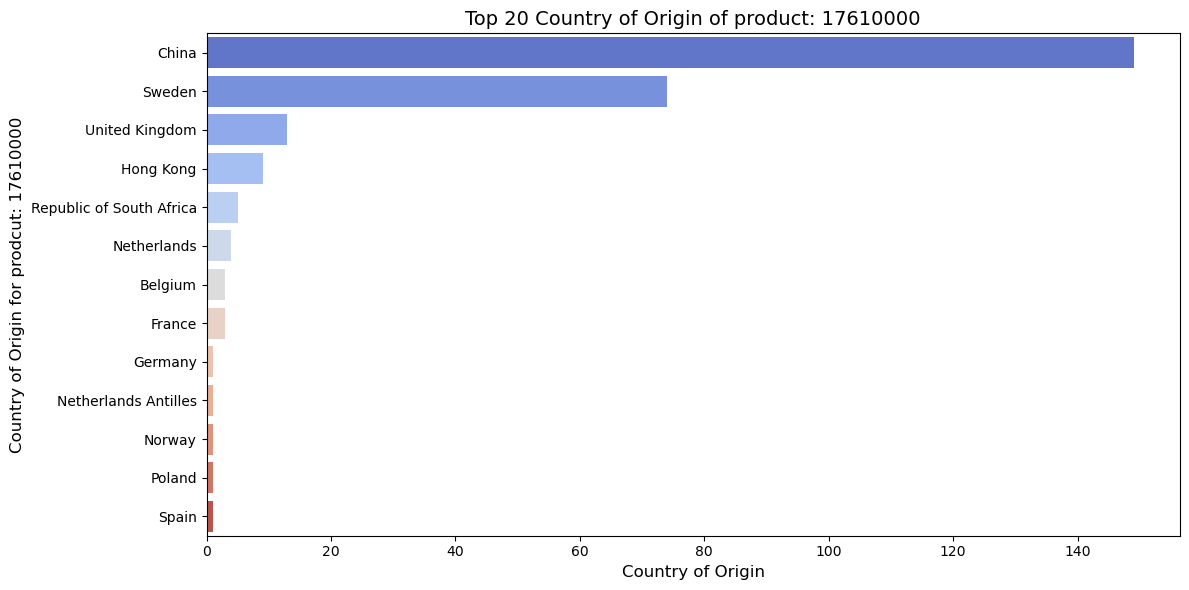

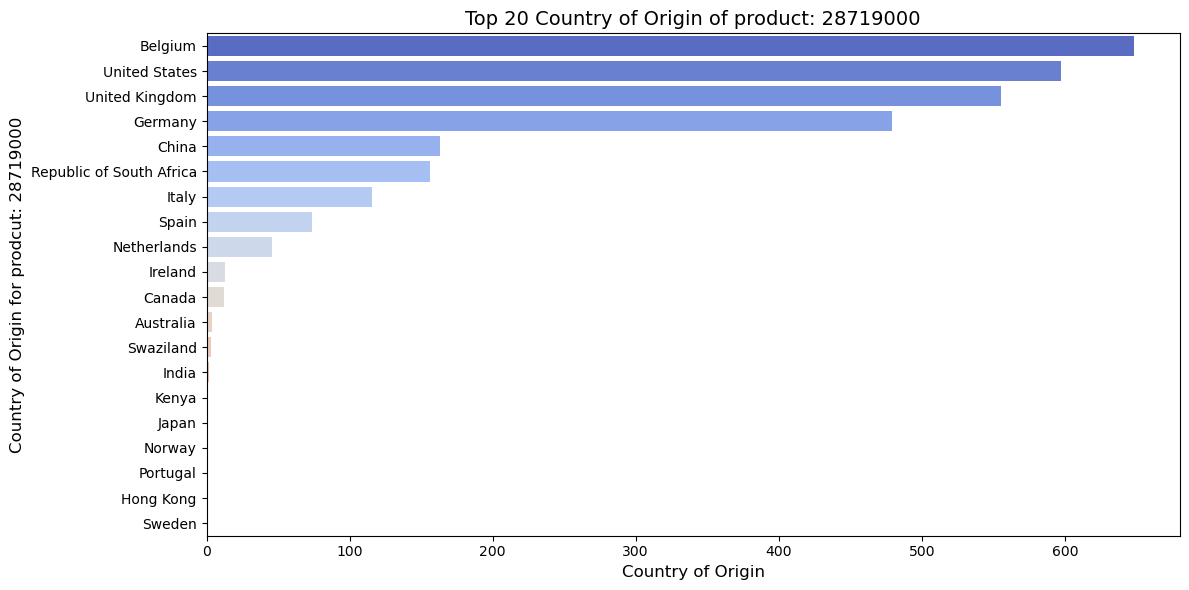

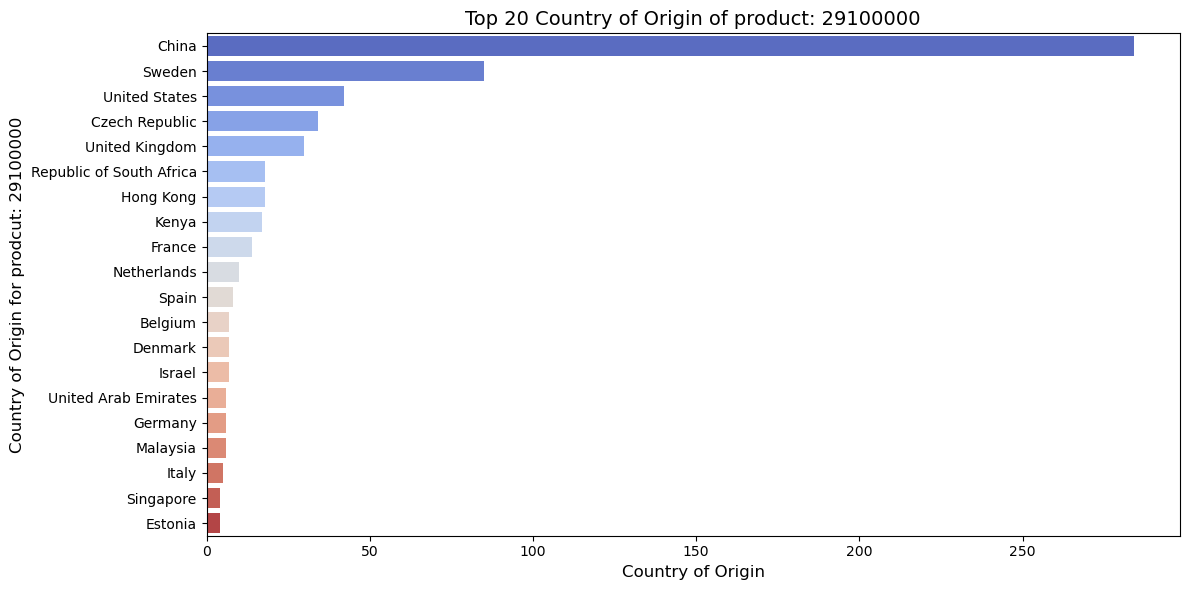

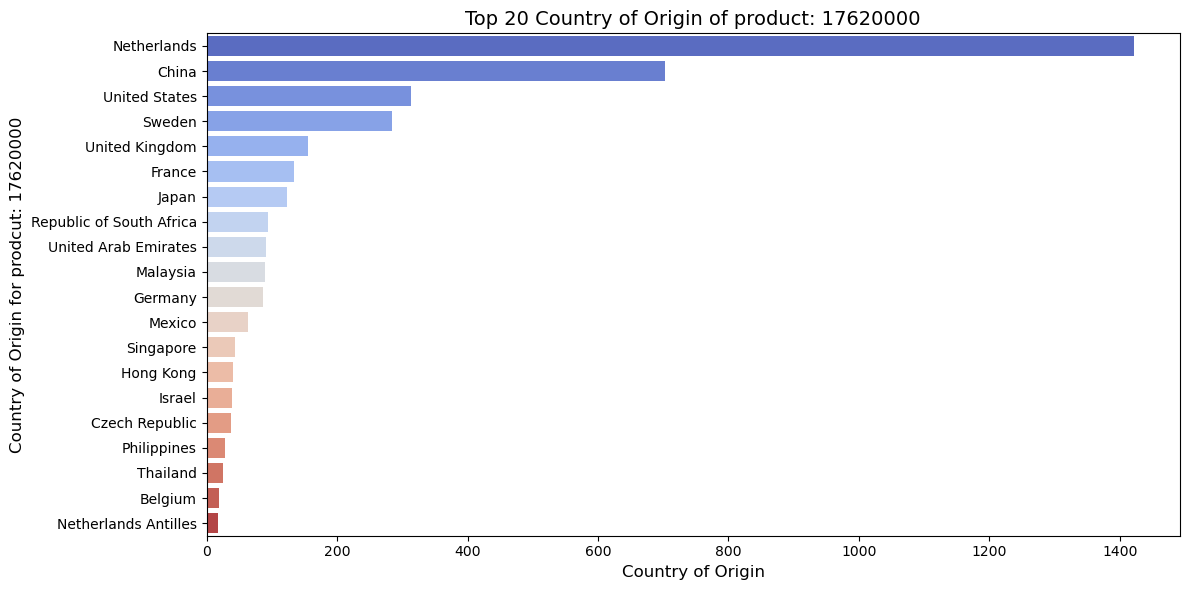

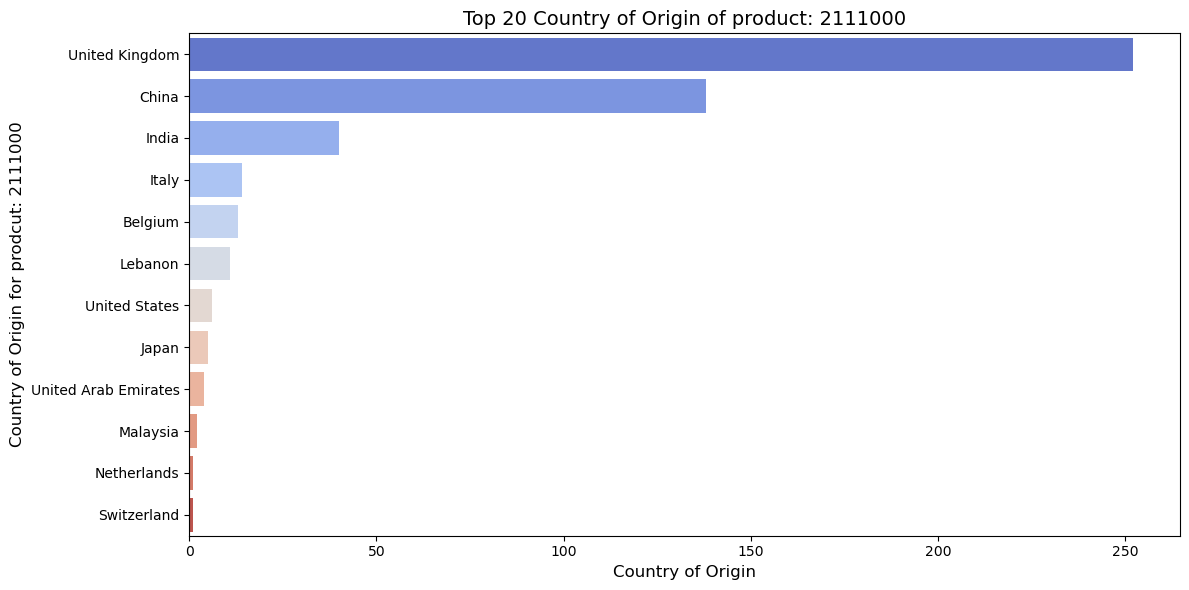

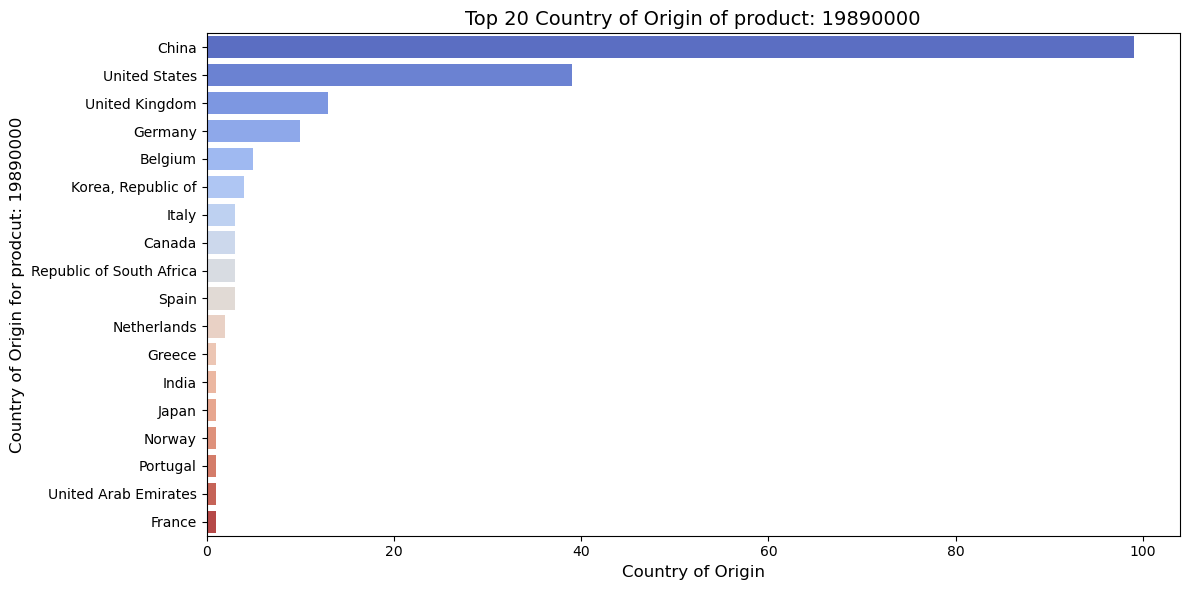

In [63]:
# Our top 10 Products
products = [7200000,28721000,44200000,2209099,17610000,28719000,29100000,17620000,2111000,19890000]


for product in products:
    pivot5b = pd.pivot_table(dataset[dataset['HS Code']==product], 
                           values='HS Code', 
                           index='Country  of Origin',
                           aggfunc='count').sort_values(by='HS Code',ascending=False)

    #ploting of firsst 20 of pivot table
    plt.figure(figsize=(12, 6))
    sns.barplot(y=pivot5b.head(20).index, x=pivot5b['HS Code'][:20], palette="coolwarm")
    plt.xlabel("Country of Origin", fontsize=12)
    plt.ylabel("Country of Origin for prodcut: "+ str(product), fontsize=12)
    plt.title('Top 20 Country of Origin of product: ' + str(product), fontsize=14)
    plt.tight_layout()
    

#### Q6 -- Transactions rate in the years

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\11464659.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot6.index, y=pivot6['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


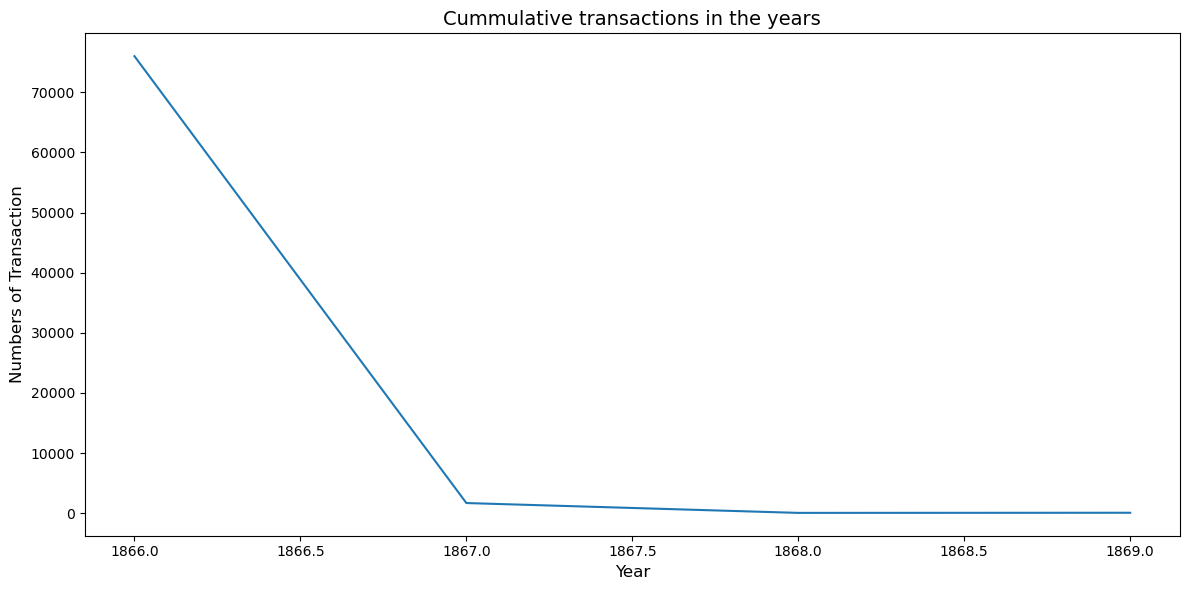

In [64]:
# Numbers of Transactions all the year

pivot6 = pd.pivot_table(dataset, 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.year,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot6.index, y=pivot6['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the years', fontsize=14)
plt.tight_layout()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\131072416.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot6a.index, y=pivot6a['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


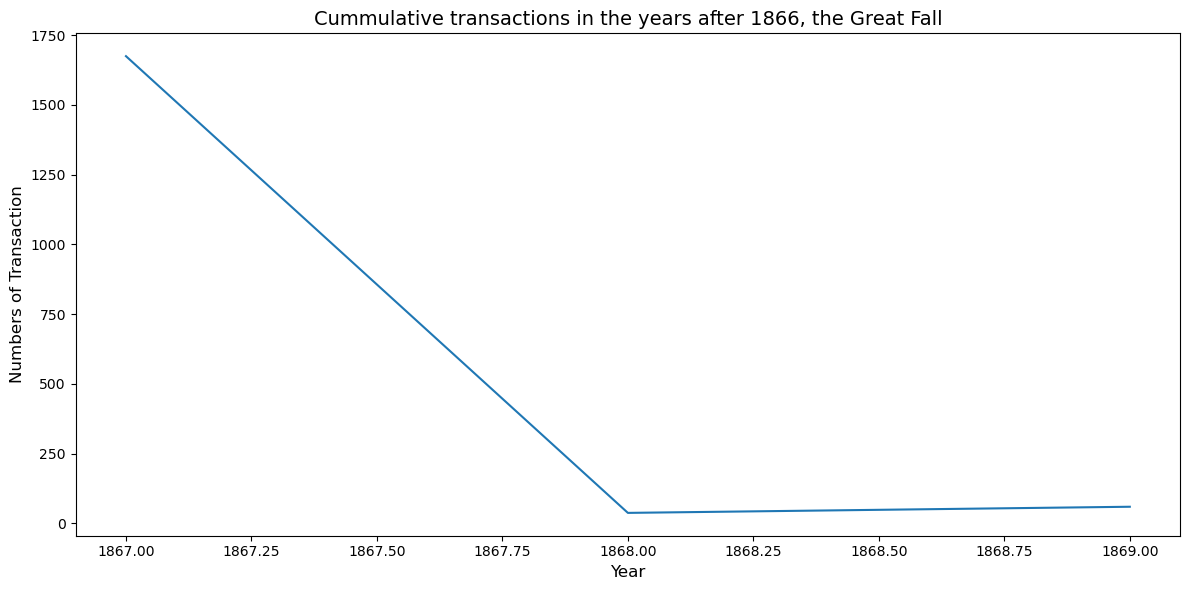

In [65]:
# Numbers of Transactions all the year

pivot6a = pd.pivot_table(dataset[dataset['Receipt Date'].dt.year>=1867], 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.year,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot6a.index, y=pivot6a['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the years after 1866, the Great Fall', fontsize=14)
plt.tight_layout()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\845172020.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot6b.index, y=pivot6b['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


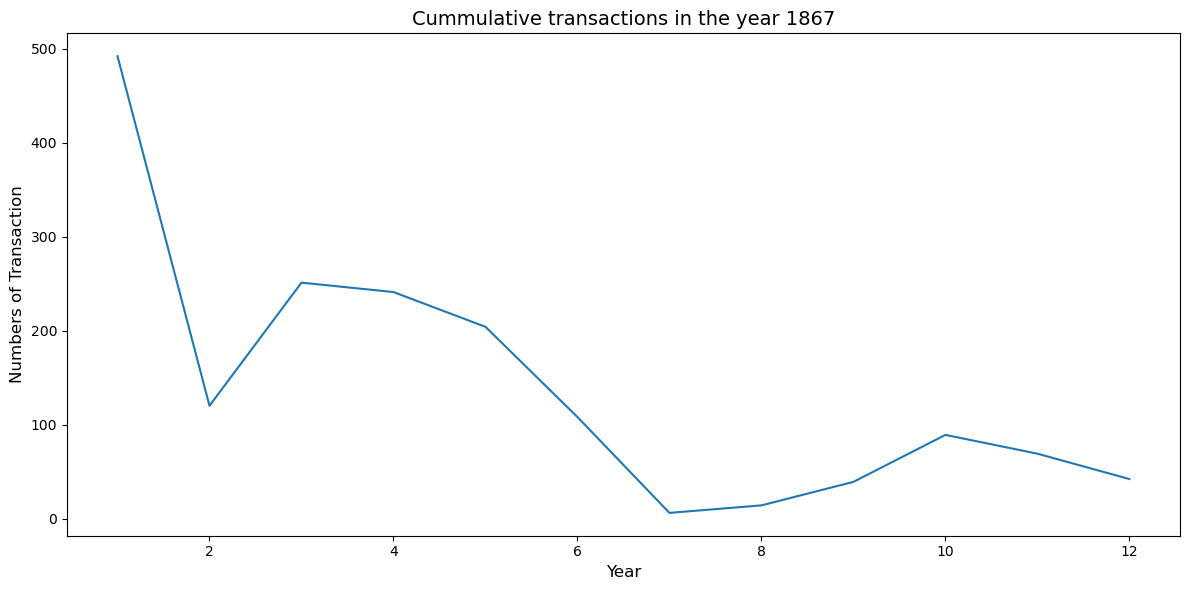

In [66]:
# Numbers of Transactions all the year

pivot6b = pd.pivot_table(dataset[dataset['Receipt Date'].dt.year==1867], 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.month,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot6b.index, y=pivot6b['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the year 1867', fontsize=14)
plt.tight_layout()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\3757700293.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot6c.index, y=pivot6c['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


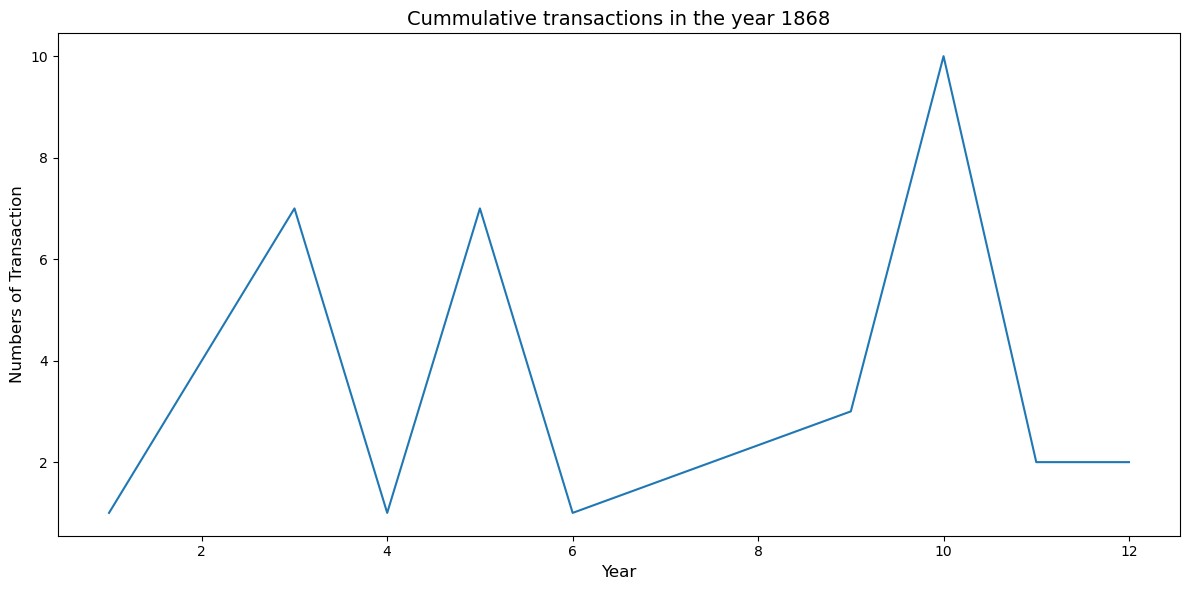

In [67]:
# Numbers of Transactions all the year

pivot6c = pd.pivot_table(dataset[dataset['Receipt Date'].dt.year==1868], 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.month,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot6c.index, y=pivot6c['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the year 1868', fontsize=14)
plt.tight_layout()

C:\Users\OLADOYINBO BABATUNDE\AppData\Local\Temp\ipykernel_8984\2445802363.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=pivot6d.index, y=pivot6d['Reg Number'], palette="coolwarm")
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OLADOYINBO BABATUNDE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


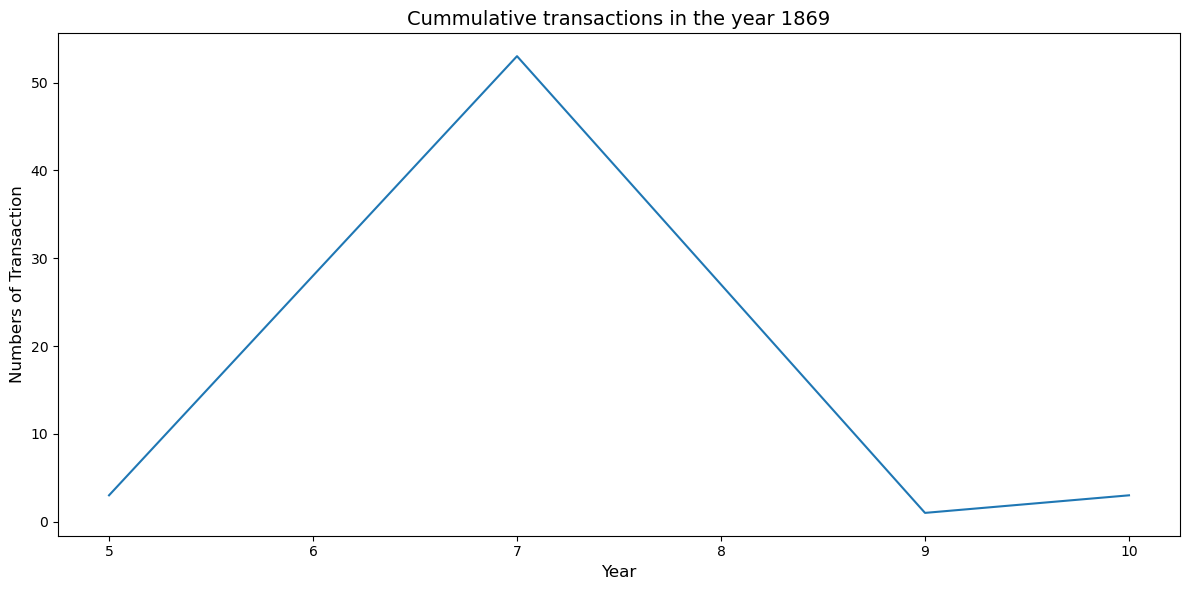

In [68]:
# Numbers of Transactions all the year

pivot6d = pd.pivot_table(dataset[dataset['Receipt Date'].dt.year==1869], 
                       values='Reg Number', 
                       index=dataset['Receipt Date'].dt.month,
                       aggfunc='count').sort_values(by='Reg Number',ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=pivot6d.index, y=pivot6d['Reg Number'], palette="coolwarm")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Numbers of Transaction", fontsize=12)
plt.title('Cummulative transactions in the year 1869', fontsize=14)
plt.tight_layout()

#### Q7 -- Logistics/Transport Cost

In [69]:
countries = list(dataset['Country  of Supply'].unique())

country_of_supply = []
avg_fob = []
avg_cif = []



for country in countries:
    country_of_supply.append(country)
    avg_fob.append(dataset[dataset['Country  of Supply']==country]['FOB Value (N)'].median())
    avg_cif.append(dataset[dataset['Country  of Supply']==country]['CIF Value (N)'].median())

pivot7 = pd.DataFrame({'Country  of Supply':country_of_supply,
                      'Avg_fob':avg_fob,
                      'avg_cif':avg_cif}, index=np.arange(len(country_of_supply)))

pivot7['AVG(CIF)/AVG(FOB)'] = pivot7['Avg_fob']/pivot7['avg_cif']

In [70]:
pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).head(20)

Country  of Supply      Avg_fob      avg_cif  AVG(CIF)/AVG(FOB)
124                       Uruguay     101676.0     101652.0           1.000236
98   United States Virgin Islands    1648717.0    1648717.0           1.000000
1                         Belgium     101722.0     101722.0           1.000000
52           Syrian Arab Republic     501765.0     501765.0           1.000000
126                       Namibia    1001769.0    1001769.0           1.000000
56          Serbia and Montenegro     750073.0     750073.0           1.000000
50                         Angola     156555.0     156555.0           1.000000
24                      Swaziland     251790.0     251790.0           1.000000
125                       Armenia     101676.0     101676.0           1.000000
123                      Anguilla      11450.0      11450.0           1.000000
102                       Iceland     101676.0     101676.0           1.000000
73                    New Zealand     198600.0     200964.0           0.988237
115                     Kazakstan     673150.0     682613.0           0.986137
110                     Venezuela     358145.0     363330.0           0.985729
45                          Egypt    1357527.0    1382335.0           0.982054
76                      Argentina     174861.5     178210.5           0.981208
85            Trinidad and Tobago     778371.0     796889.0           0.976762
72                    Isle of Man    1049680.5    1076129.0           0.975423
38                       Thailand  143566335.0  147308744.0           0.974595
71                  Cote d'Ivoire     966315.0     994375.0           0.971781

In [71]:
pivot7['avg_cif'].corr(pivot7['AVG(CIF)/AVG(FOB)'])

0.13057965506800945

In [72]:
pivot7['avg_cif'].corr(pivot7['AVG(CIF)/AVG(FOB)'])

0.13057965506800945

In [73]:
pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).tail(20)

Country  of Supply    Avg_fob    avg_cif  AVG(CIF)/AVG(FOB)
27              Czech Republic  2488875.0  3509128.0           0.709257
10                   Hong Kong  1400300.0  2009818.0           0.696730
13                       Kenya   613600.0   896470.0           0.684462
103                     Mexico    60026.0    88816.0           0.675847
19        United Arab Emirates   397721.0   595555.0           0.667816
111                 Bangladesh    81619.0   128590.0           0.634723
90                        Oman   259444.5   422463.5           0.614123
92               Liechtenstein    11450.0    18739.0           0.611025
101                     Panama   104040.0   171414.0           0.606952
42                    Viet Nam  2578350.0  4306050.0           0.598774
83               Bouvet Island    11450.0    19133.0           0.598442
79                       Aruba  4138600.0  7092812.0           0.583492
87   Iran, Islamic Republic of   265186.0   457753.5           0.579321
99          Holy See (Vatican)   395600.0   718515.0           0.550580
121              New Caledonia  1097100.0  2053628.0           0.534225
122                    Liberia   306600.0   613125.0           0.500061
120                       Guam    60109.0   121573.0           0.494427
69                 Philippines   243358.0   529250.0           0.459817
118                       Peru   367600.0  1201470.0           0.305959
112                    Albania    77488.0   629206.0           0.123152

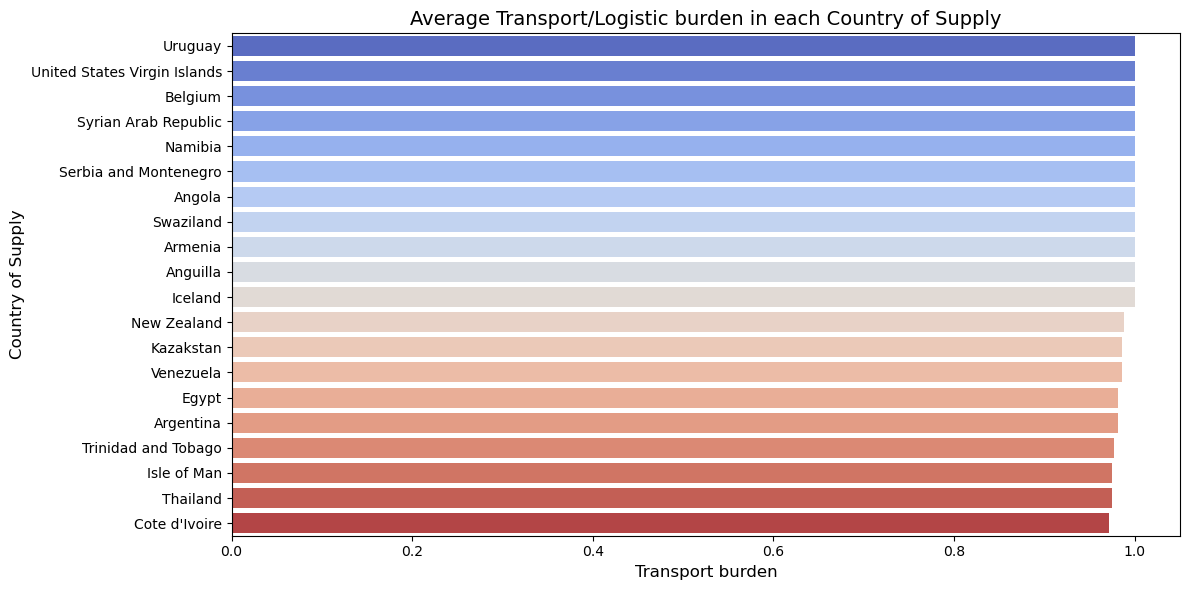

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).head(20)['Country  of Supply'], 
            x=pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).head(20)['AVG(CIF)/AVG(FOB)'], palette="coolwarm")
plt.xlabel("Transport burden", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Average Transport/Logistic burden in each Country of Supply', fontsize=14)
plt.tight_layout()

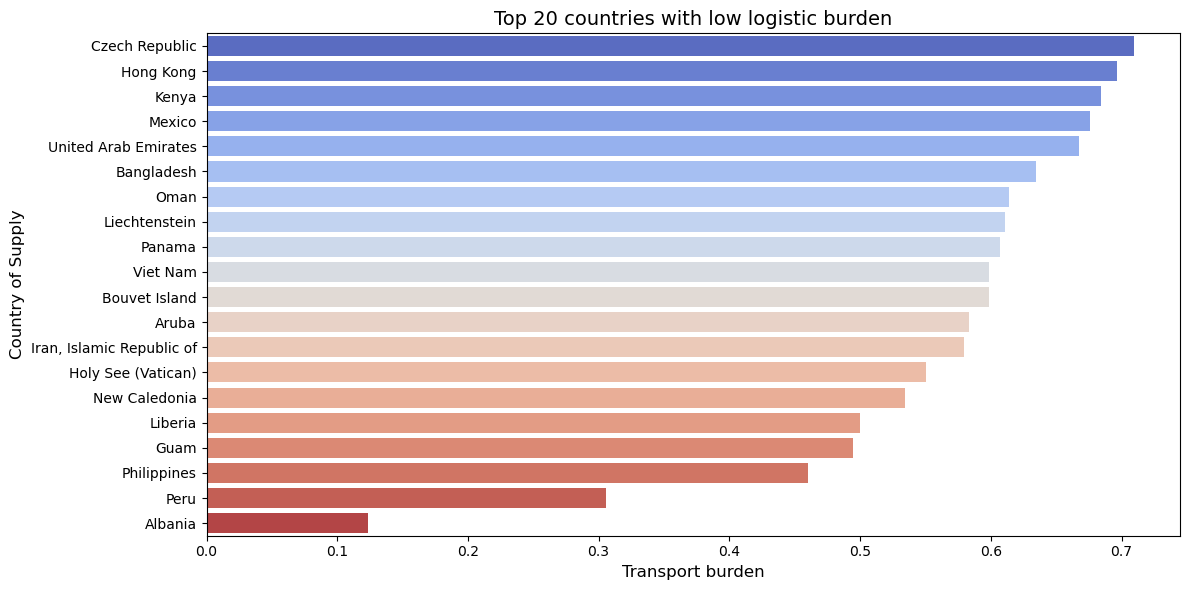

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).tail(20)['Country  of Supply'], 
            x=pivot7.sort_values(by='AVG(CIF)/AVG(FOB)', ascending=False).tail(20)['AVG(CIF)/AVG(FOB)'], palette="coolwarm")
plt.xlabel("Transport burden", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Top 20 countries with low logistic burden', fontsize=14)
plt.tight_layout()

#### Q8 -- Transport effect on FOB

In [76]:
countries = list(dataset['Country  of Supply'].unique())

country_of_supply = []
shipping_effect = []




for country in countries:
    country_of_supply.append(country)
    shipping_effect.append(dataset[dataset['Country  of Supply']==country]['(CIF - FOB)/FOB'].median())


pivot8 = pd.DataFrame({'Country  of Supply':country_of_supply,
                      'shipping_effect':shipping_effect},
                    index=np.arange(len(country_of_supply))).sort_values(by='shipping_effect', ascending=False)

pivot8.head(20)

Country  of Supply  shipping_effect
112                    Albania         7.120044
118                       Peru         2.268417
69                 Philippines         1.266515
120                       Guam         1.022542
122                    Liberia         0.999755
121              New Caledonia         0.871869
87   Iran, Islamic Republic of         0.679580
79                       Aruba         0.679402
83               Bouvet Island         0.671004
99          Holy See (Vatican)         0.663076
101                     Panama         0.647578
92               Liechtenstein         0.636594
111                 Bangladesh         0.577491
10                   Hong Kong         0.540915
90                        Oman         0.450384
104                    Croatia         0.441470
117         Dominican Republic         0.388962
42                    Viet Nam         0.385348
113     Libyan Arab Jamahiriya         0.371092
102                    Iceland         0.351681

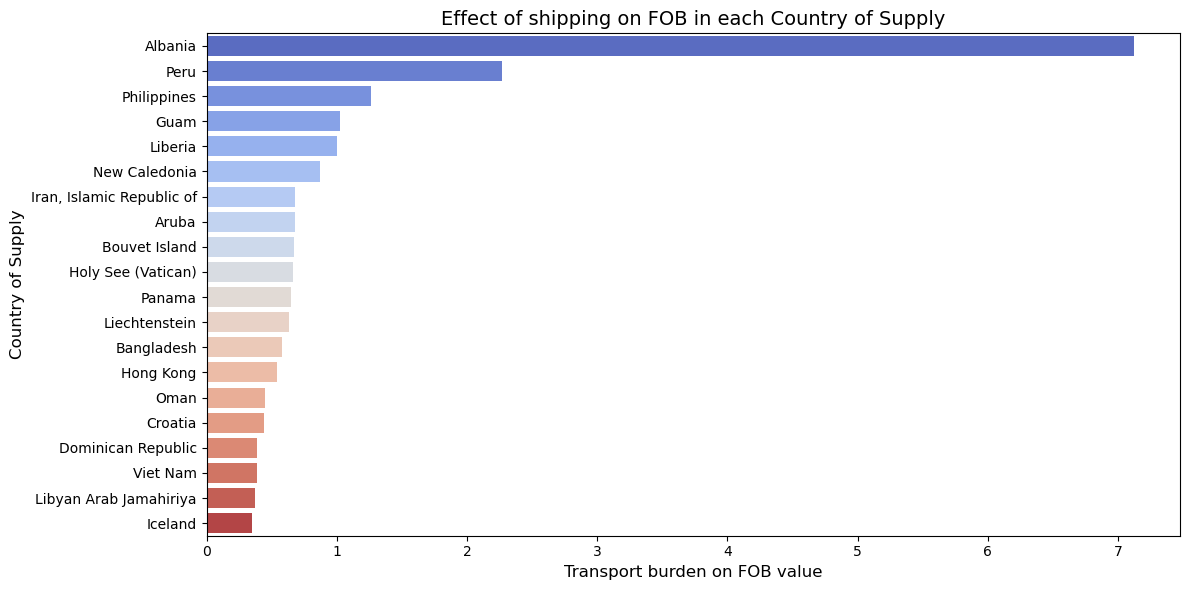

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot8.sort_values(by='shipping_effect', ascending=False).head(20)['Country  of Supply'], 
            x=pivot8.sort_values(by='shipping_effect', ascending=False).head(20)['shipping_effect'], palette="coolwarm")
plt.xlabel("Transport burden on FOB value", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Effect of shipping on FOB in each Country of Supply', fontsize=14)
plt.tight_layout()

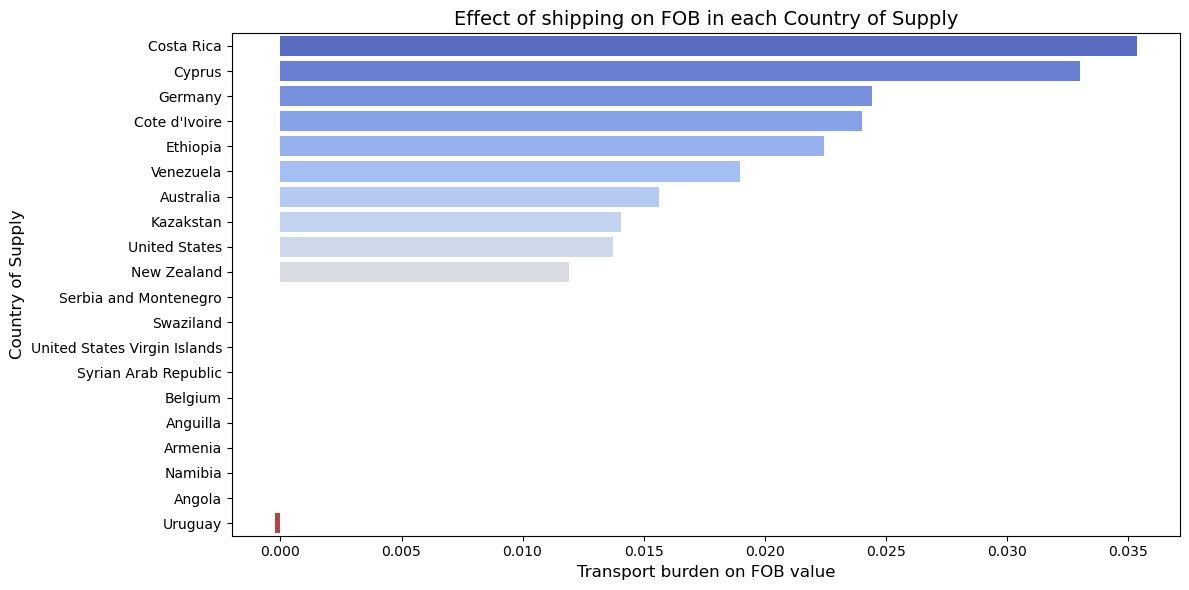

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot8.sort_values(by='shipping_effect', ascending=False).tail(20)['Country  of Supply'], 
            x=pivot8.sort_values(by='shipping_effect', ascending=False).tail(20)['shipping_effect'], palette="coolwarm")
plt.xlabel("Transport burden on FOB value", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Effect of shipping on FOB in each Country of Supply', fontsize=14)
plt.tight_layout()

#### Q9 -- Tax Burden

In [79]:
countries = list(dataset['Country  of Supply'].unique())

country_of_supply = []
tax_burden = []




for country in countries:
    country_of_supply.append(country)
    tax_burden.append(dataset[dataset['Country  of Supply']==country]['Tax/CIF'].median())


pivot9 = pd.DataFrame({'Country  of Supply':country_of_supply,
                      'tax_burden':tax_burden},
                    index=np.arange(len(country_of_supply))).sort_values(by='tax_burden', ascending=False)

pivot9.head(20)

Country  of Supply  tax_burden
98   United States Virgin Islands    1.000004
82                          Nepal    0.859579
91              Brunei Darussalam    0.454197
83                  Bouvet Island    0.345685
87      Iran, Islamic Republic of    0.332180
124                       Uruguay    0.301647
125                       Armenia    0.301644
102                       Iceland    0.301644
1                         Belgium    0.301614
64               Papua New Guinea    0.297220
24                      Swaziland    0.294964
120                          Guam    0.294498
4                      Azerbaijan    0.292880
52           Syrian Arab Republic    0.292718
56          Serbia and Montenegro    0.291966
6                   United States    0.291962
126                       Namibia    0.291585
96                       Zimbabwe    0.291550
67                        Ireland    0.290971
32                      Australia    0.290538

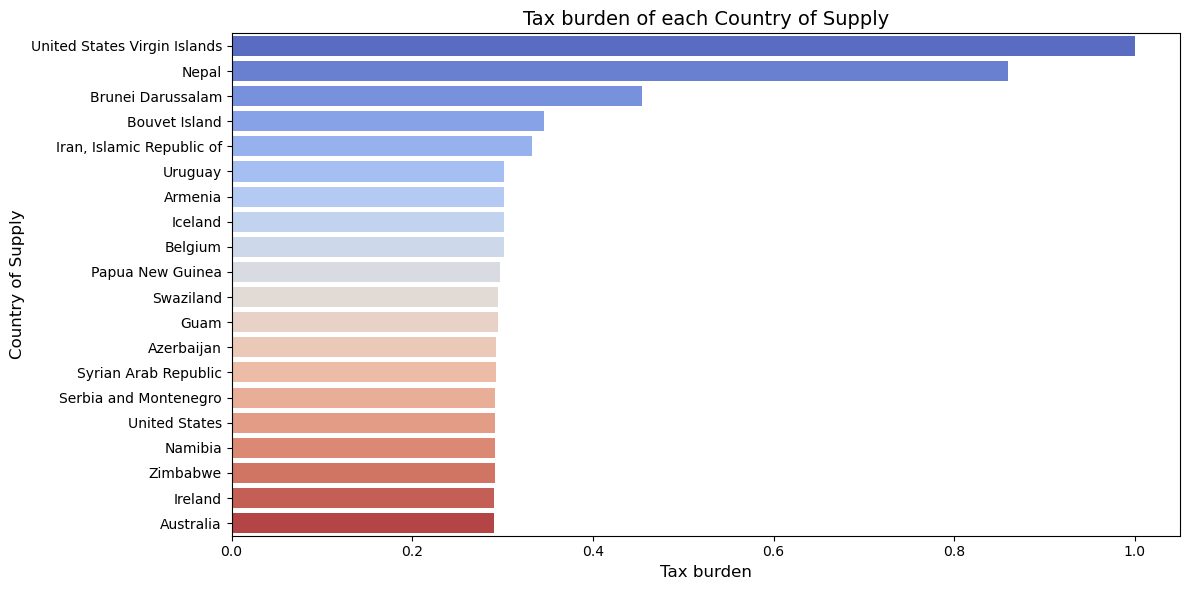

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot9.sort_values(by='tax_burden', ascending=False).head(20)['Country  of Supply'], 
            x=pivot9.sort_values(by='tax_burden', ascending=False).head(20)['tax_burden'], palette="coolwarm")
plt.xlabel("Tax burden", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Tax burden of each Country of Supply', fontsize=14)
plt.tight_layout()

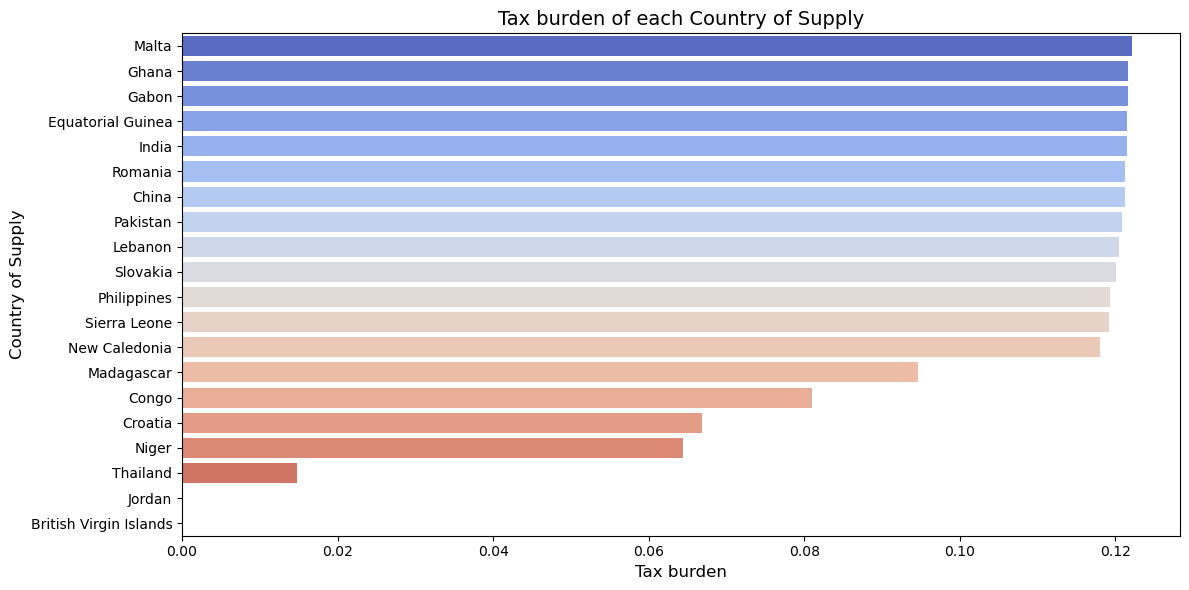

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot9.sort_values(by='tax_burden', ascending=False).tail(20)['Country  of Supply'], 
            x=pivot9.sort_values(by='tax_burden', ascending=False).tail(20)['tax_burden'], palette="coolwarm")
plt.xlabel("Tax burden", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Tax burden of each Country of Supply', fontsize=14)
plt.tight_layout()

#### Q10 -- Cost of Insurance

In [82]:
countries = list(dataset['Country  of Supply'].unique())

country_of_supply = []
cost_of_insurance = []




for country in countries:
    country_of_supply.append(country)
    cost_of_insurance.append(dataset[dataset['Country  of Supply']==country]['CIF - FOB'].median())


pivot10 = pd.DataFrame({'Country  of Supply':country_of_supply,
                      'cost_of_insurance':cost_of_insurance},
                    index=np.arange(len(country_of_supply))).sort_values(by='cost_of_insurance', ascending=False)

pivot10.head(20)

Country  of Supply  cost_of_insurance
57                       Romania         11197791.0
40                       Lebanon          7955254.0
100       British Virgin Islands          5035095.0
38                      Thailand          3742409.0
79                         Aruba          3005432.0
51                       Estonia          2402984.5
36                        Jordan          1596980.0
128                      Andorra          1326650.0
42                      Viet Nam          1013334.5
121                New Caledonia           956528.0
54                    Costa Rica           949633.0
118                         Peru           833870.0
33   United Republic of Tanzania           824642.0
27                Czech Republic           776556.0
3                          China           771727.0
80                      Slovakia           770664.0
2                         Turkey           630642.0
10                     Hong Kong           587060.0
119                      Ecuador           579822.0
112                      Albania           551718.0

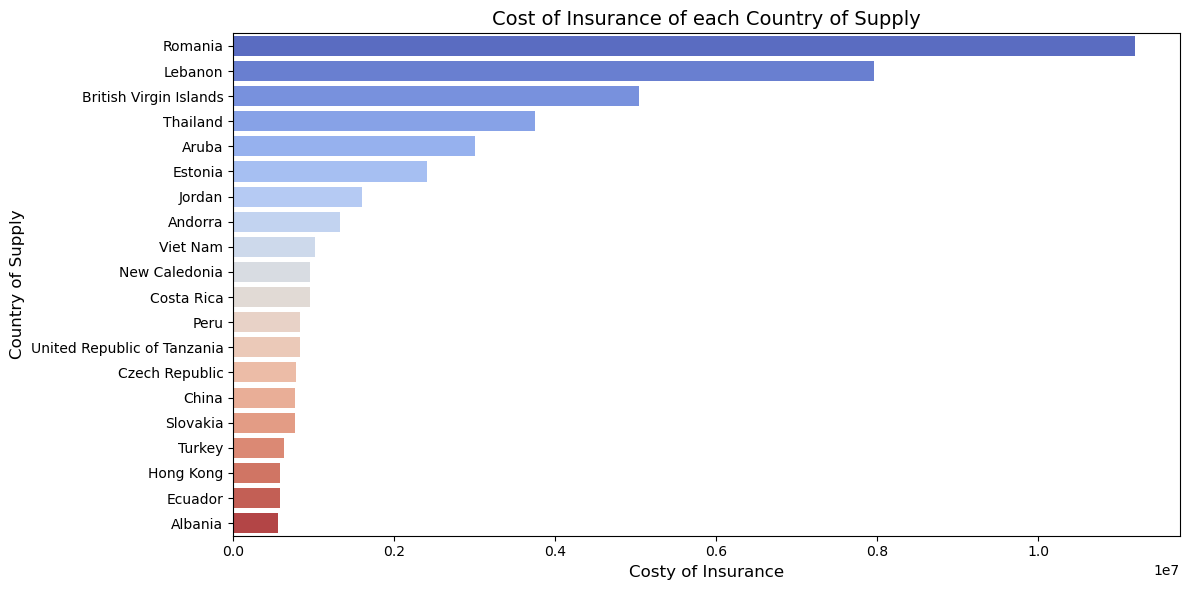

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot10.sort_values(by='cost_of_insurance', ascending=False).head(20)['Country  of Supply'], 
            x=pivot10.sort_values(by='cost_of_insurance', ascending=False).head(20)['cost_of_insurance'], palette="coolwarm")
plt.xlabel("Costy of Insurance", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Cost of Insurance of each Country of Supply', fontsize=14)
plt.tight_layout()

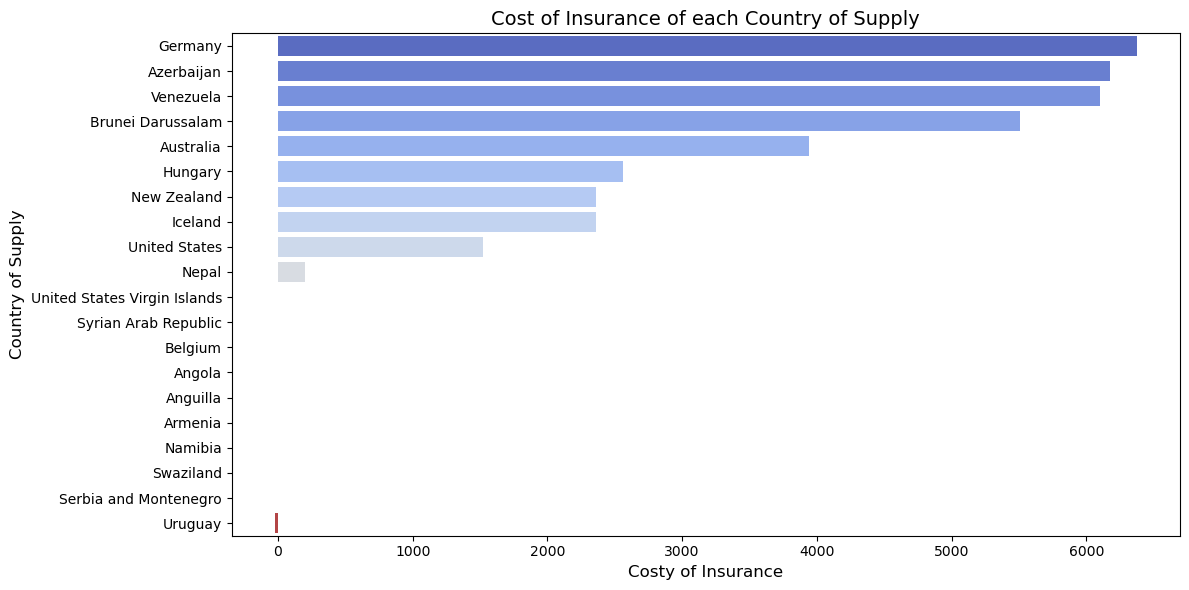

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(y=pivot10.sort_values(by='cost_of_insurance', ascending=False).tail(20)['Country  of Supply'], 
            x=pivot10.sort_values(by='cost_of_insurance', ascending=False).tail(20)['cost_of_insurance'], palette="coolwarm")
plt.xlabel("Costy of Insurance", fontsize=12)
plt.ylabel("Country of Supply", fontsize=12)
plt.title('Cost of Insurance of each Country of Supply', fontsize=14)
plt.tight_layout()